COMMODITIES TRADE STATISTICS - CAPSTONE 2

Import Libraries

In [1]:
# Import Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

LOAD DATASET and CREATE DATAFRAME

In [2]:
# Load Dataset and Create Dataframe

df_commtradestat = pd.read_csv('commodity_trade_statistics_data_V2.csv')
#df_commtradestat.drop('Unnamed: 10', inplace=True, axis=1)
#print(df_commtradestat)

DATA CLEANSING:
Find Duplicates and Remove them
Find NULL values and replace with 0
Find missing values and replace with 0

In [3]:
# Find Duplicate rows - No Duplicate rows

duplicate_rows = df_commtradestat.duplicated(keep='first')
#print(duplicate_rows)

In [4]:
#Indexing Dataframe and Find null values
df_commtradestat.isnull()

country_or_area   year  comm_code  commodity   flow  trade_usd  \
0                 False  False      False      False  False      False   
1                 False  False      False      False  False      False   
2                 False  False      False      False  False      False   
3                 False  False      False      False  False      False   
4                 False  False      False      False  False      False   
...                 ...    ...        ...        ...    ...        ...   
782081            False  False      False      False  False      False   
782082            False  False      False      False  False      False   
782083            False  False      False      False  False      False   
782084            False  False      False      False  False      False   
782085            False  False      False      False  False      False   

        weight_kg  quantity_name  quantity  category  
0           False          False     False     False  
1           False          False     False     False  
2           False          False     False     False  
3           False          False     False     False  
4           False          False     False     False  
...           ...            ...       ...       ...  
782081      False          False     False     False  
782082      False          False     False     False  
782083      False          False     False     False  
782084      False          False     False     False  
782085      False          False     False     False  

[782086 rows x 10 columns]

In [5]:
# Describe dataframe to display any null values
df_commtradestat.describe()

year      comm_code     trade_usd     weight_kg      quantity
count  782086.000000  782086.000000  7.820860e+05  7.736910e+05  7.588170e+05
mean     2007.985109   67652.933685  1.624707e+07  2.580322e+07  5.494699e+07
std         4.808385   34318.651037  1.823595e+08  8.531585e+08  8.801281e+09
min      2000.000000   10111.000000  1.000000e+00  0.000000e+00  0.000000e+00
25%      2004.000000   40120.000000  8.137000e+03  2.698500e+03  2.454000e+03
50%      2008.000000   70990.000000  1.225960e+05  5.469600e+04  5.405000e+04
75%      2012.000000  100190.000000  1.688510e+06  9.369680e+05  9.600000e+05
max      2016.000000  121490.000000  4.026172e+10  6.140000e+11  5.370000e+12

In [6]:
# Dataframe having null values in quantity column
print(df_commtradestat['quantity'].isnull().sum())

23269


In [7]:
# Replaced empty values in quantity column to 0
# Replace country 'China, Hong Kong SAR' to 'Hong Kong'

df_commtradestat.fillna(0, inplace=True, downcast = 'infer')
df_commtradestat.replace(to_replace = 'Re-Import', value='Import', inplace=True)
df_commtradestat.replace(to_replace = 'Re-Export', value='Export', inplace=True)
df_commtradestat.loc[df_commtradestat['flow']=='Re-Export']
df_commtradestat.replace(to_replace='China, Hong Kong SAR',value='Hong Kong',inplace=True)

In [8]:
# Check for null values in dataframe - no null values 
print(df_commtradestat.isnull().sum())

country_or_area    0
year               0
comm_code          0
commodity          0
flow               0
trade_usd          0
weight_kg          0
quantity_name      0
quantity           0
category           0
dtype: int64


In [9]:
# Create a new column for Price per Commodity

df_commtradestat['price_per_comm'] = df_commtradestat['trade_usd']/df_commtradestat['quantity']
#print(df_commtradestat)

In [10]:
# Create dataframe for developed and underdeveloped countries
# Developed and Underdeveloped countries list was refered from https://worldpopulationreview.com/country-rankings/developed-countries

developed_countries = ['Norway','Switzerland','Australia','Ireland','Germany','Iceland','Hong Kong','Sweden','Singapore','Netherlands']

#Import record Data for Developed Countries
df_developed_countries_imports = df_commtradestat.loc[(df_commtradestat['flow']=='Import') & (df_commtradestat['country_or_area'].isin(developed_countries))]
#print(df_developed_countries_imports)
#print(df_developed_countries_imports['quantity'].count())

#Export record data for Developed Countries
df_developed_countries_exports = df_commtradestat.loc[(df_commtradestat['flow']=='Export') & (df_commtradestat['country_or_area'].isin(developed_countries))]
#print(df_developed_countries_exports)

underdeveloped_countries = ['Niger','Central African Rep.','Burundi','Sierra Leone','Burkina Faso','Mali','Mozambique','Eritrea','Yemen']

#Imports and Exports Data for Under-Developed Countries
df_underdeveloped_countries = df_commtradestat.loc[df_commtradestat['country_or_area'].isin(underdeveloped_countries)]
#print(df_underdeveloped_countries)

#Import data for Under-Developed Countries
df_underdeveloped_countries_imports = df_commtradestat.loc[(df_commtradestat['flow']=='Import') & (df_commtradestat['country_or_area'].isin(underdeveloped_countries))]

#Export data for Under-Developed Countries
df_underdeveloped_countries_exports = df_commtradestat.loc[(df_commtradestat['flow']=='Export') & (df_commtradestat['country_or_area'].isin(underdeveloped_countries))]
#print(df_underdeveloped_countries_exports)
#print(df_underdeveloped_countries_exports['quantity'].count())

#Least Developed Countries (LDC) Full List DataFrames
LDC_list=["Afghanistan","Angola","Bangladesh","Benin","Bhutan","Burkina Faso","Burundi","Cambodia","Central African Republic","Chad","Comoros","Democratic Republic of the Congo","Djibouti","Eritrea","Ethiopia","Gambia","Guinea","Guinea-Bissau","Haiti","Kiribati","Lao People's Democratic Republic","Lesotho","Liberia","Madagascar","Malawi","Mali","Mauritania","Mozambique","Myanmar","Nepal","Niger","Rwanda","Sao Tome and Principe","Senegal","Sierra Leonne","SolomonIslands","Somalia","South Sudan","Sudan","Timor-Leste","Togo","Tuvalu","Uganda","UnitedRepublic of Tanzania","Yemen","Zambia"]

#Imports and Exports Data for Least Developed Countries
df_LDC_imp_exp = df_commtradestat.loc[(df_commtradestat['country_or_area'].isin(LDC_list))]

#Imports data for Least Developed Countries
df_LDC_imports = df_commtradestat.loc[(df_commtradestat['flow']=='Import') & (df_commtradestat['country_or_area'].isin(LDC_list))]

#Exports data for Least Developed Countries
df_LDC_exports = df_commtradestat.loc[(df_commtradestat['flow']=='Export') & (df_commtradestat['country_or_area'].isin(LDC_list))]
#print(df_LDC_imports)
#print(df_LDC_exports)

Issue Statements

In [11]:
# Dataframe with all Imports for each country
df_importsnew = df_commtradestat.loc[df_commtradestat['flow'].isin (['Import','Re-Import'])]
#print(df_importsnew)

# Dataframe with all exports for each country
df_exportsnew = df_commtradestat.loc[df_commtradestat['flow'].isin (['Export','Re-Export'])]
#print(df_exportsnew)

DESCRIPTIVE ANALYSIS

flow  year  Export  Import
0     2014   18912   27734
1     2015   18807   26911
2     2013   18704   28533
3     2011   18680   29187
4     2012   18596   29501
5     2010   18583   29458
6     2009   18581   29332
7     2005   18282   28501
8     2006   18205   29178
9     2007   18199   29346
10    2008   18136   28467
11    2004   17852   28207
12    2000   17509   26871
13    2003   17499   28296
14    2001   17158   27246
15    2002   16932   27275
16    2016   16036   21372


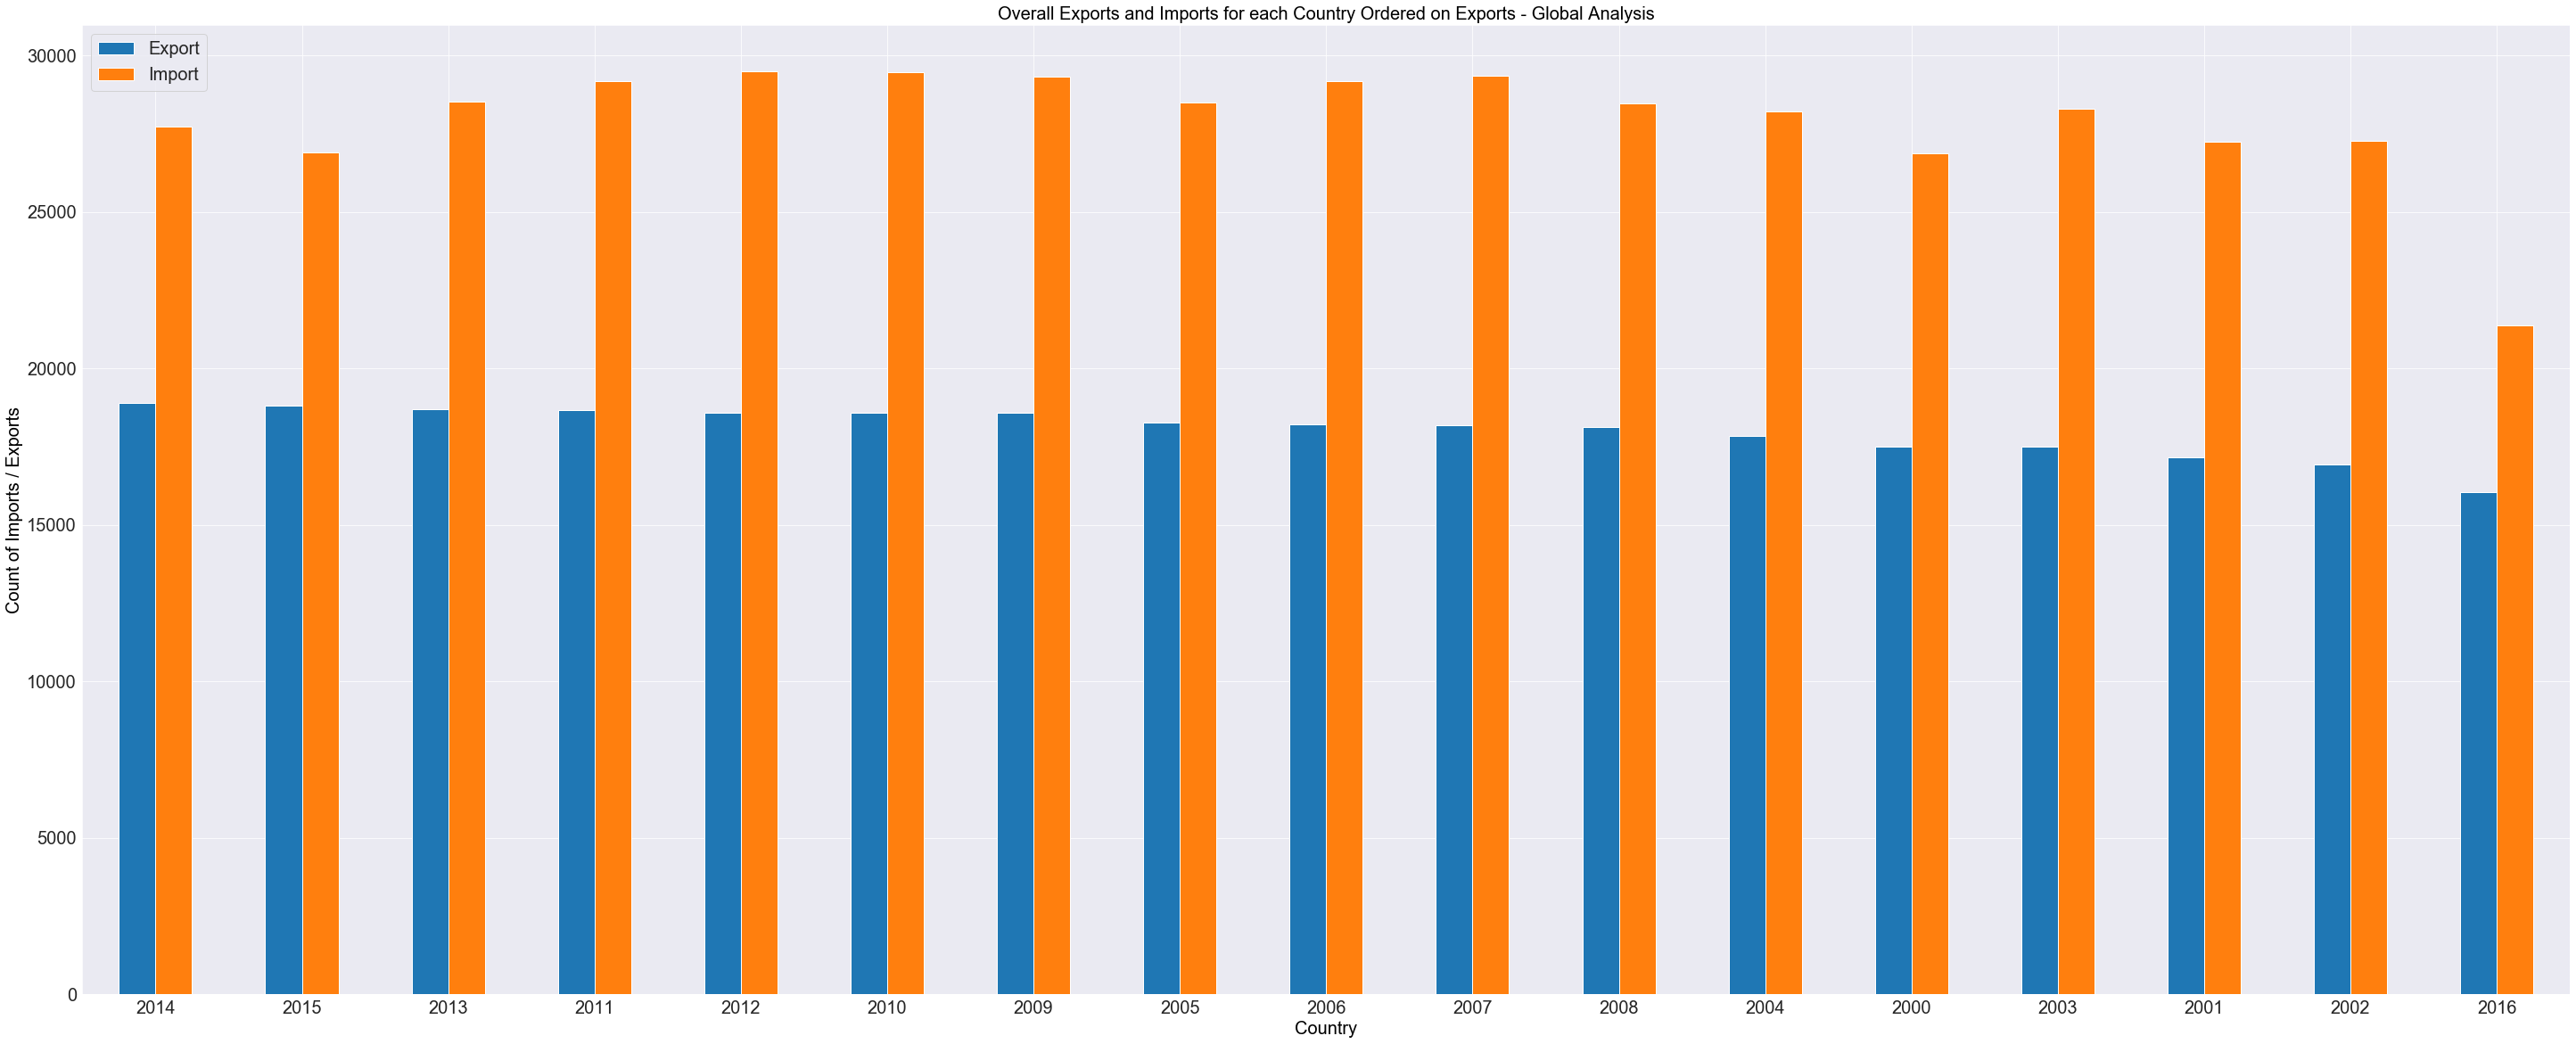

In [12]:
# 1. Overall count of Imports and Exports

count=df_commtradestat.groupby(["year","flow"]).size().unstack().sort_values(by='Export',ascending=False).reset_index()
print(count)
f,ax=plt.subplots(figsize=(50,20))
count.plot(x="year",y=["Export","Import"],kind='bar',ax=ax)
kwargs={'fontsize':20,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':20}
ax.tick_params(**kg)

plt.xlabel("Country",**kwargs)
plt.ylabel("Count of Imports / Exports",**kwargs)
plt.xticks(rotation=0)
plt.legend(('Export','Import'),loc='upper left',fontsize=20)
plt.title("Overall Exports and Imports for each Country Ordered on Exports - Global Analysis",**kwargs)
plt.show()

Analysis on Overall count of Imports and Exports:
The analysis shows the imports are more than the exports globally across participating countries for the reference period 2000 until 2016.
Though the imports are exports for other countries, this analysis is based on the data source taken into consideration

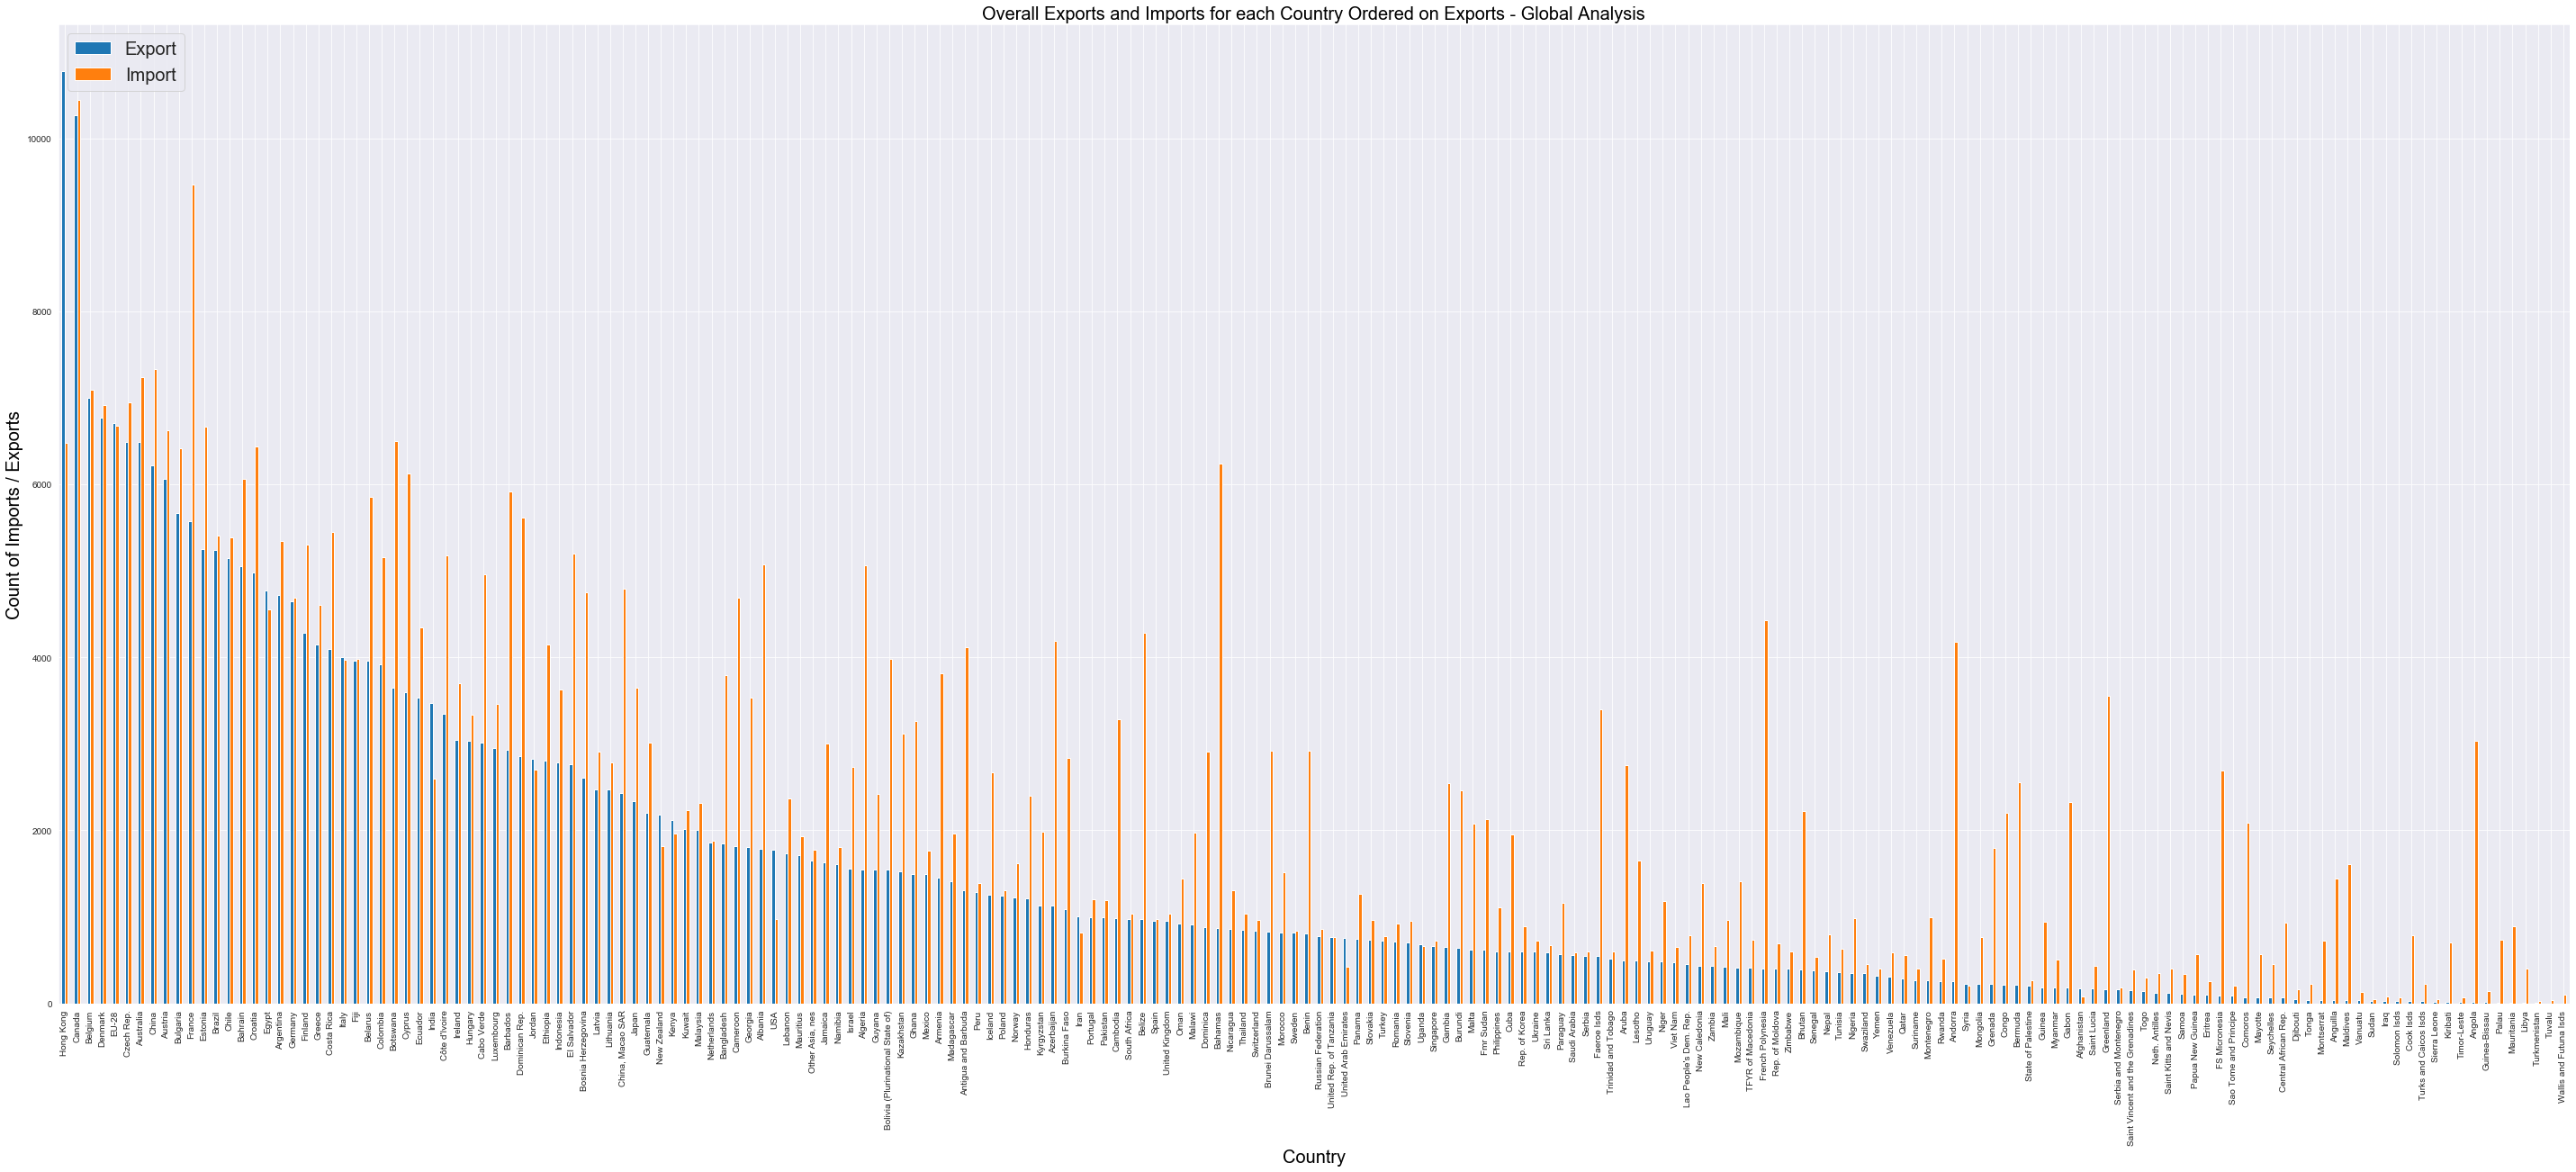

In [13]:
# 2. Overall Count of Exports and Imports for each Country sorted with Exports - Global Analysis

ImpExpflowcount = df_commtradestat.groupby(["country_or_area","flow"]).size().unstack().sort_values(by='Export',ascending=False).reset_index()
ImpExpflowcount.fillna(0, inplace=True, downcast = 'infer')
#print(ImpExpflowcount)

f,ax=plt.subplots(figsize=(50,20))
ImpExpflowcount.plot(x="country_or_area",y=["Export","Import"],kind='bar',ax=ax)
kwargs={'fontsize':20,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':20}
plt.xlabel("Country",**kwargs)
plt.ylabel("Count of Imports / Exports",**kwargs)
plt.legend(('Export','Import'),loc='upper left',fontsize=20)
plt.title("Overall Exports and Imports for each Country Ordered on Exports - Global Analysis",**kwargs)
plt.show()

In [ ]:
# 3. Percentage Difference of Count of Exports vs Count of Imports for top 3 countries

highexp = df_commtradestat.loc[df_commtradestat['country_or_area'].isin(['Hong Kong','India','USA'])]
#print(highexp)
df_highexp=highexp.groupby(["country_or_area","flow"]).size().unstack().sort_values(by='Export',ascending=False).reset_index()
#print(df_highexp)
perc = ((df_highexp['Export']-df_highexp['Import'])/(df_highexp['Export'])*100)
df_highexp['exp_perc_difference'] = ((df_highexp['Export']-df_highexp['Import'])/(df_highexp['Export'])*100).round(2).astype(str) + '%'
df_highexp


Analysis on Overall Count of Exports and Imports for each Country sorted with Exports - Global Analysis:
This analysis is on the number of imports vs exports for each country contributing to analysis. 
This analysis is done to understand the countries that do more export trading compared to imports with an assumption that export trading is a key component for a country's economy

The countries Hong kong, EU-28, Egypt, Italy, India, Jordan, New Zealand, Kenya, USA, Iran, Arab Emirates, Afganistan show higher export trading compared to import trading. Export trading is done in a larger scale with Hong Kong exporting 39.88% more, India exporting 25.13% more and USA exporting 45.04% more than imports trading

type is <class 'pandas.core.frame.DataFrame'>


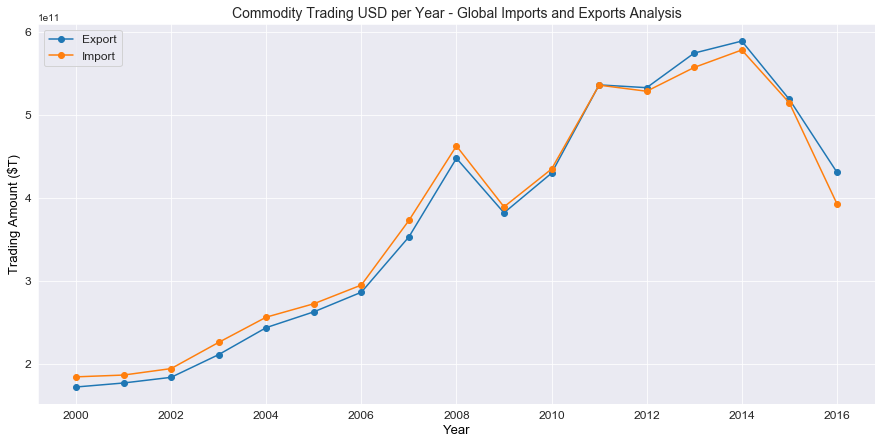

In [14]:
# 4. Global Imports and Exports Year to Year

df_impexpq = df_commtradestat.groupby(['year','flow']).sum().reset_index()
#print(df_impexpq)
flow_list=['Export','Import']
df_impexpq=df_impexpq[df_impexpq['flow'].isin(flow_list)]
f,ax=plt.subplots(figsize=(15,7))
for i in range(len(flow_list)):
    df_impexpq[df_impexpq.flow==flow_list[i]].plot(kind='line',x='year',y='trade_usd',marker='o',label=flow_list[i],ax=ax)
    df_test=df_impexpq[df_impexpq.flow==flow_list[i]]
    #print(df_test)
df_test1=df_test.loc[:,['year','trade_usd']]
#print(df_test1)
print("type is",type(df_test1))
pct=df_test1.pct_change()*100
#print(pct)
kwargs={'fontsize':13,'color':'black'}
plt.xlabel('Year',**kwargs)
plt.ylabel('Trading Amount ($T)',**kwargs)
kg={'length':3,'width':1,'color':'black','labelsize':12}
ax.tick_params(**kg)
plt.title("Commodity Trading USD per Year - Global Imports and Exports Analysis",fontsize=14)
plt.legend(loc='upper left',fontsize=12)
plt.show()

In [15]:
# 5. Percentage Change of Exports and Imports Year to Year

perct=df_impexpq.groupby(['year','flow'])['trade_usd'].sum().unstack()
print(perct.pct_change()*100)

flow     Export     Import
year                      
2000        NaN        NaN
2001   2.807670   1.168233
2002   3.851506   4.177682
2003  14.887483  16.241360
2004  15.388039  13.446967
2005   7.791057   6.294334
2006   9.005451   8.270921
2007  23.263490  26.359561
2008  26.826758  24.087403
2009 -14.665243 -15.857608
2010  12.501717  11.705614
2011  24.739731  23.238919
2012  -0.624733  -1.370131
2013   7.821827   5.429620
2014   2.515066   3.769701
2015 -11.928702 -11.014418
2016 -16.910565 -23.610391


Analysis:
This analysis is on global import and export count yearly for the reference time period 2000 - 2016. The overall picture shows imports are slightly higher in number compared to global exports but the overall change path for Imports and Exports are approximately the same since one country's import will be another country's export.

There is steady rise in imports and exports from 2000 until 2008 but then a rapid fall is reported in 2009 due to the global recession in 2009 and 2016. The world has seen the highest increase after between 2009 and 2014.

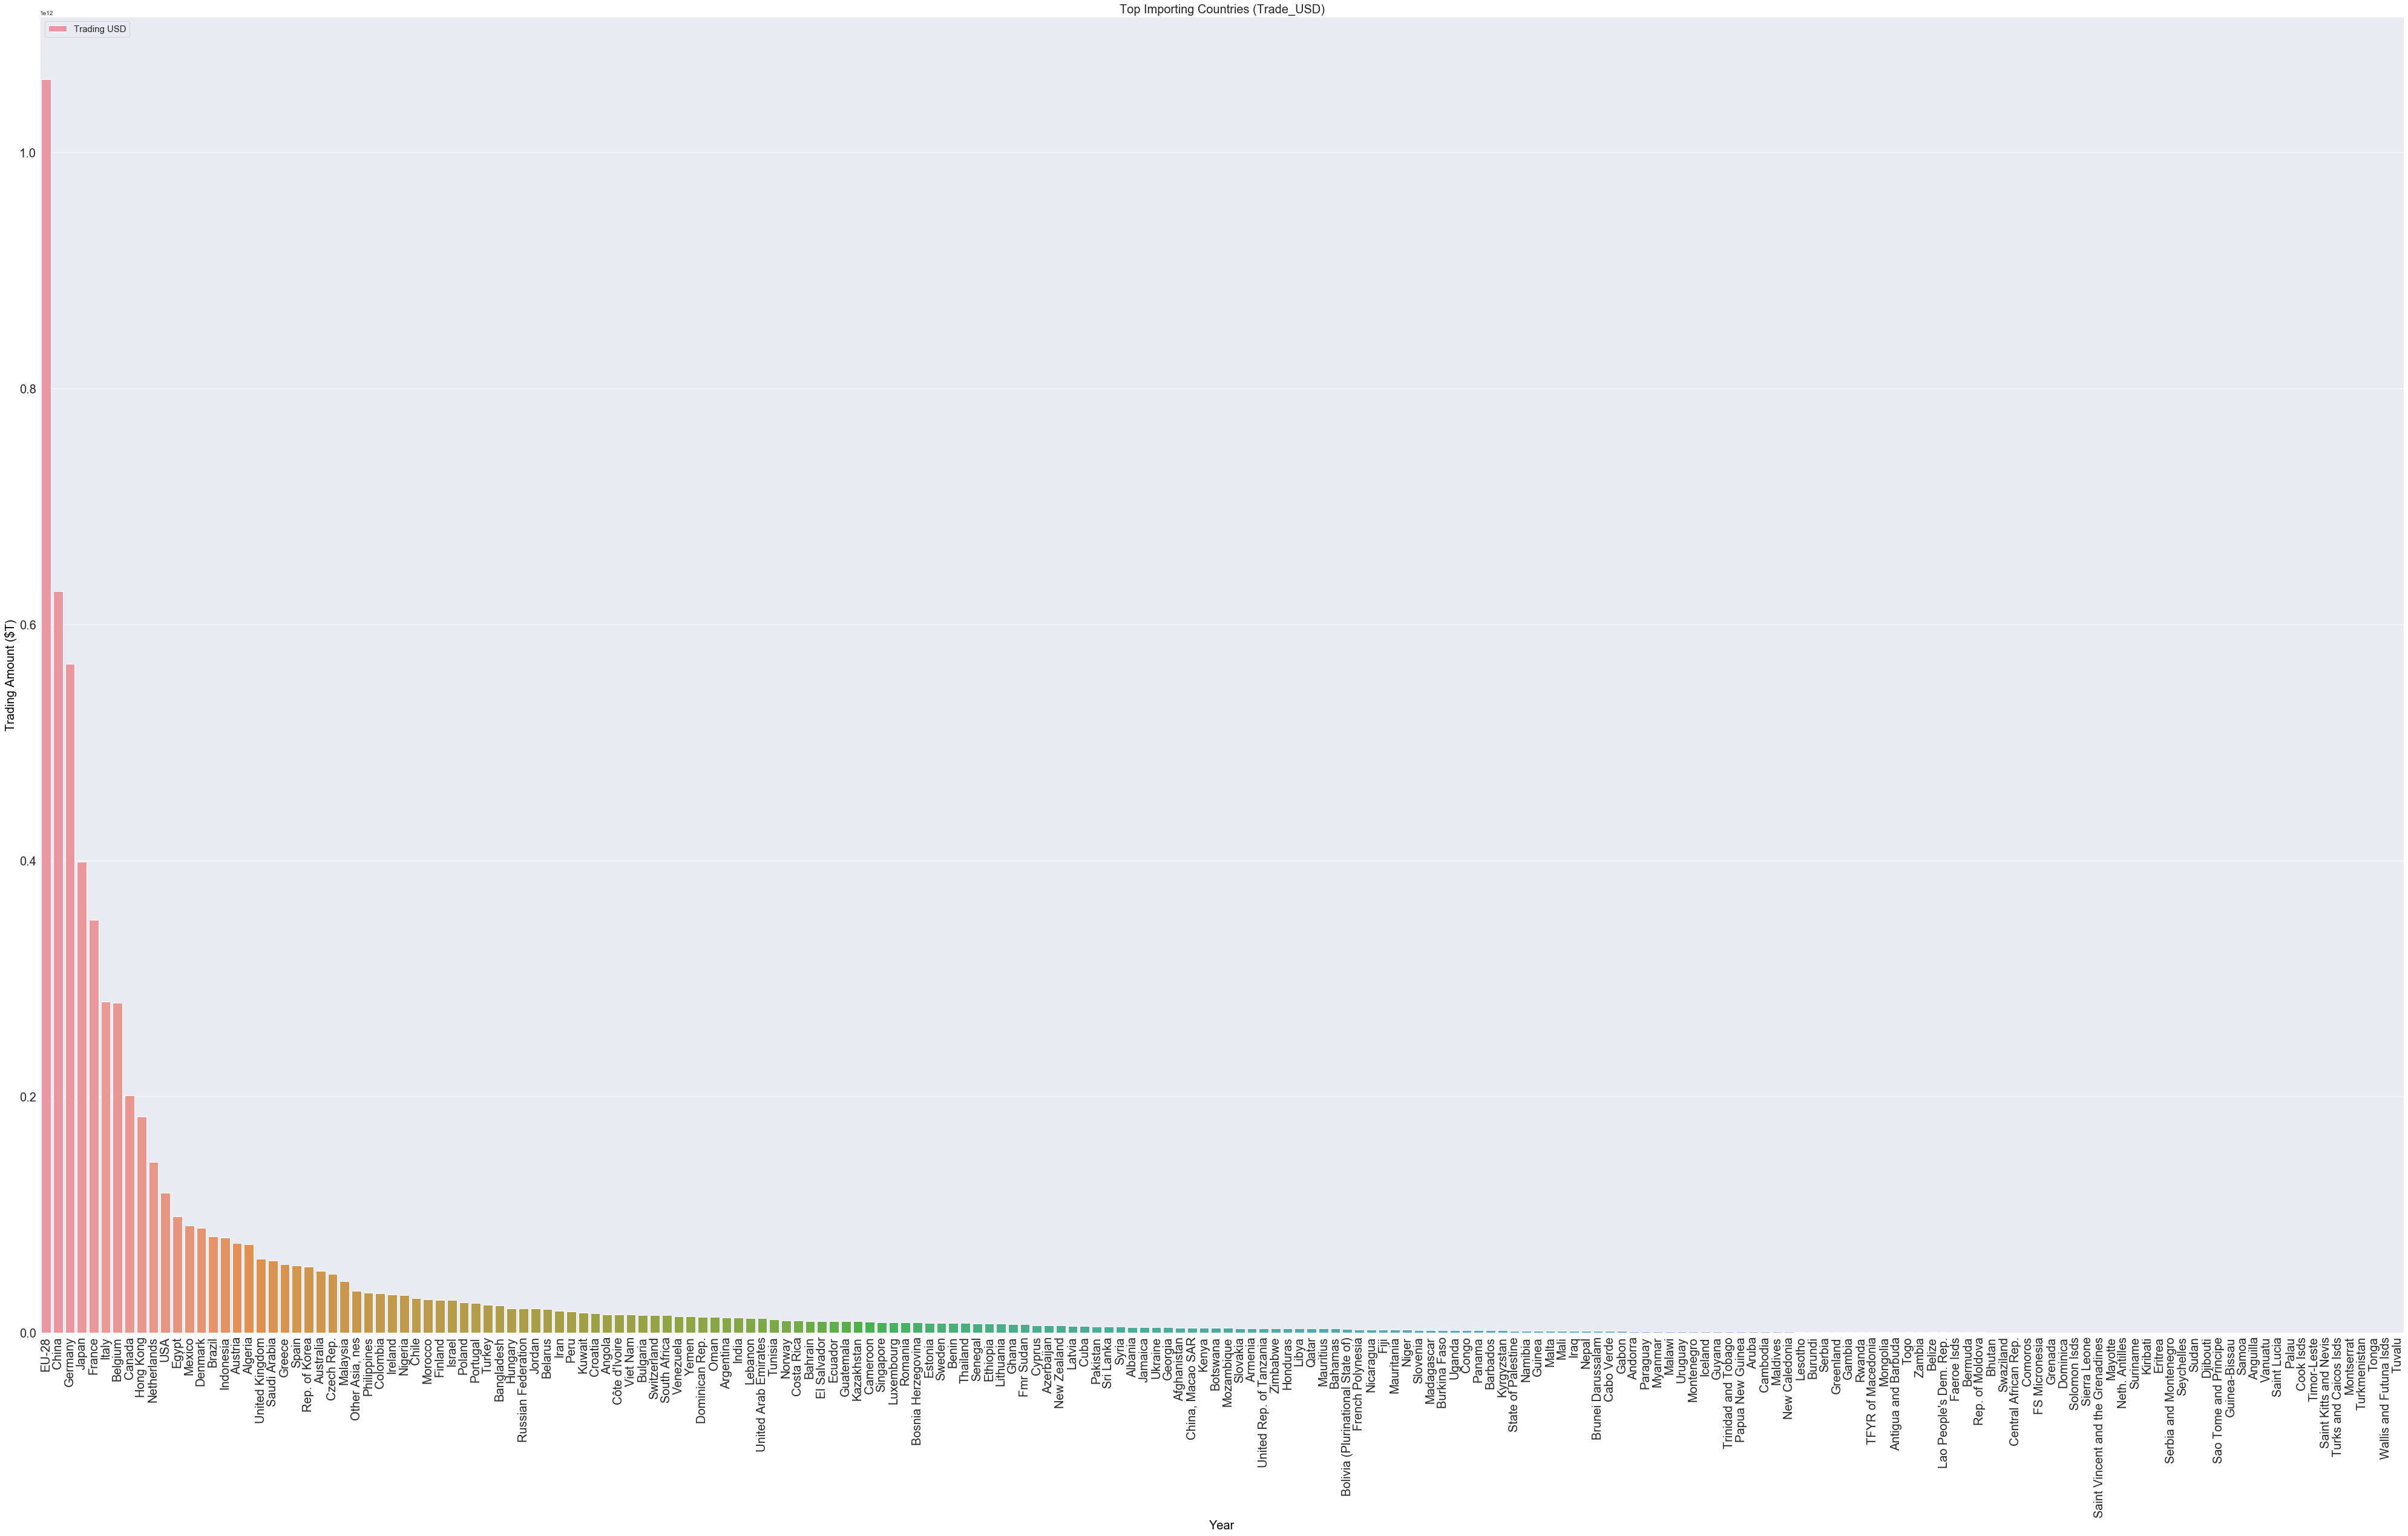

In [16]:
# 6. Top Importing Countries

df_importusdtopcountry = df_importsnew.groupby(['country_or_area'])['trade_usd'].sum().sort_values(ascending=False).reset_index()
#print(df_importusdtopcountry)

f,ax=plt.subplots(figsize=(70,40))
sns.barplot(x='country_or_area',y='trade_usd',data=df_importusdtopcountry,label="Trading USD")
plt.xticks(rotation=90)
kwargs={'fontsize':20,'color':'black'}
plt.xlabel('Year',**kwargs)
plt.ylabel('Trading Amount ($T)',**kwargs)
kg={'length':3,'width':1,'color':'black','labelsize':20}
ax.tick_params(**kg)
plt.title("Top Importing Countries (Trade_USD)",fontsize=20)
plt.legend(loc='upper left',fontsize=15)
plt.show()


In [17]:
# 7. Percentage Contribution of each Country to Global Market - Imports

df_totctryimp=df_importsnew.groupby(['country_or_area'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
df_totctryimp['perc']=(df_totctryimp['trade_usd']/df_totctryimp['trade_usd'].sum())*100
df_totctryimp


country_or_area      trade_usd       perc
53                    EU-28  1062021368450  16.650474
37                    China   628144020723   9.848103
70                  Germany   567073858007   8.890639
91                    Japan   399352077444   6.261081
65                   France   349762062460   5.483603
..                      ...            ...        ...
117              Montserrat       12009043   0.000188
181            Turkmenistan        7783501   0.000122
177                   Tonga        4278252   0.000067
194  Wallis and Futuna Isds        3483194   0.000055
183                  Tuvalu        2334744   0.000037

[198 rows x 3 columns]

Analysis:
This analysis shows the countries with high imports in order. EU-28, China, Germany are in the top 3 list of countries that does a large volume of import trading compared to the other countries.
EU-28 contributes 16.65% of global imports, China contributes 9.85% of global imports and Germany contributes 8.89% of global imports

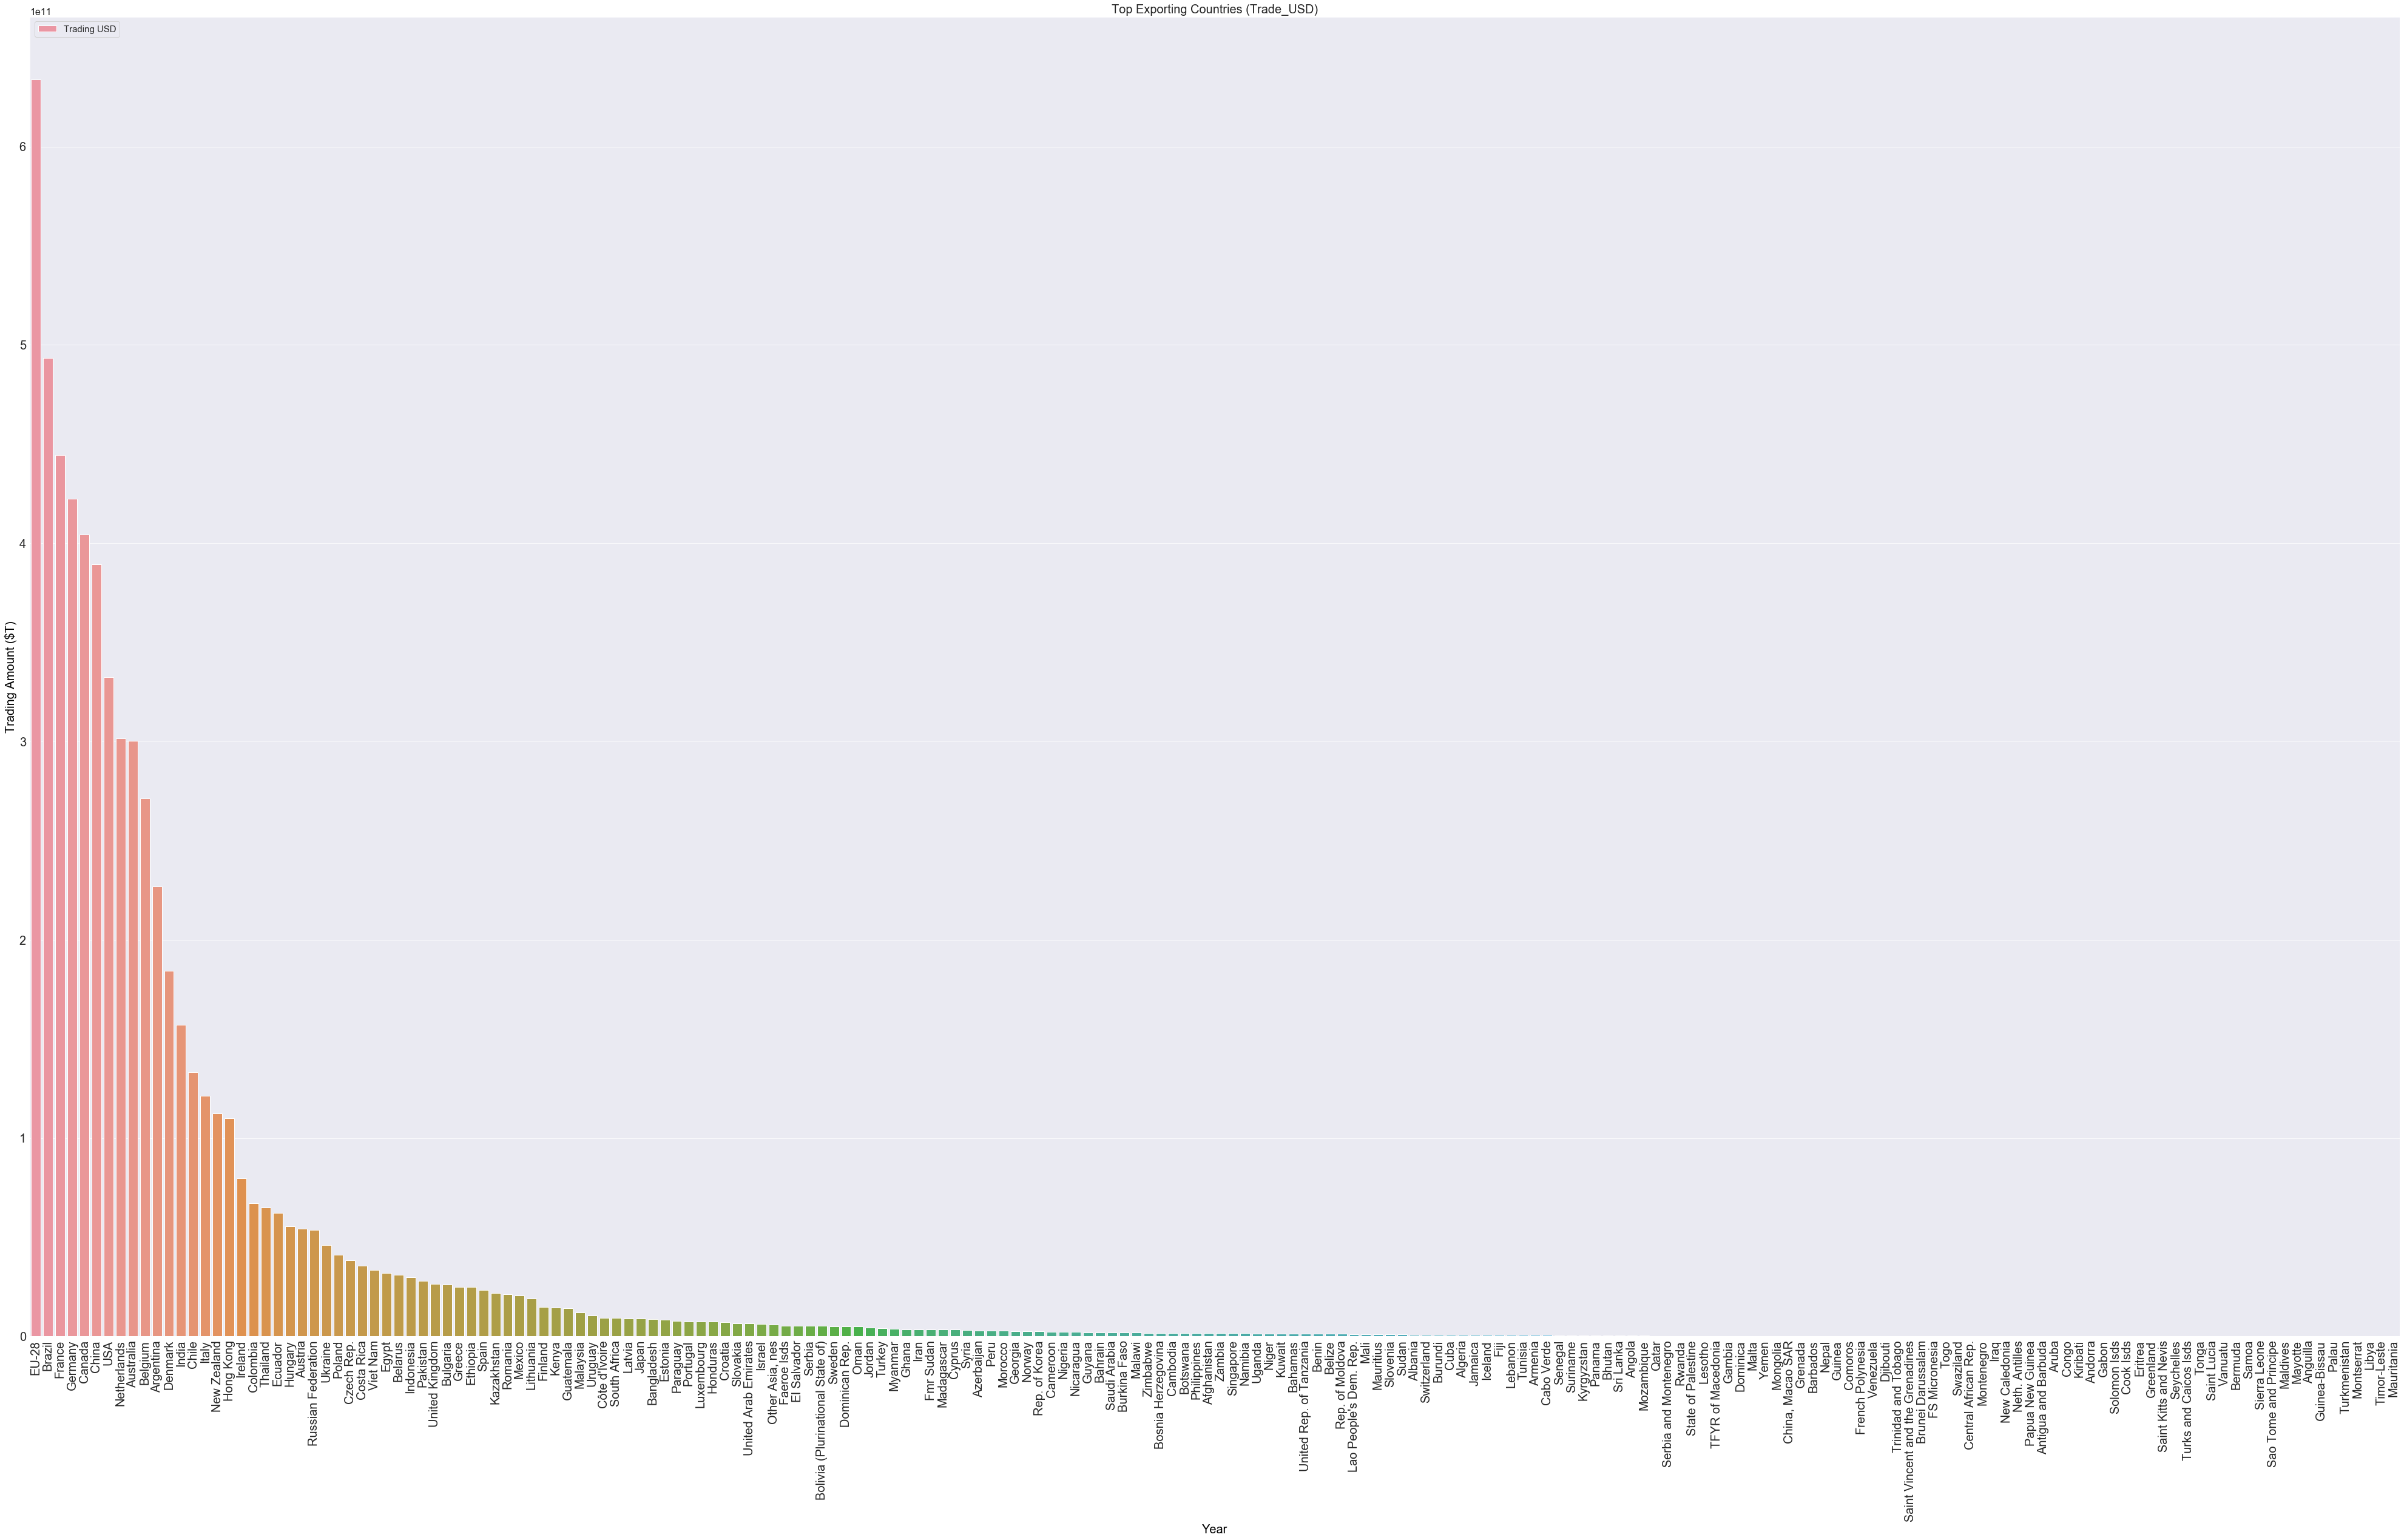

In [61]:
# 8. Top Exporting Countries (Trade_USD)

df_exportsusdcountry = df_exportsnew.groupby(['country_or_area'])['trade_usd'].sum().sort_values(ascending=False).reset_index()
#print(df_exportsusdcountry)

f,ax=plt.subplots(figsize=(70,40))
sns.barplot(x='country_or_area',y='trade_usd',data=df_exportsusdcountry,label="Trading USD")
plt.xticks(rotation=90)
kwargs={'fontsize':20,'color':'black'}
plt.xlabel('Year',**kwargs)
plt.ylabel('Trading Amount ($T)',**kwargs)
kg={'length':3,'width':1,'color':'black','labelsize':20}
ax.tick_params(**kg)
plt.title("Top Exporting Countries (Trade_USD)",fontsize=20)
plt.legend(loc='upper left',fontsize=15)
plt.show()

In [18]:
# 9. Percantage Contribution of each Country to Global Market - Exports

df_totctryexp=df_exportsnew.groupby(['country_or_area'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
df_totctryexp['perc']=(df_totctryexp['trade_usd']/df_totctryexp['trade_usd'].sum())*100
df_totctryexp

country_or_area     trade_usd          perc
53            EU-28  633680335085  1.001347e+01
26           Brazil  493379939994  7.796430e+00
65           France  444364648812  7.021886e+00
70          Germany  422446104052  6.675527e+00
34           Canada  404177683576  6.386848e+00
..              ...           ...           ...
181    Turkmenistan         71626  1.131840e-06
117      Montserrat         35915  5.675317e-07
102           Libya         33965  5.367177e-07
175     Timor-Leste         28662  4.529192e-07
111      Mauritania          7683  1.214074e-07

[196 rows x 3 columns]

Analysis:
This analysis shows the countries with high exports in order. EU-28, Brazil, France are in the top 3 list of countries that does a large volume of export trading compared to the other countries.
EU-28 contributes 10.01% of global exports, Brazil contributes 7.79% of global exports and France contributes 7.02% of global exports

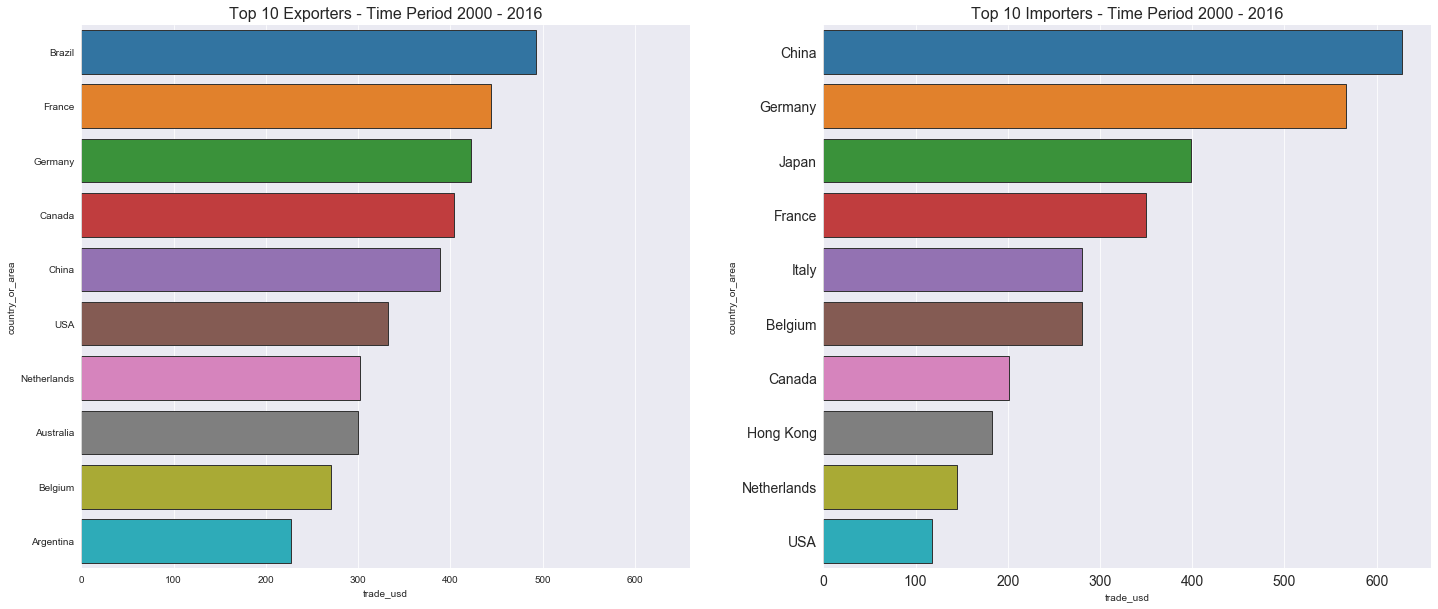

In [19]:
# 10. Top 10 Importers and Exporters Countries - Time Priod 2000 to 2016

df_commtradestatEU28=df_commtradestat[df_commtradestat.country_or_area != 'EU-28']
#print(df_commtradestatEU28)
def total_commodity(flow_list):
    dataset = df_commtradestatEU28.groupby(['country_or_area','flow']).sum().reset_index()
    #print(dataset)
    flow_list = ['Export','Import']
    #print("Flowlist : ",flow_list[0],flow_list[1])
    dataset = dataset[dataset['flow'].isin(flow_list)]
    #print(dataset)
    dataset.trade_usd = round(dataset.trade_usd/(10**9)).astype('int')
    #print(dataset)
    data=[]
    for i in flow_list:
        #print("flow_list:",flow_list)
        #print ("Inside the loop:", i)
        co = dataset[dataset.flow==i].sort_values(by='trade_usd', ascending=False)
        #print(co)
        data.append(co.head(10))
        #print(data)
    f, (ax1,ax2)=plt.subplots(1,2,'all',figsize=(10,10))
    axes=[ax1,ax2]
    for k in range(len(axes)):
        #print("printk:",k)
        #print ("data of k:",data[k])
        sns.barplot(x='trade_usd',y='country_or_area',data=data[k],ax=axes[k],edgecolor=".2")
        #print("axes[k]:",axes[k])
        axes[k].set_title('Top 10 ' + flow_list[k]+'ers ' + '-' + ' Time Period 2000 - 2016', fontsize=16)
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 14}
    axes[k].tick_params(**kwargs)
    x_axis=axes[k].axes.get_xaxis().set_visible(True)
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    return plt.show()
    
total_commodity(['Export','Import'])


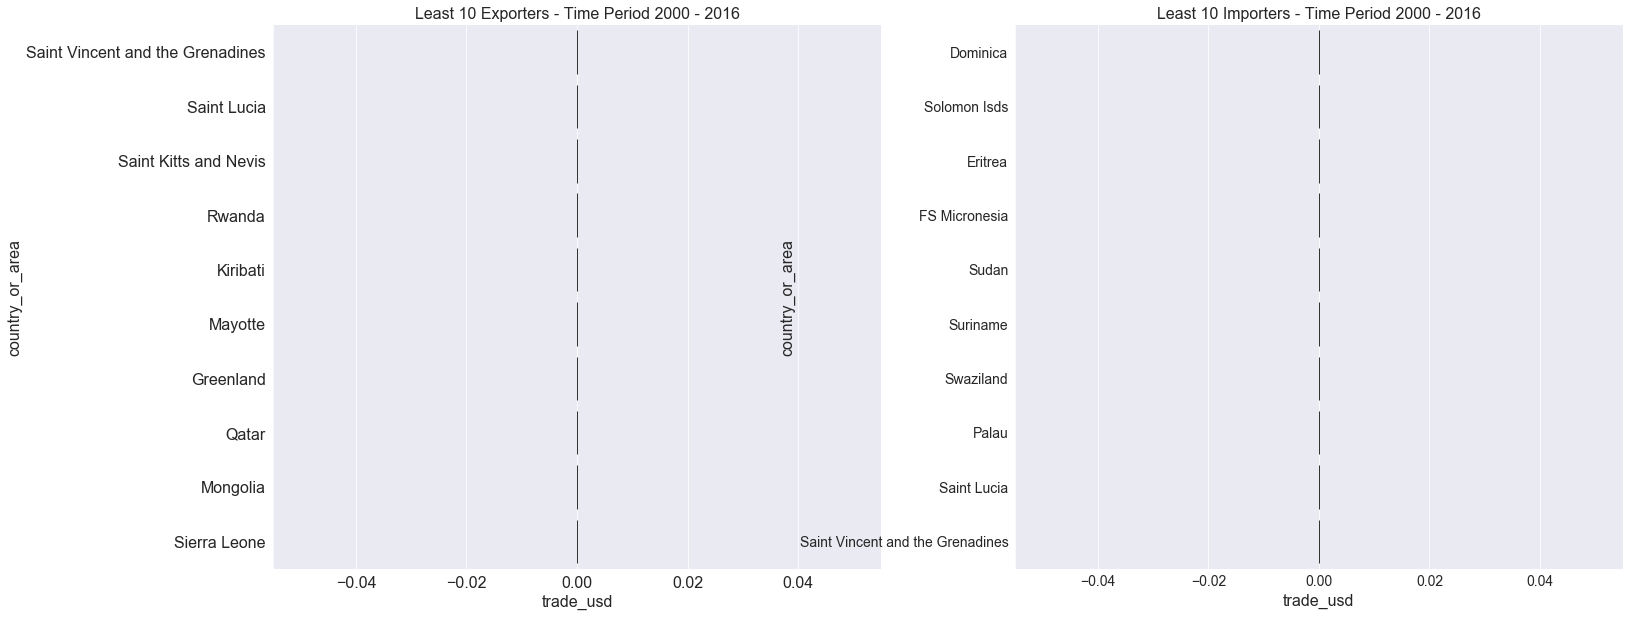

In [112]:
# 11. Least 10 Importers and Exporters Countries - Time Priod 2000 to 2016

df_commtradestatEU28=df_commtradestat[df_commtradestat.country_or_area != 'EU-28']
#print(df_commtradestatEU28)
def total_commodity(flow_list):
    dataset = df_commtradestatEU28.groupby(['country_or_area','flow']).sum().reset_index()
    #print(dataset)
    flow_list = ['Export','Import']
    #print("Flowlist : ",flow_list[0],flow_list[1])
    dataset = dataset[dataset['flow'].isin(flow_list)]
    #print(dataset)
    dataset.trade_usd = round(dataset.trade_usd/(10**9)).astype('int')
    #print(dataset)
    data=[]
    for i in flow_list:
        #print("flow_list:",flow_list)
        #print ("Inside the loop:", i)
        co = dataset[dataset.flow==i].sort_values(by='trade_usd', ascending=False)
        #print(co)
        data.append(co.tail(10))
        #print(data)
    f, (ax1,ax2)=plt.subplots(1,2,'all',figsize=(10,10))
    axes=[ax1,ax2]
    for k in range(len(axes)):
        #print("printk:",k)
        #print ("data of k:",data[k])
        sns.barplot(x='trade_usd',y='country_or_area',data=data[k],ax=axes[k],edgecolor=".2")
        #print("axes[k]:",axes[k])
        axes[k].set_title('Least 10 ' + flow_list[k]+'ers ' + '-' + ' Time Period 2000 - 2016', fontsize=16)
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 14}
    axes[k].tick_params(**kwargs)
    x_axis=axes[k].axes.get_xaxis().set_visible(True)
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    return plt.show()
    
total_commodity(['Export','Import'])


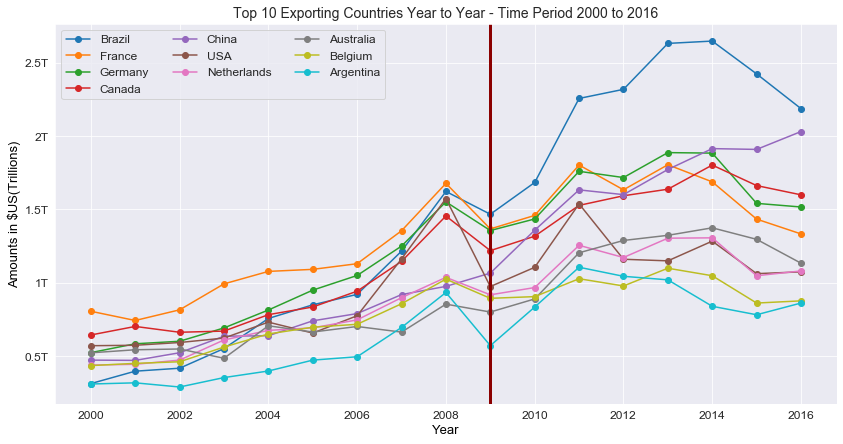

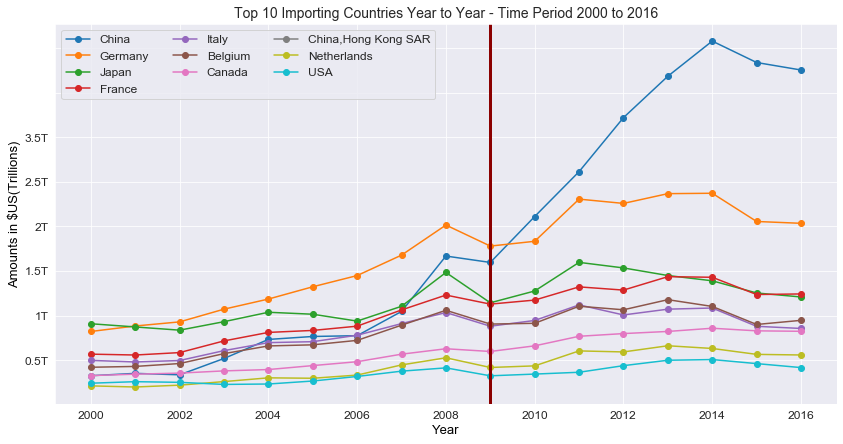

In [113]:
# 12. Top 10 Importing / Exporting Countries Year to Year

def imp_exp(input):
    data=df_commtradestat.groupby(['country_or_area','year','flow']).sum().reset_index()
    flow_list=['Export','Import']
    ctry_list_imp=['China','Germany','Japan','France','Italy','Belgium','Canada','China,Hong Kong SAR','Netherlands','USA']
    ctry_list_exp=['Brazil','France','Germany','Canada','China','USA','Netherlands','Australia','Belgium','Argentina']
    ctry_type=[ctry_list_exp,ctry_list_imp]
    ctry_select=ctry_type[input]
    data=data[data['country_or_area'].isin(ctry_select)]
    
    f,ax=plt.subplots(figsize=(14,7))
    
    for i in range(len(ctry_list_imp)):
        data[(data.country_or_area==ctry_select[i]) & (data.flow==flow_list[input])].plot(kind='line',x='year',y='trade_usd', marker='o',label=ctry_select[i],ax=ax)
        ax.axvline(x=2009, color='darkred',linestyle='-',linewidth=3)
        kwargs={'fontsize':13, 'color':'black'}
        plt.xlabel('Year',**kwargs)
        plt.ylabel('Amounts in $US(Trillions)',**kwargs)
        ax.set_yticklabels(['0','0.5T','1T','1.5T','2T','2.5T','3.5T'])
        kg={'length':3, 'width':1,'color':'black','labelsize':12}
        ax.tick_params(**kg)
        plt.title('Top 10 ' + flow_list[input]+'ing'+' Countries Year to Year - Time Period 2000 to 2016',fontsize=14)
        plt.legend(loc='best',fontsize=12,ncol=3)
    return plt.show()
imp_exp(0)
imp_exp(1)

Analysis:
Analysis: 
The analysis shows the top 10 countries that contributes to highest imports and exports globally year to year. Brazil contributes to highest export and China contributes to highest import. All countries have faced a donwfall during the great recession during 2009 and 2016 2010 to 2014 have seen a great upsurge in imports and exports in all top countries

Brazil, France, Germany are the top 3 countries in export trading year to year for the reference period 2000-1016
China, Germany, Japan are the 3 top listed countries in import trading year to year for the reference period 2000-2016

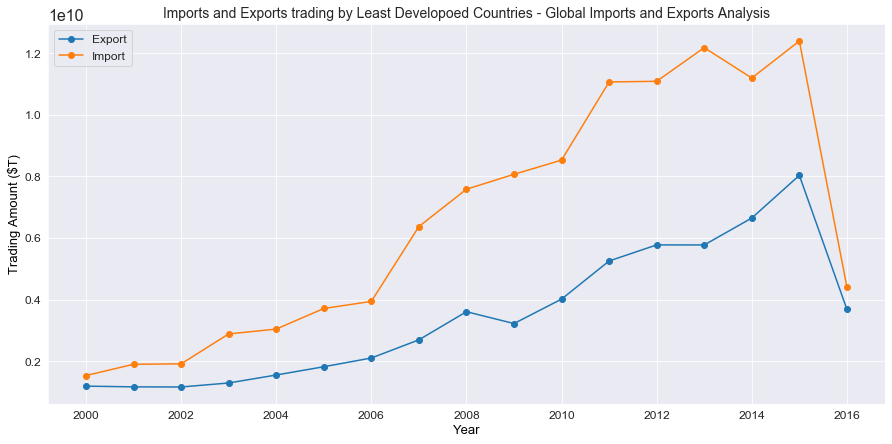

In [114]:
# 13. Imports and Exports trading by Least Developoed Countries

df_impexpLDC = df_LDC_imp_exp.groupby(['year','flow']).sum().reset_index()
#print(df_impexpLDC)
flow_list=['Export','Import']
df_impexpLDC=df_impexpLDC[df_impexpLDC['flow'].isin(flow_list)]
f,ax=plt.subplots(figsize=(15,7))
for u in range(len(flow_list)):
    df_impexpLDC[df_impexpLDC.flow==flow_list[u]].plot(kind='line',x='year',y='trade_usd',marker='o',label=flow_list[u],ax=ax)
kwargs={'fontsize':13,'color':'black'}
plt.xlabel('Year',**kwargs)
plt.ylabel('Trading Amount ($T)',**kwargs)
kg={'length':3,'width':1,'color':'black','labelsize':12}
ax.tick_params(**kg)
plt.title("Imports and Exports trading by Least Developoed Countries - Global Imports and Exports Analysis",fontsize=14)
plt.legend(loc='upper left',fontsize=12)
plt.show()

In [115]:
# 14. Percentage of change of Imports Year to Year for LDCs

chge_imp_LDC=df_LDC_imports.groupby(['year','flow'])['trade_usd'].sum()
#df_perc_imp_LDC.rename(columns={'trade_usd':'trade_usd_LDC'},inplace=True)
df_chge_imp_LDC = pd.DataFrame(chge_imp_LDC)
df_chge_imp_LDC['Perc_Change_Imp']=df_chge_imp_LDC.pct_change()*100
print(df_chge_imp_LDC)

               trade_usd  Perc_Change_Imp
year flow                                
2000 Import   1532161464              NaN
2001 Import   1897141916        23.821279
2002 Import   1911602905         0.762251
2003 Import   2883893347        50.862574
2004 Import   3041710179         5.472353
2005 Import   3710535160        21.988452
2006 Import   3940669939         6.202199
2007 Import   6372753782        61.717522
2008 Import   7585659293        19.032675
2009 Import   8071629799         6.406437
2010 Import   8532032234         5.703959
2011 Import  11071870067        29.768263
2012 Import  11093462980         0.195025
2013 Import  12186469331         9.852707
2014 Import  11199461329        -8.099212
2015 Import  12400165667        10.721090
2016 Import   4407548222       -64.455731


In [116]:
# 15. Percentage of change of Exports Year to Year for LDCs

chge_exp_LDC=df_LDC_exports.groupby(['year','flow'])['trade_usd'].sum()
df_chge_exp_LDC = pd.DataFrame(chge_exp_LDC)
df_chge_exp_LDC['Perc_Change_Exp']=df_chge_exp_LDC.pct_change()*100
print(df_chge_exp_LDC)

              trade_usd  Perc_Change_Exp
year flow                               
2000 Export  1187543293              NaN
2001 Export  1164224038        -1.963655
2002 Export  1159290555        -0.423757
2003 Export  1290011162        11.275914
2004 Export  1549036817        20.079334
2005 Export  1817549433        17.334166
2006 Export  2101706711        15.634088
2007 Export  2691908785        28.082038
2008 Export  3605950427        33.955149
2009 Export  3221211661       -10.669552
2010 Export  4015311559        24.652211
2011 Export  5253961870        30.848174
2012 Export  5776965642         9.954465
2013 Export  5775251864        -0.029666
2014 Export  6649867561        15.144200
2015 Export  8036367090        20.850032
2016 Export  3683168411       -54.168739


Analysis:
Imports and exports trading analysis for Least Developed Countries shows that export trading is much lesser compared to import trading. There is a good growth seen in imports and exports until 2015 and after which we see a sudden and deep fall due to the global recession in 2016
Imports being more than exports will have a major negative impact on the LDC's economy

The percentage change of imports and exports year to year to reported with the slight growth the highest growth in 2008 and 2011. The sudden downfall is seen in 2009 and 2016 due to the global recession

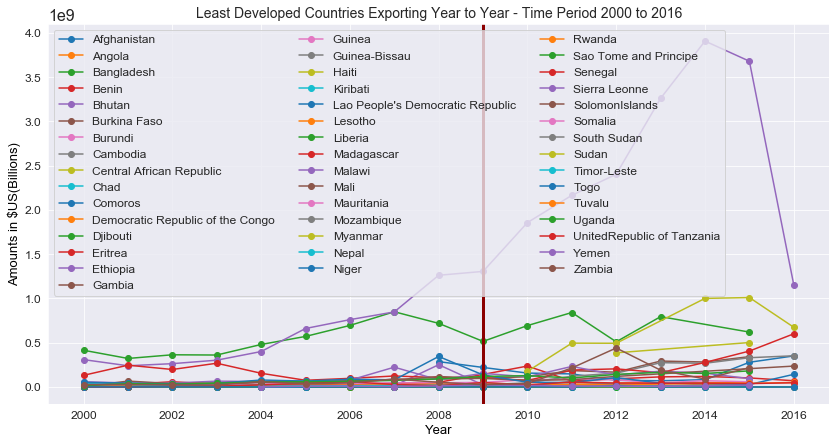

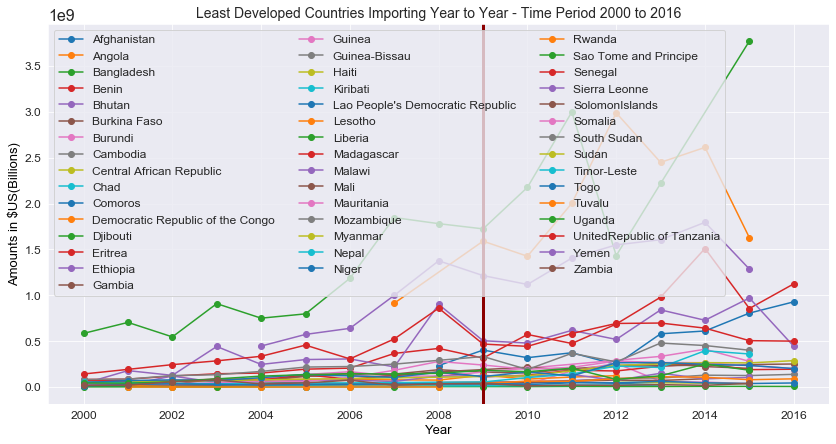

In [117]:
# 16. Least Developed Countries Importing / Exporting Year to Year

def imp_exp(input):
    data=df_LDC_imp_exp.groupby(['country_or_area','year','flow']).sum().reset_index()
    #print(data)
    flow_list=['Export','Import']
    LDC_list=["Afghanistan","Angola","Bangladesh","Benin","Bhutan","Burkina Faso","Burundi","Cambodia","Central African Republic","Chad","Comoros","Democratic Republic of the Congo","Djibouti","Eritrea","Ethiopia","Gambia","Guinea","Guinea-Bissau","Haiti","Kiribati","Lao People's Democratic Republic","Lesotho","Liberia","Madagascar","Malawi","Mali","Mauritania","Mozambique","Myanmar","Nepal","Niger","Rwanda","Sao Tome and Principe","Senegal","Sierra Leonne","SolomonIslands","Somalia","South Sudan","Sudan","Timor-Leste","Togo","Tuvalu","Uganda","UnitedRepublic of Tanzania","Yemen","Zambia"]
    #ctry_list_exp=['Brazil','France','Germany','Canada','China','USA','Netherlands','Australia','Belgium','Argentina']
    #ctry_type=[ctry_list_exp,ctry_list_imp]
    #ctry_select=ctry_type[input]
    #data=data[data['country_or_area'].isin(ctry_select)]
    
    f,ax=plt.subplots(figsize=(14,7))
    
    for a in range(len(LDC_list)):
        data[(data.country_or_area==LDC_list[a]) & (data.flow==flow_list[input])].plot(kind='line',x='year',y='trade_usd', marker='o',label=LDC_list[a],ax=ax)
        #t=data[(data.country_or_area==LDC_list[a]) & (data.flow==flow_list[input])]
        #print(t)
        ax.axvline(x=2009, color='darkred',linestyle='-',linewidth=3)
        kwargs={'fontsize':13, 'color':'black'}
        plt.xlabel('Year',**kwargs)
        plt.ylabel('Amounts in $US(Billions)',**kwargs)
        #ax.set_yticklabels(['0','0.5T','1T','1.5T','2T','2.5T','3.5T'])
        kg={'length':3, 'width':1,'color':'black','labelsize':12}
        ax.tick_params(**kg)
        plt.title('Least Developed Countries ' + flow_list[input]+'ing'+' Year to Year - Time Period 2000 to 2016',fontsize=14)
        plt.legend(loc='best',fontsize=12,ncol=3)
    return plt.show()
imp_exp(0)
imp_exp(1)


In [ ]:
# 17. Percentage of LDCs Imports VS Global Imports

df_perc_imp_LDC=df_LDC_imports.groupby(['year','flow'])['trade_usd'].sum().reset_index()
df_perc_imp_LDC.rename(columns={'trade_usd':'trade_usd_LDC'},inplace=True)
print(type(df_perc_imp_LDC))

df_perc_imp_world=df_importsnew.groupby(['year','flow'])['trade_usd'].sum().reset_index()
df_perc_imp_world.rename(columns={'trade_usd':'trade_usd_world'},inplace=True)
print(type(df_perc_imp_world))

df_perc_imp_LDC['trade_usd_world']=df_perc_imp_world['trade_usd_world'].values
df_perc_imp_LDC
df_perc_imp_LDC['perc_LDC_of_world']=(df_perc_imp_LDC['trade_usd_LDC']/df_perc_imp_LDC['trade_usd_world'])*100
print(df_perc_imp_LDC)
f,ax=plt.subplots(figsize=(15,7))
df_perc_imp_LDC.plot(x='year',y=['trade_usd_LDC','trade_usd_world'],kind='line',marker='o',ax=ax)

kwargs={'fontsize':15,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':12}
plt.xlabel("Year",**kwargs)
plt.ylabel("Trading Amount ($T)",**kwargs)
plt.xticks(rotation=0)
plt.legend(('Yearly LDCs Imports','Yearly Total Global Imports'),loc='upper left',fontsize=12)
plt.title("Contribution of LDCs Imports Over Global Imports",**kwargs)
plt.show()


In [118]:
# Percentage of Total LDCs Import Trade VS Global Trade

df_tot_perc_imp_LDC=df_LDC_imports.groupby(['flow'])['trade_usd'].sum().reset_index()
df_tot_perc_imp_LDC.rename(columns={'trade_usd':'total_trade_usd_LDC'},inplace=True)
#print(df_tot_perc_imp_LDC)

df_perc_imp_world=df_importsnew.groupby(['flow'])['trade_usd'].sum().reset_index()
df_perc_imp_world.rename(columns={'trade_usd':'trade_usd_world'},inplace=True)
#print(df_perc_imp_world)

df_tot_perc_imp_LDC['trade_usd_world']=df_perc_imp_world['trade_usd_world'].values
#print(df_perc_imp_LDC)
df_tot_perc_imp_LDC['total_perc_LDC_of_world']=(df_tot_perc_imp_LDC['total_trade_usd_LDC']/df_tot_perc_imp_LDC['trade_usd_world'])*100
print(df_tot_perc_imp_LDC)





     flow  total_trade_usd_LDC  trade_usd_world  total_perc_LDC_of_world
0  Import         111838767614    6378325182741                 1.753419


Analysis:
The imports of LDC year to year is larger than the respective total global imports. The contribution of LDCs in global import market is meagre around a little more than 1% on an average.

In [ ]:
# 18. Contribution of LDCs Export VS Global Export

df_perc_exp_LDC=df_LDC_exports.groupby(['year','flow'])['trade_usd'].sum().reset_index()
df_perc_exp_LDC.rename(columns={'trade_usd':'trade_usd_LDC'},inplace=True)
print(type(df_perc_exp_LDC))

df_perc_exp_world=df_exportsnew.groupby(['year','flow'])['trade_usd'].sum().reset_index()
df_perc_exp_world.rename(columns={'trade_usd':'trade_usd_world'},inplace=True)
print(type(df_perc_exp_world))

df_perc_exp_LDC['trade_usd_world']=df_perc_exp_world['trade_usd_world'].values
df_perc_exp_LDC['perc_LDC_of_world']=(df_perc_exp_LDC['trade_usd_LDC']/df_perc_exp_LDC['trade_usd_world'])*100
print(df_perc_exp_LDC)
f,ax=plt.subplots(figsize=(15,7))
df_perc_exp_LDC.plot(x='year',y=['trade_usd_LDC','trade_usd_world'],kind='line',marker='o',ax=ax)

kwargs={'fontsize':15,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':12}
plt.xlabel("Year",**kwargs)
plt.ylabel("Trading Amount ($T)",**kwargs)
plt.xticks(rotation=0)
plt.legend(('Yearly LDCs Exports','Yearly Total Global Exports'),loc='upper left',fontsize=12)
plt.title("Contribution of LDCs Exports Over Total Global Export",**kwargs)
plt.show()


In [ ]:
# Percentage of Total LDCs Export Trade VS Global Trade

df_tot_perc_exp_LDC=df_LDC_exports.groupby(['flow'])['trade_usd'].sum().reset_index()
df_tot_perc_exp_LDC.rename(columns={'trade_usd':'total_trade_usd_LDC'},inplace=True)
#print(df_tot_perc_exp_LDC)

df_perc_exp_world=df_exportsnew.groupby(['flow'])['trade_usd'].sum().reset_index()
df_perc_exp_world.rename(columns={'trade_usd':'trade_usd_world'},inplace=True)
#print(df_perc_exp_world)

df_tot_perc_exp_LDC['trade_usd_world']=df_perc_exp_world['trade_usd_world'].values
#print(df_perc_exp_LDC)
df_tot_perc_exp_LDC['total_perc_LDC_of_world']=(df_tot_perc_exp_LDC['total_trade_usd_LDC']/df_tot_perc_exp_LDC['trade_usd_world'])*100
print(df_tot_perc_exp_LDC)





Analysis:
The exports of LDCs year to year is larger than the respective total global exports. The contribution of LDCs in global export market is meagre around a little more than 1% on an average.

ANALYSIS ON COMMODITIES

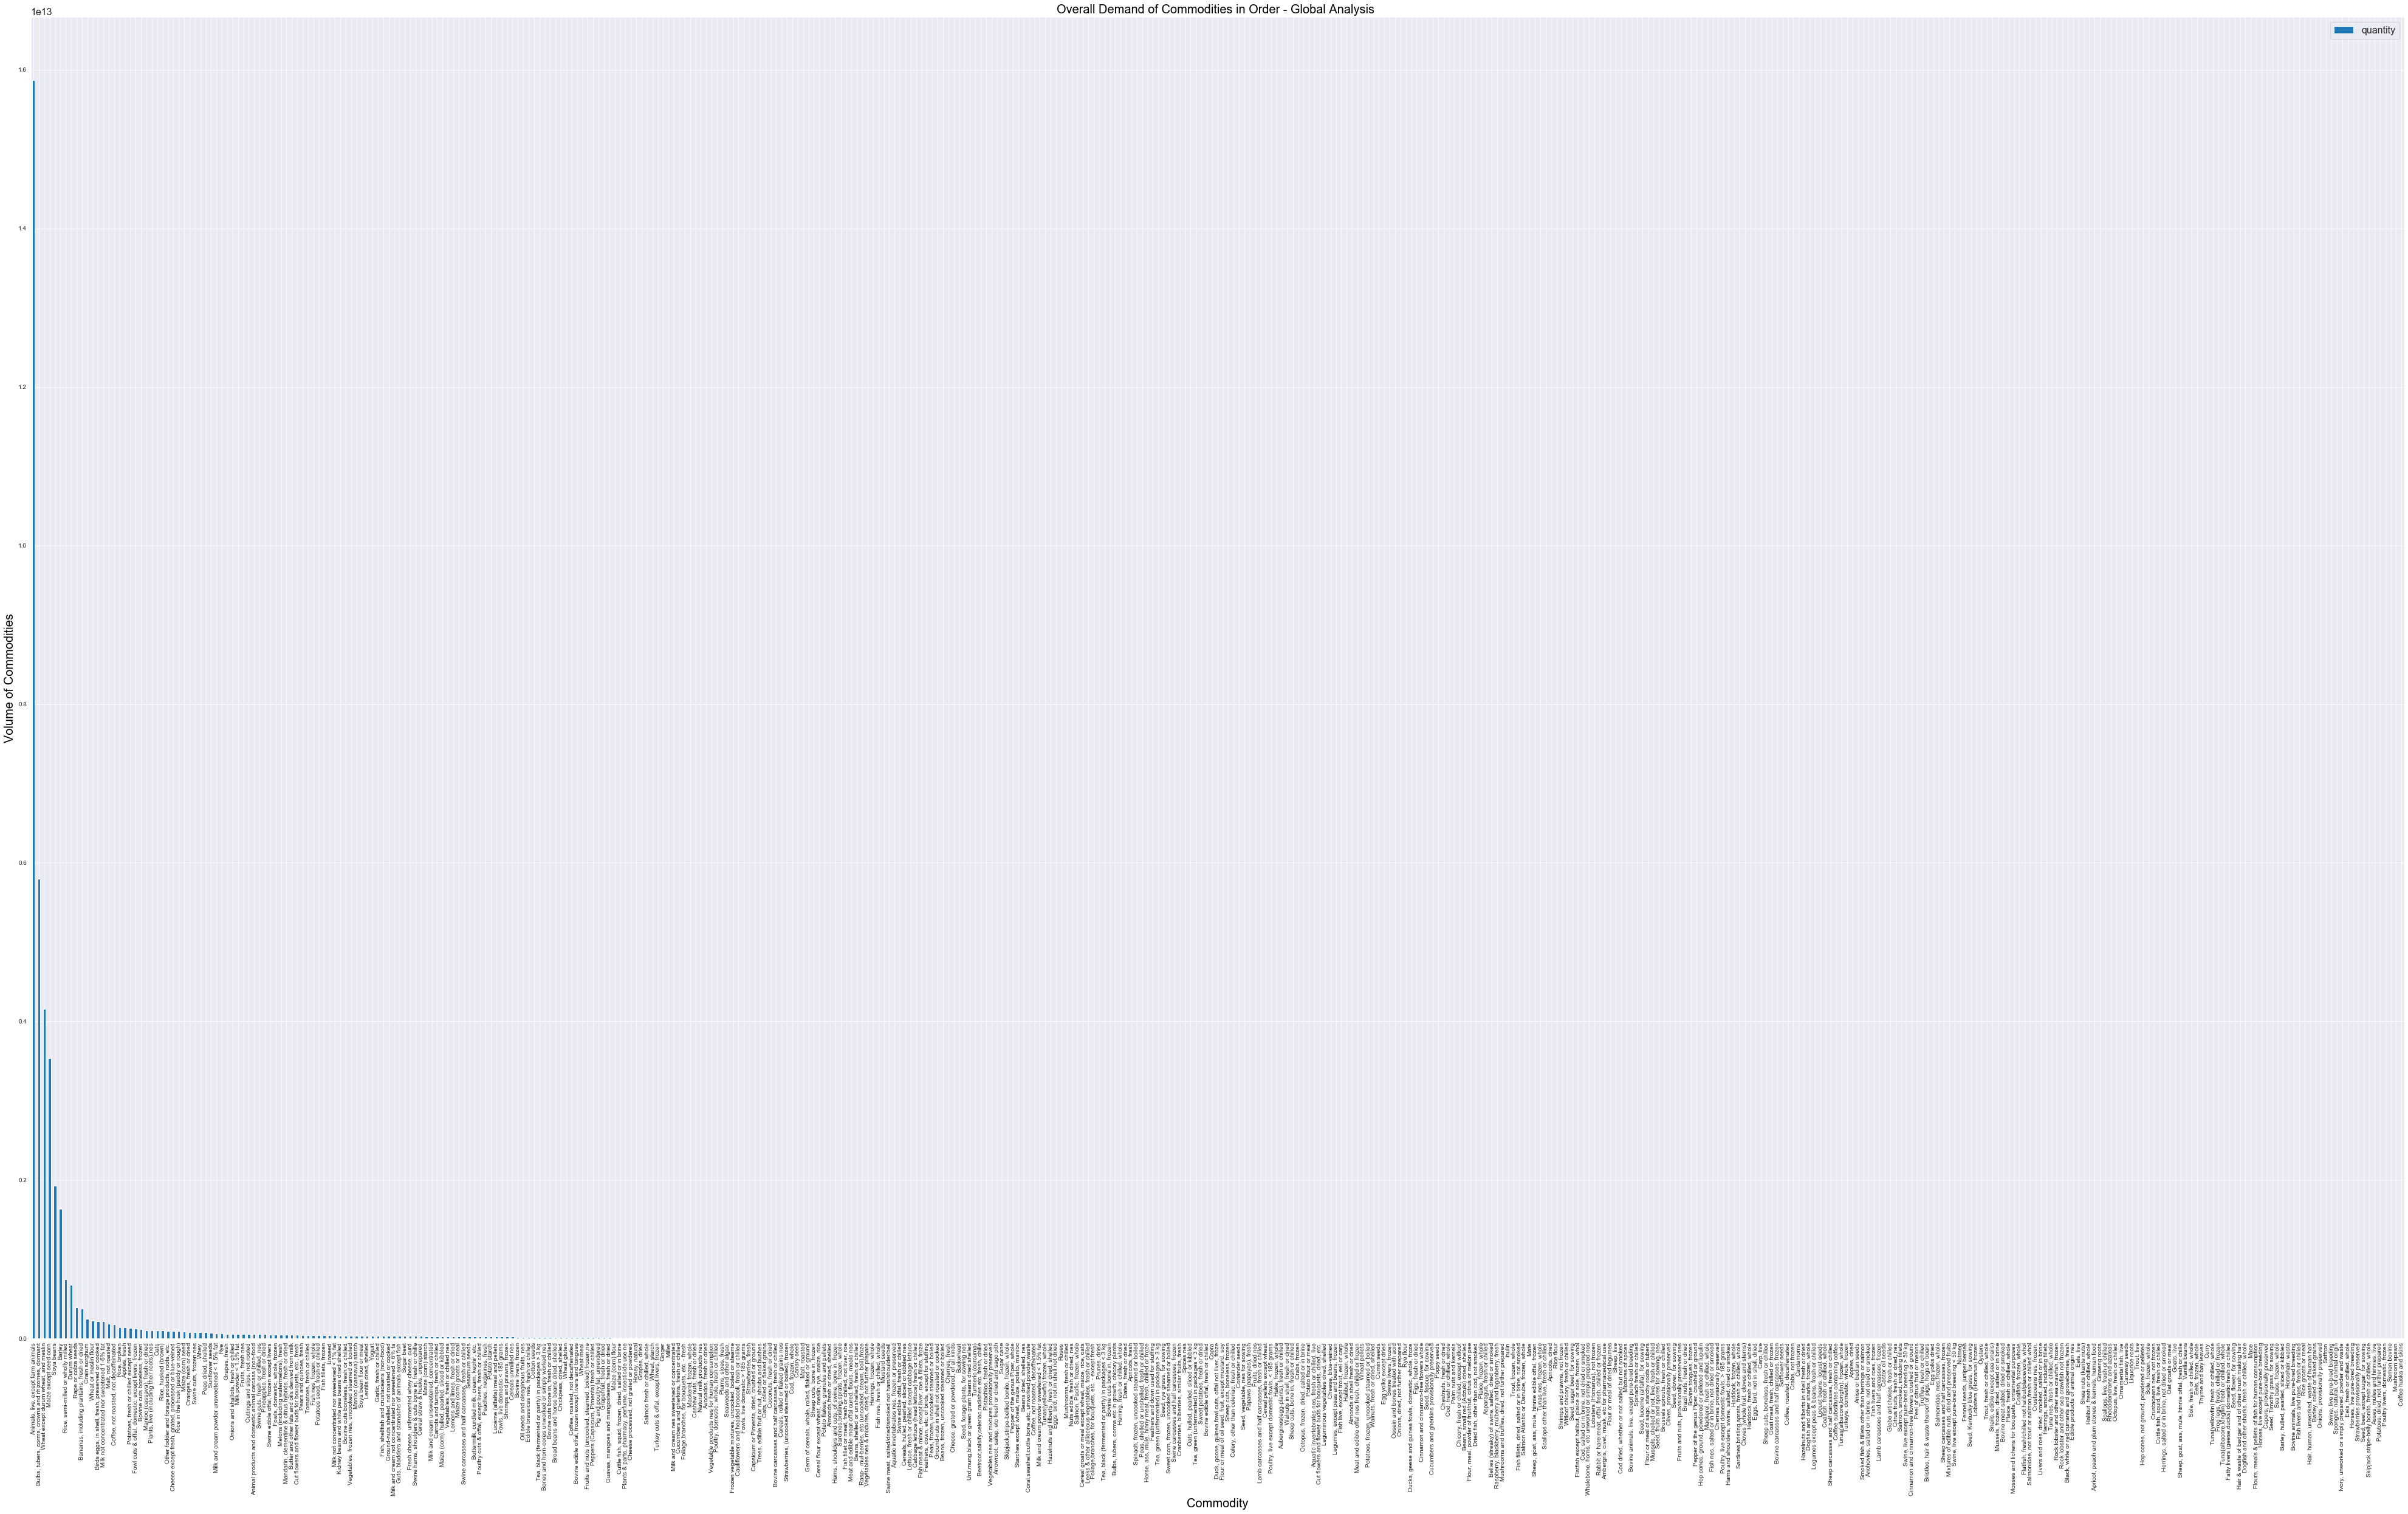

In [119]:
# 19. Overall Demand of Commodities in Order - Global Volume Analysis

df_commdemand = df_commtradestat.groupby(["commodity"])['quantity'].sum().sort_values(ascending=False).reset_index()
#print(df_commdemand)
f,ax=plt.subplots(figsize=(70,40))
df_commdemand.plot(x='commodity',y='quantity',kind='bar',ax=ax)
kwargs={'fontsize':20,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':10}
plt.xlabel("Commodity",**kwargs)
plt.ylabel("Volume of Commodities",**kwargs)
ax.tick_params(**kg)
plt.title("Overall Demand of Commodities in Order - Global Analysis ",**kwargs)
plt.show()

Analysis:
The analysis shows the quantity demand of commodities in descending order globally. "Animals live except farm animals" are the most in demand and contribtes 38.06% of global commodities.

In [ ]:
# 20. Commodity with Highest Trade_USD - Global Trading Imports

df_importstradeusd = df_importsnew.loc[:,['commodity','flow','trade_usd']]
#print(df_importstradeusd)
f,ax=plt.subplots(figsize=(70,40))
df_importshightradeusd = df_importstradeusd.groupby(["commodity"])['trade_usd'].sum().sort_values(ascending=False).reset_index()
df_importshightradeusd.plot(x='commodity',y='trade_usd',kind='bar',ax=ax)
kwargs={'fontsize':20,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':9}
plt.xlabel("Commodity",**kwargs)
plt.ylabel("Trading Amount ($T)",**kwargs)
ax.tick_params(**kg)
plt.title("Commodity with Highest Trade_USD - Global Trading Imports",**kwargs)
plt.show()



In [ ]:
# 21. Percentage of each Commodity to Global Market - Imports

df_importshightradeusd['perc_total']=(df_importshightradeusd['trade_usd']/df_importshightradeusd['trade_usd'].sum())*100
df_importshightradeusd

Analysis:
This analysis shows commodities that are highest Imports in trading USD globally. The highest trading commodity on Imports is Soya Beans. Soya beans contributes to 8.21% of global imports and "Wheat except durum wheat, and meslin" contributes to 6.33% of global imports.

In [ ]:
# 22. Commodity with Highest Trade_USD - Global Trading Exports

df_exportstradeusd = df_exportsnew.loc[:,['commodity','flow','trade_usd']]
#print(df_importstradeusd)
f,ax=plt.subplots(figsize=(100,6))
df_exportshightradeusd = df_exportstradeusd.groupby(["commodity"])['trade_usd'].sum().sort_values(ascending=False).reset_index()
df_exportshightradeusd.plot(x='commodity',y='trade_usd',kind='bar',ax=ax)
kwargs={'fontsize':20,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':15}
plt.xlabel("Commodity",**kwargs)
plt.ylabel("Trading Amount ($T)",**kwargs)
ax.tick_params(**kg)
plt.title("Commodity with Highest Trade_USD - Global Trading Exports",**kwargs)
plt.show()


In [ ]:
# 23. Percentage of each Commodity to Global Market - Exports

df_exportshightradeusd['perc_commodity']=(df_exportshightradeusd['trade_usd']/df_exportshightradeusd['trade_usd'].sum())*100
df_exportshightradeusd

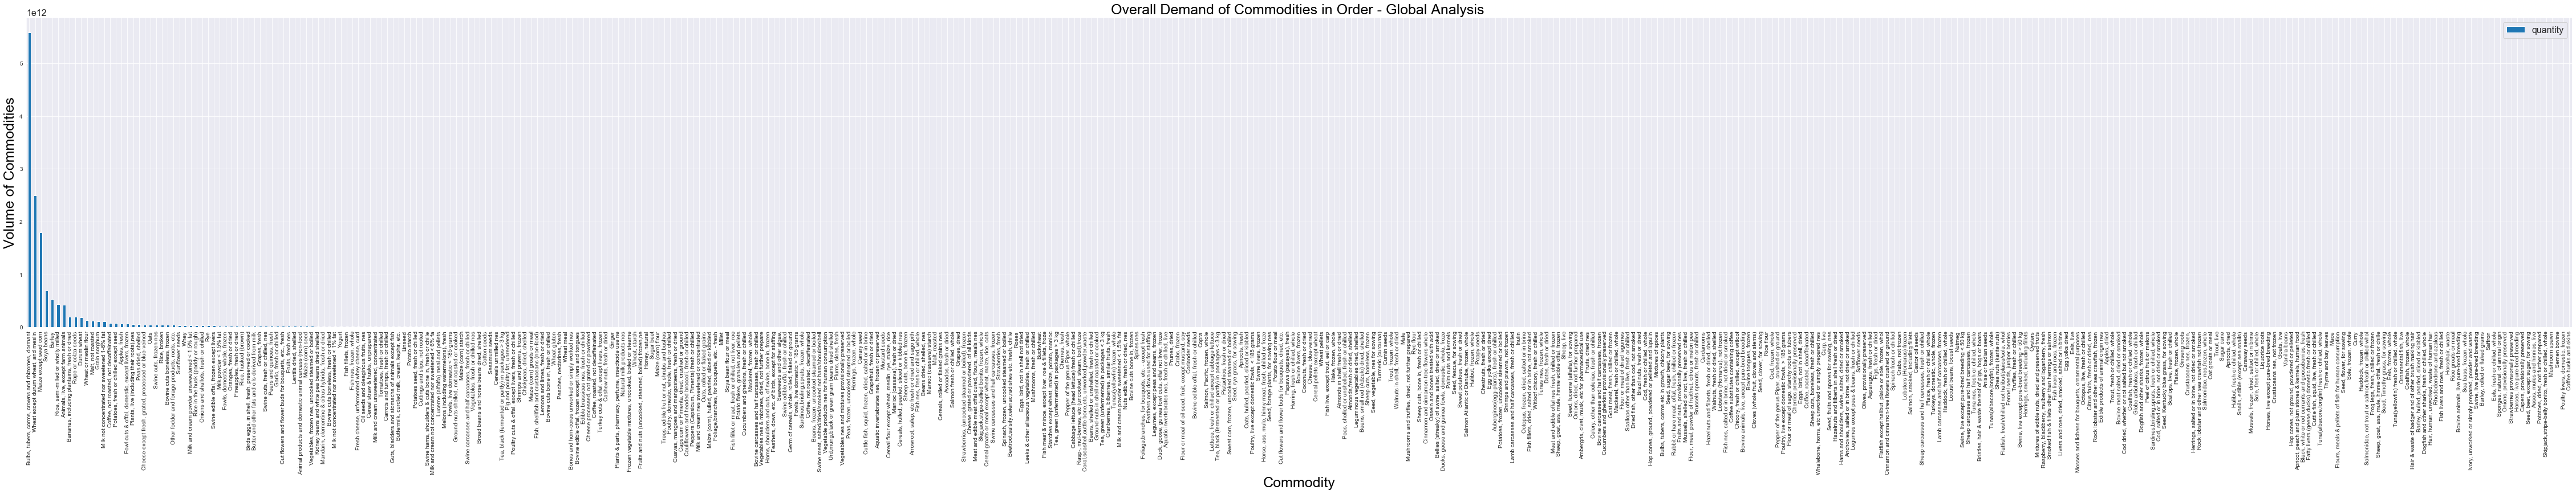

commodity       quantity
0    Bulbs, tubers, corms, crowns and rhizomes, dor...  5585611595114
1                 Wheat except durum wheat, and meslin  2493736720924
2                               Maize except seed corn  1797872216764
3                                           Soya beans   696100166806
4                                               Barley   531086844351
..                                                 ...            ...
436  Skipjack,stripe-belly bonito, fresh or chilled...        1671108
437                                     Mushroom spawn         108703
438                                       Semen bovine          74908
439                   Poultry livers, domestic, frozen          52980
440                             Coffee husks and skins          33431

[441 rows x 2 columns]

In [126]:
# 19. Overall Demand of Commodities in Order - Global Volume Analysis

df_exp_commdemand = df_exportsnew.groupby(["commodity"])['quantity'].sum().sort_values(ascending=False).reset_index()
#print(df_commdemand)
f,ax=plt.subplots(figsize=(80,10))
df_exp_commdemand.plot(x='commodity',y='quantity',kind='bar',ax=ax)
kwargs={'fontsize':25,'color':'black'}
kg={'length':3,'width':1,'color':'black','labelsize':10}
plt.xlabel("Commodity",**kwargs)
plt.ylabel("Volume of Commodities",**kwargs)
ax.tick_params(**kg)
plt.title("Overall Demand of Commodities in Order - Global Analysis ",**kwargs)
plt.show()
df_exp_commdemand

Analysis:
This analysis shows commodities that are highest exports in trading USD globally. The highest trading commodity on exports is "Wheat except durum wheat, and meslin". "Wheat except durum wheat, and meslin" contributes to 8.39% of global exports and "Maize except seed corn" contributes to 5.23% of global exports.

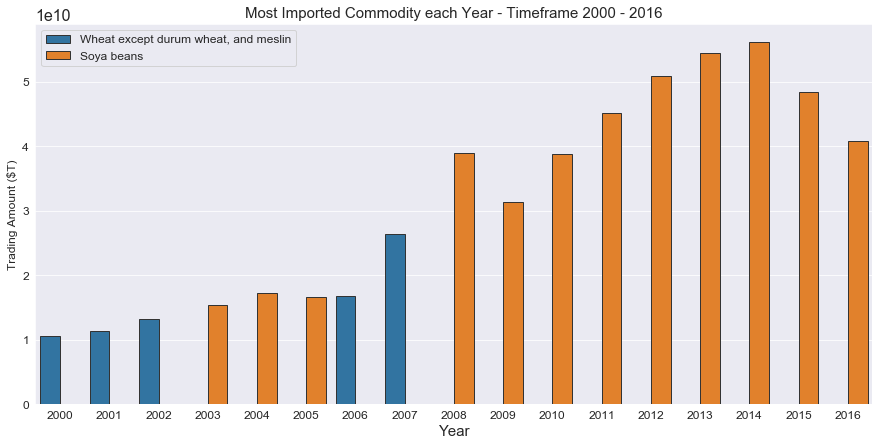

In [64]:
# 24. Most Imported Commodity each Year

df_importsmaxyr = df_importsnew.groupby(['year','commodity'])['trade_usd'].sum().reset_index()
#print(df_importsmaxyr)
df_importsmaxtradeyr=df_importsmaxyr.loc[df_importsmaxyr.groupby(['year'])['trade_usd'].idxmax()]
#print(df_importsmaxtradeyr)

f,ax=plt.subplots(figsize=(15,7))
sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_importsmaxtradeyr, ax=ax, edgecolor=".2")
plt.title('Most Imported Commodity each Year - Timeframe 2000 - 2016',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Trading Amount ($T)',fontsize=12)
kg={'length':3, 'width':1, 'color':'black','labelsize':12}
ax.tick_params(**kg)
plt.legend(loc='upper left', fontsize=12)

Analysis:
The analysis shows the most imported commodity each year for the reference period 2000 - 2016. The commodity that majorly contributes to the highest trading USD import every year is "Soya Beans" which explains why this commodity is the highest is import trading returns overall

In [ ]:
# 25. Most Exported Commodity each Year

df_exportsmaxyr = df_exportsnew.groupby(['year','commodity'])['trade_usd'].sum().reset_index()
#print(df_exportsmaxyr)
df_exportsmaxtradeyr=df_exportsmaxyr.loc[df_exportsmaxyr.groupby(['year'])['trade_usd'].idxmax()]
#print(df_exportsmaxtradeyr)

f,ax=plt.subplots(figsize=(15,7))
sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_exportsmaxtradeyr, ax=ax, edgecolor=".2")
plt.title('Most Exported Commodity each Year - Timeframe 2000 - 2016',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Trading Amount ($T)',fontsize=12)
kg={'length':3, 'width':1, 'color':'black','labelsize':12}
ax.tick_params(**kg)
plt.legend(loc='upper left', fontsize=12)

Analysis: The analysis shows the most exported commodity each year for the reference period 2000 - 2016. The commodity that majorly contributes to the highest trading USD export every year is "Wheat except durum wheat, and meslin" which explains why this commodity is the highest is export trading returns overall

In [ ]:
# 26. Commodities Imported Most per year for Top 10 Importers

top10_ctry_imp_list = ['China','Germany','Japan','France','Italy','Belgium','Canada','Hong Kong','Netherlands','USA']
df_imp_top10=df_importsnew.groupby(['country_or_area','year','commodity'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
#print(df_exp_top10) 
df_imp_top10_idxmax=df_imp_top10.loc[df_imp_top10.groupby(['country_or_area','year'])['trade_usd'].idxmax()]
#print(df_exp_top10_idxmax)

for r in top10_ctry_imp_list:
    df_imp_top10_idxmax_loop=df_imp_top10_idxmax[df_imp_top10_idxmax['country_or_area']==r]
        
    f,ax=plt.subplots(figsize=(15,10))
    sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_imp_top10_idxmax_loop, ax=ax, edgecolor=".2")
    ax.set_title('Commodities Imported Most per year for Top 10 Importers' + " - " + r ,fontsize=20)
    
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 15}
    ax.tick_params(**kwargs)
    x_axis=ax.axes.get_xaxis().set_visible(True)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('Trading Amount ($T)',fontsize=20)
    kg={'length':3, 'width':100, 'color':'black','labelsize':15}
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    plt.legend(loc='upper left',fontsize=20)


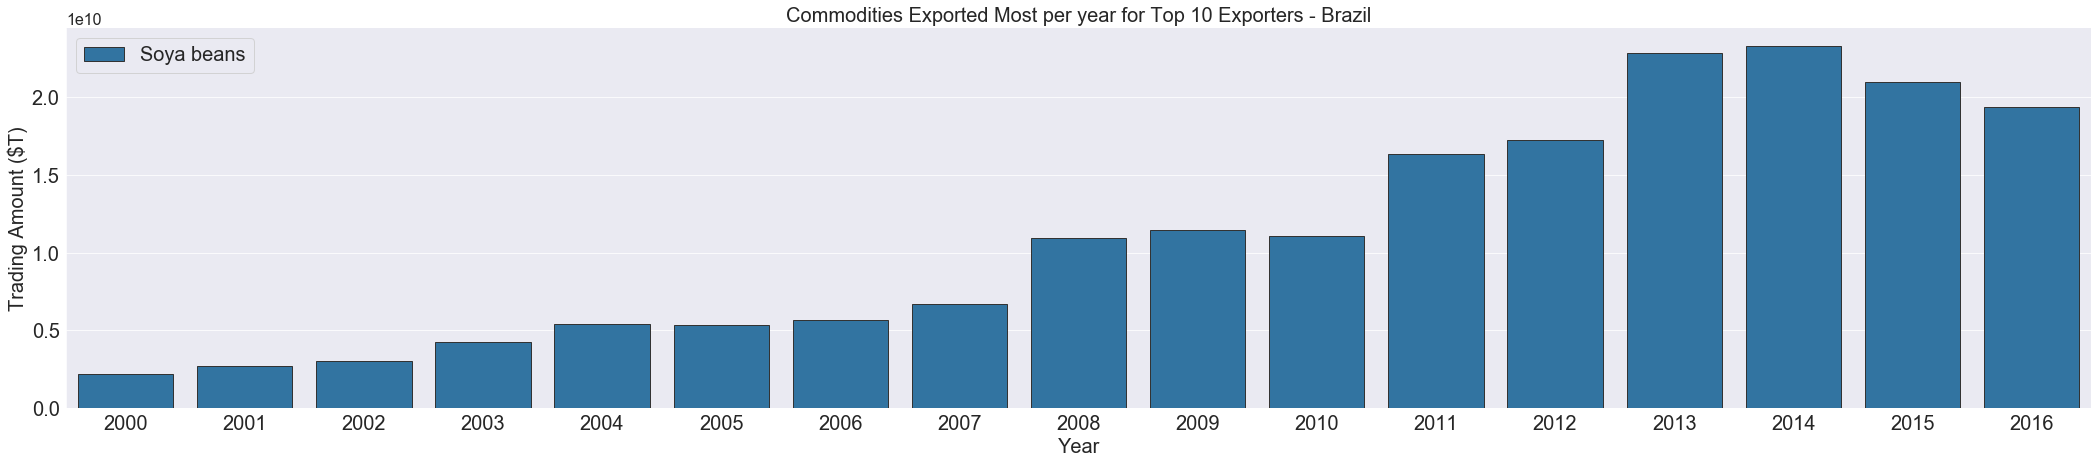

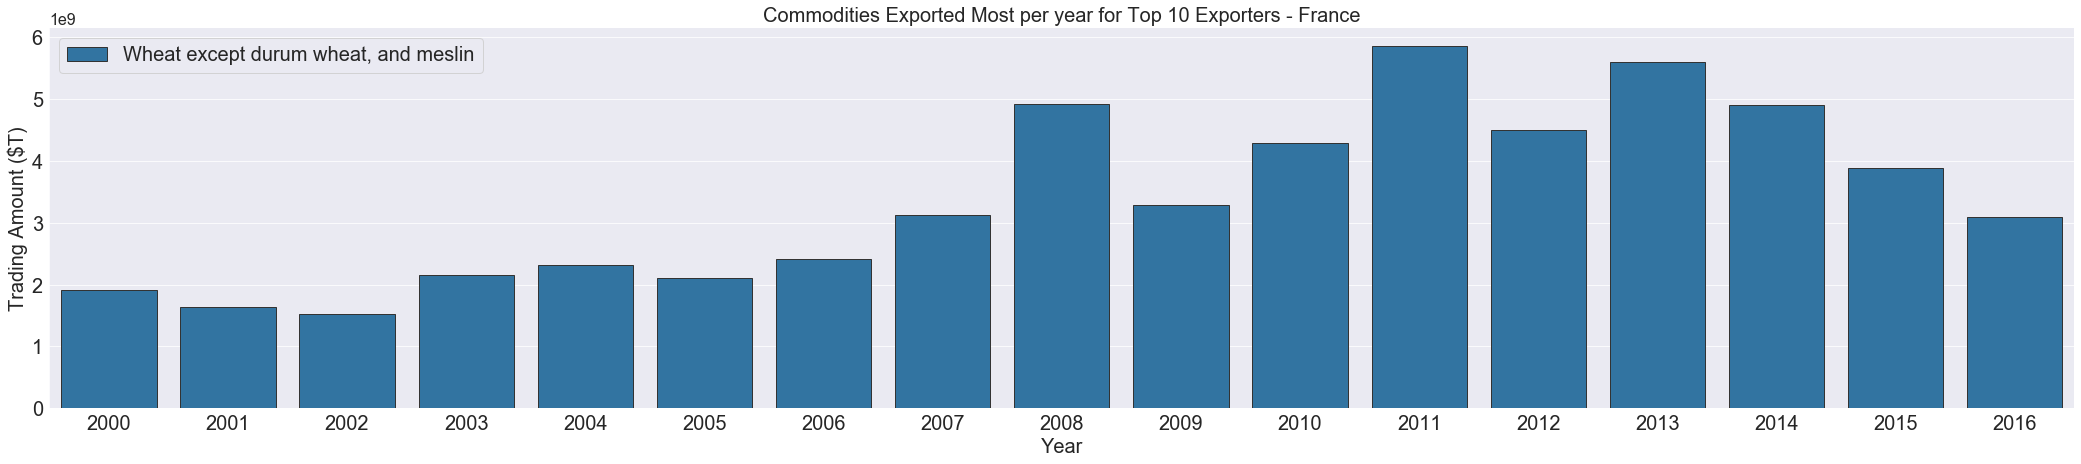

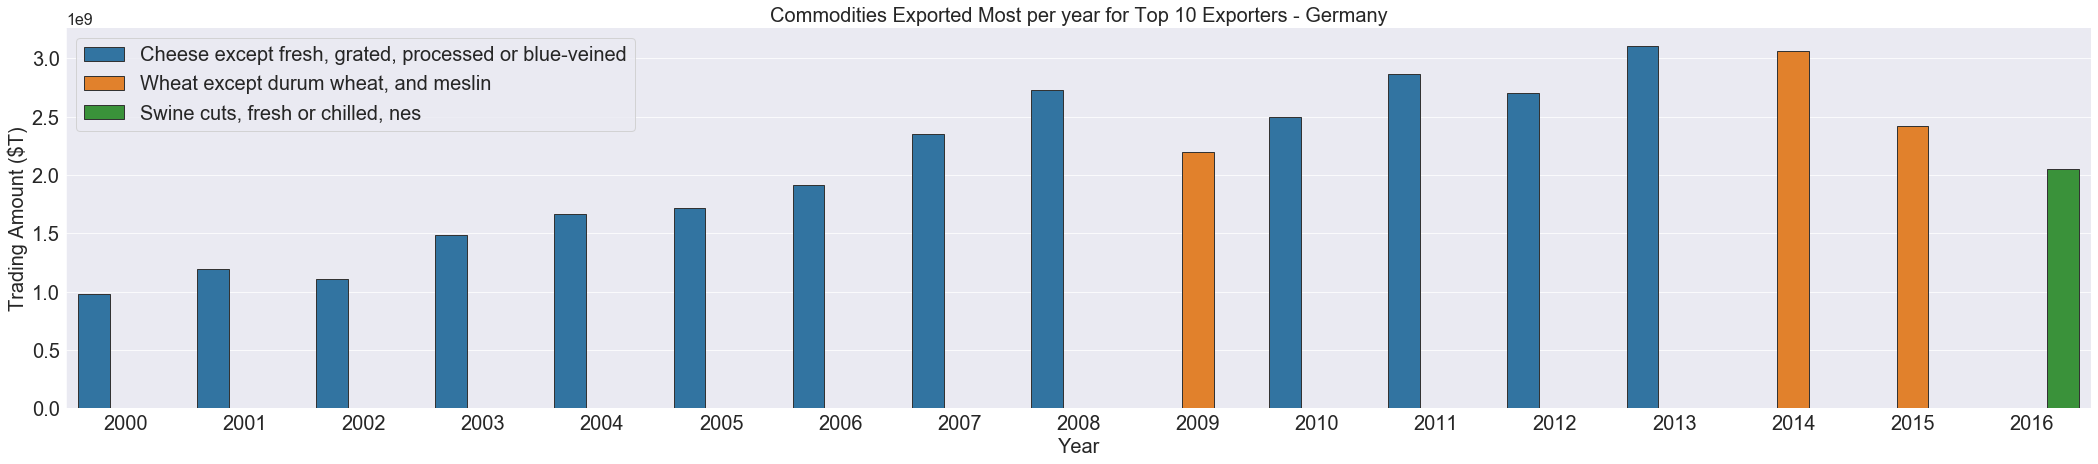

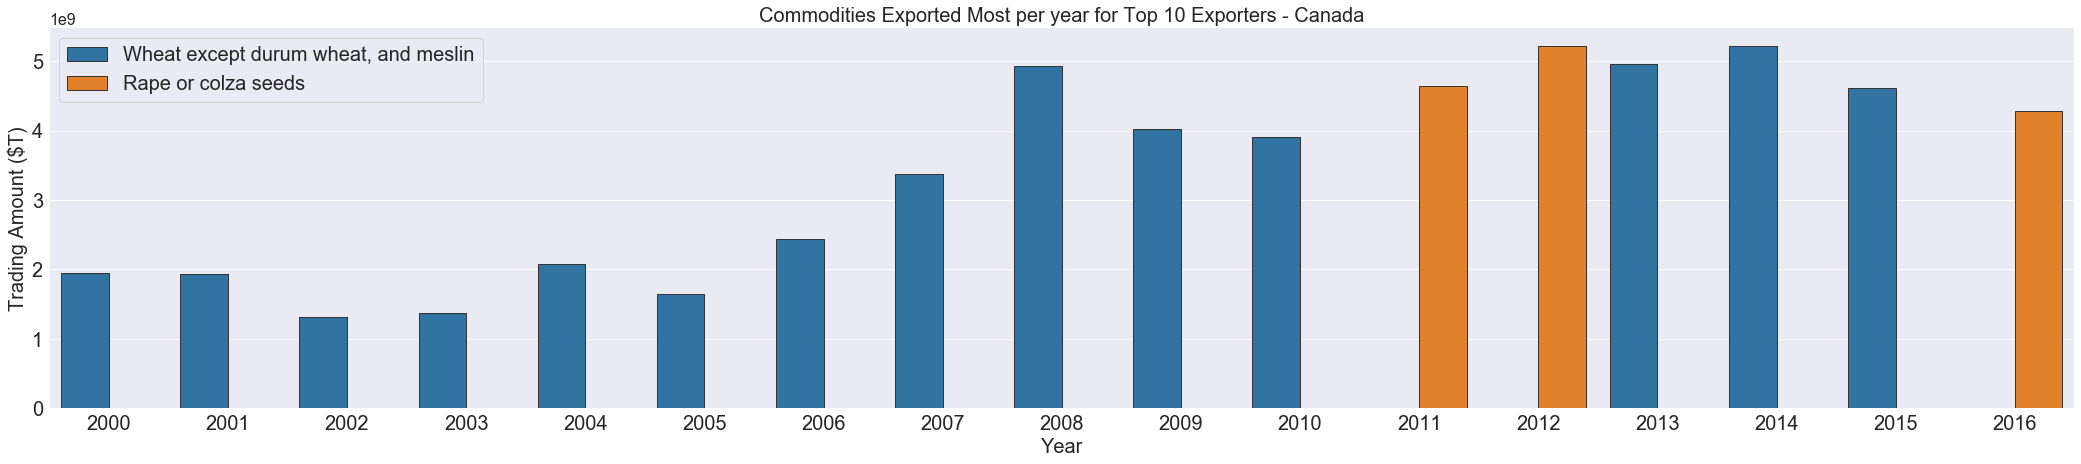

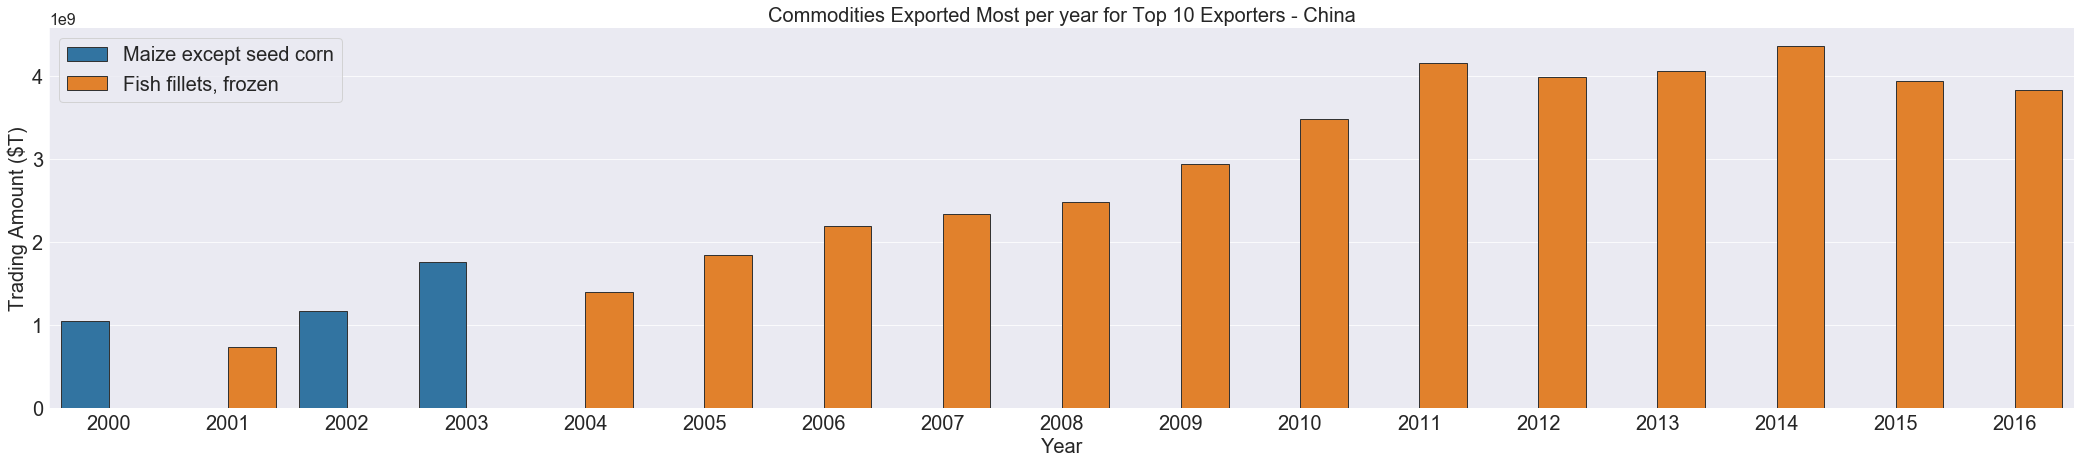

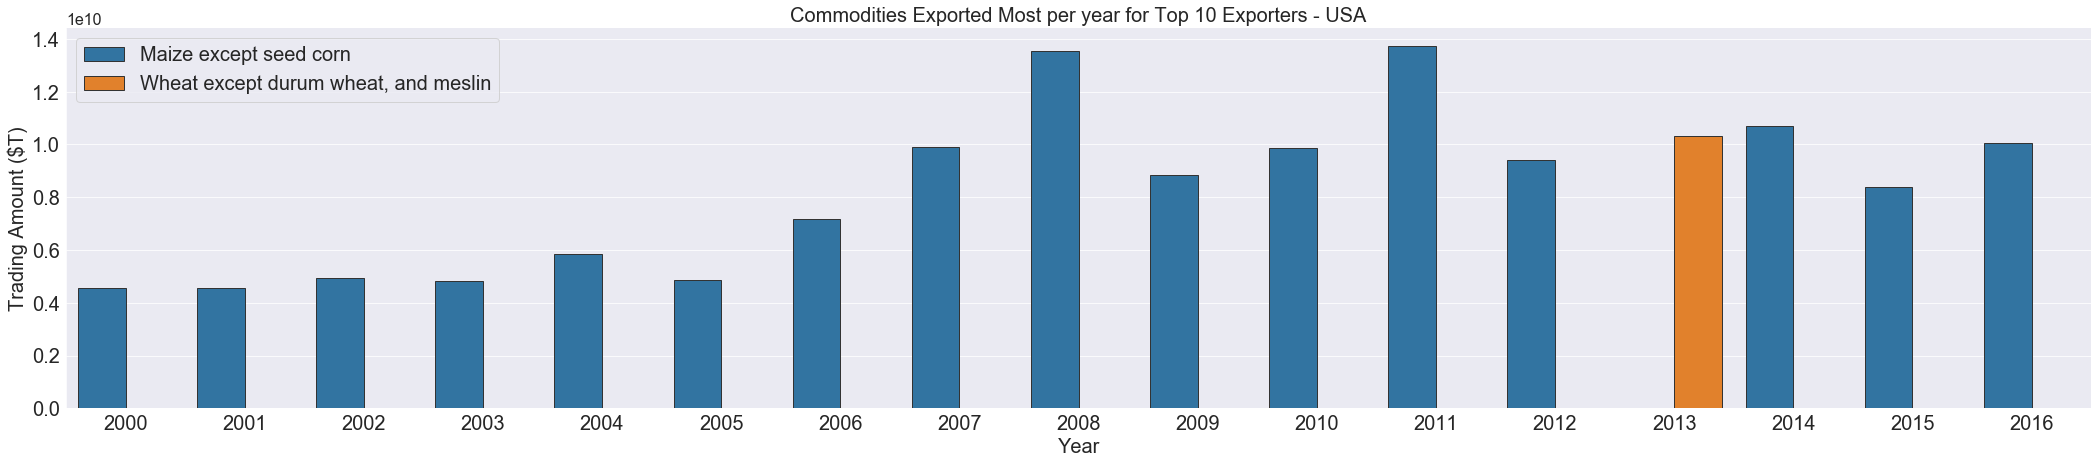

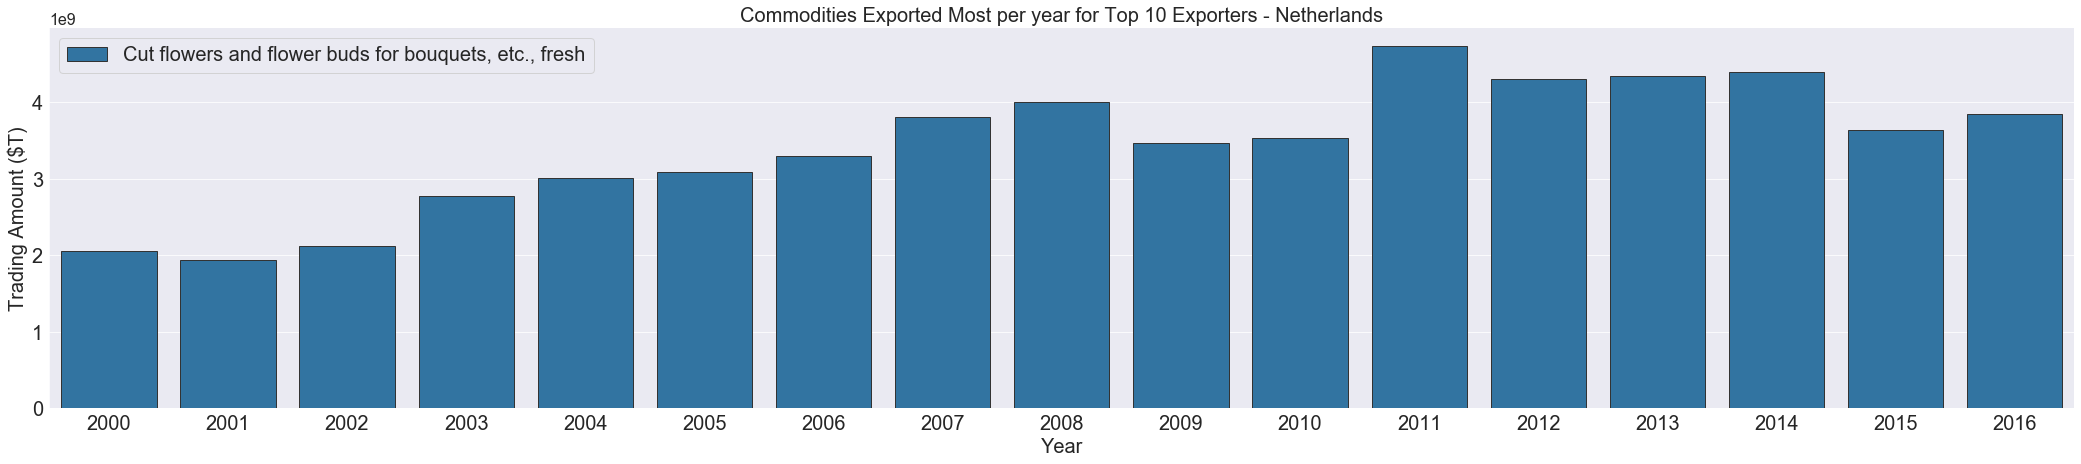

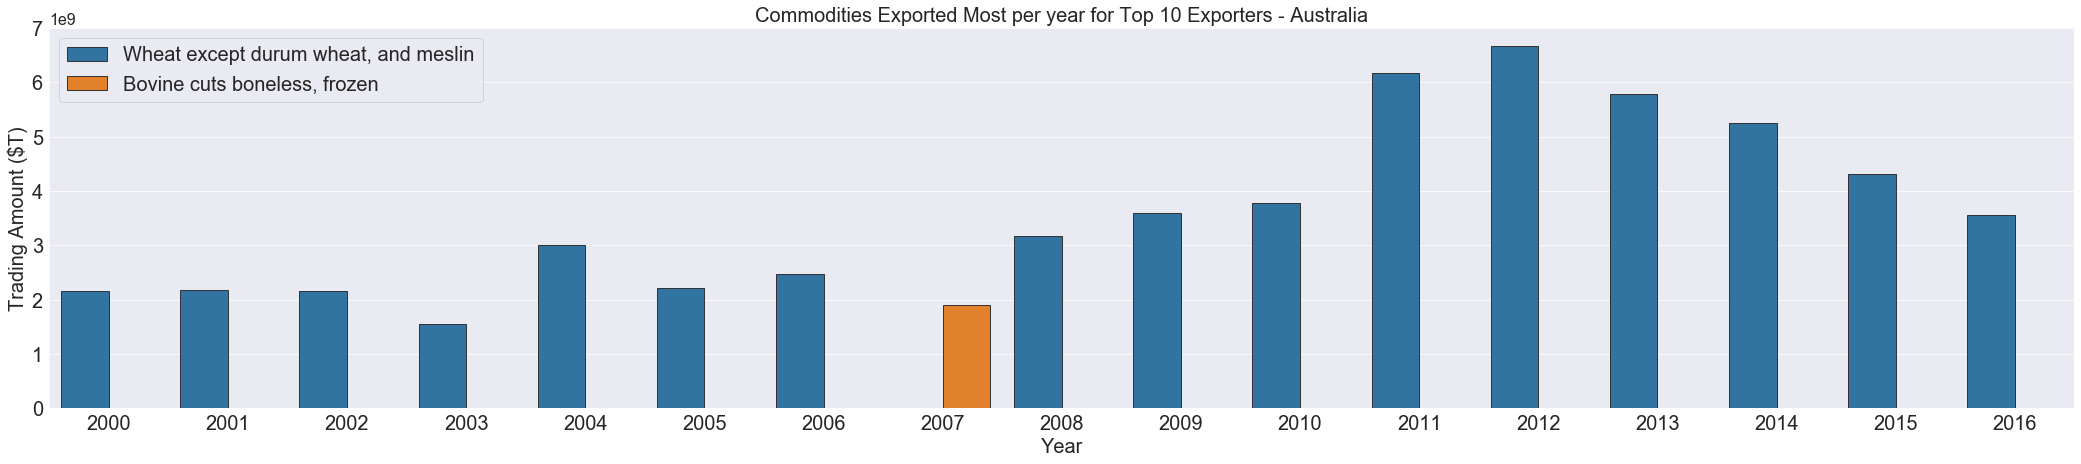

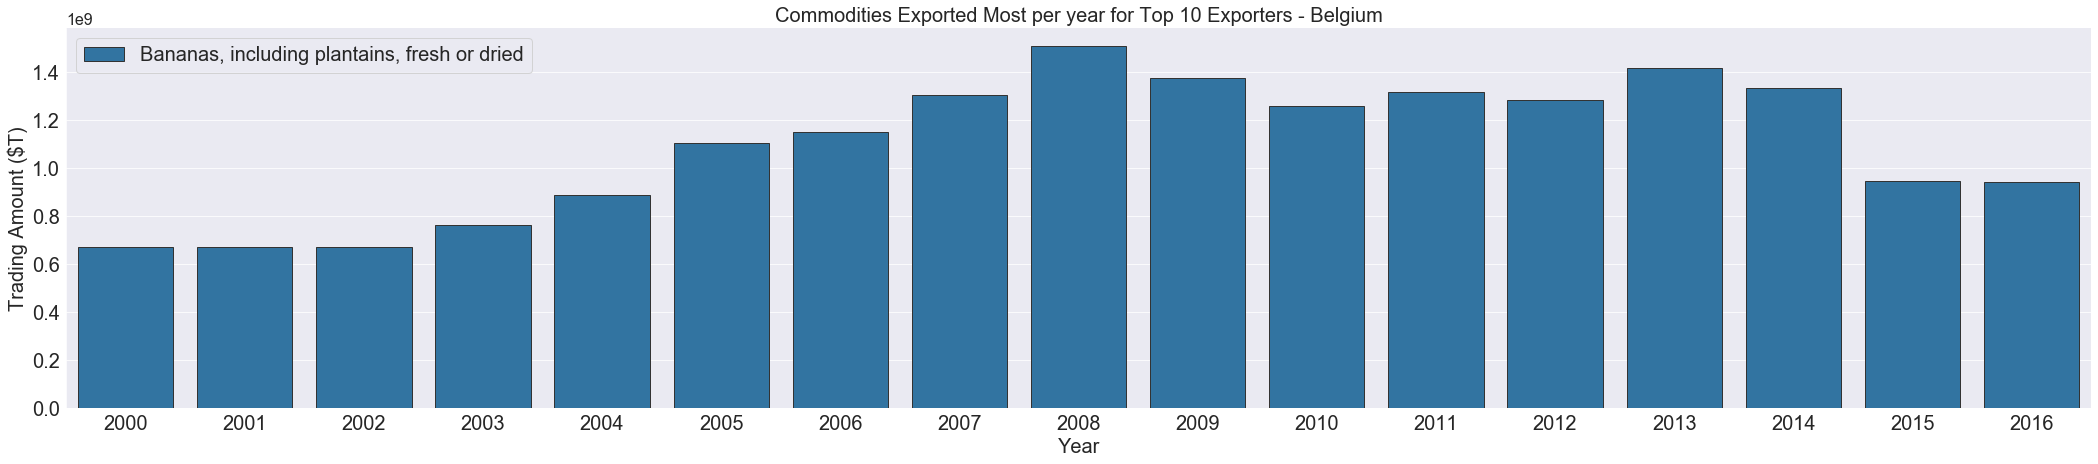

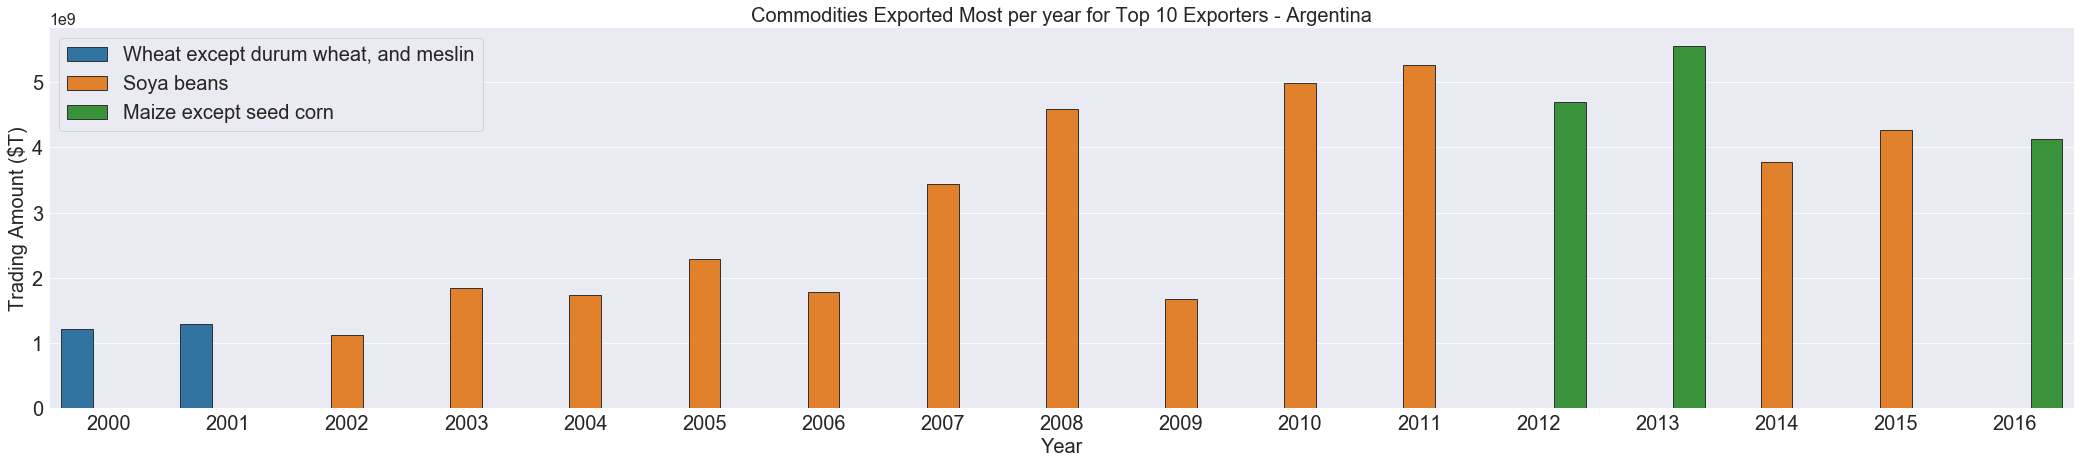

In [102]:
# 27. Commodities Exported Most per year by Top 10 Exporters

top10_ctry_exp_list = ['Brazil','France','Germany','Canada','China','USA','Netherlands','Australia','Belgium','Argentina']
df_exp_top10=df_exportsnew.groupby(['country_or_area','year','commodity'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
#print(df_exp_top10) 
df_exp_top10_idxmax=df_exp_top10.loc[df_exp_top10.groupby(['country_or_area','year'])['trade_usd'].idxmax()]
#print(df_exp_top10_idxmax)

for q in top10_ctry_exp_list:
    df_exp_top10_idxmax_loop=df_exp_top10_idxmax[df_exp_top10_idxmax['country_or_area']==q]
        
    f,ax=plt.subplots(figsize=(15,7))
    sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_exp_top10_idxmax_loop, ax=ax, edgecolor=".2")
    ax.set_title('Commodities Exported Most per year for Top 10 Exporters' + " - " + q ,fontsize=20)
    
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 20}
    ax.tick_params(**kwargs)
    x_axis=ax.axes.get_xaxis().set_visible(True)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('Trading Amount ($T)',fontsize=20)
    kg={'length':3, 'width':100, 'color':'black','labelsize':20}
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    plt.legend(loc='upper left',fontsize=20)



In [ ]:
# 28. Commodities Imported Most per year by Top 10 Developed Country

df_datadeveloped=df_developed_countries_imports.groupby(['country_or_area','year','commodity'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
#print(df_datadeveloped) 
df_importsmaxtradeyr=df_datadeveloped.loc[df_datadeveloped.groupby(['country_or_area','year'])['trade_usd'].idxmax()]
#print(df_importsmaxtradeyr)

for l in developed_countries:
    df_datadevelopedctry=df_importsmaxtradeyr[df_importsmaxtradeyr['country_or_area']==l]
        
    f,ax=plt.subplots(figsize=(15,10))
    sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_datadevelopedctry, ax=ax, edgecolor=".2")
    ax.set_title('Commodities Imported Most per year for Developed Countries' + " - " + l ,fontsize=20)
    
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 15}
    ax.tick_params(**kwargs)
    x_axis=ax.axes.get_xaxis().set_visible(True)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('Trading Amount ($T)',fontsize=20)
    kg={'length':3, 'width':100, 'color':'black','labelsize':15}
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    plt.legend(loc='upper left',fontsize=20)


Analysis:
The analysis shows the commodity highly imported each year for each of the top 10 developed countries in the world. The commodities in high trading demand for developed countries are:

Plants, live(including their roots),nes
Cut flowers and flower buds for bouquets, etc., fresh
Wheat except durum wheat, and meslin
Milk

In [ ]:
# 29. Commodities Exported Most per year by Top 10 Developed Country

df_datadevelopedexp=df_developed_countries_exports.groupby(['country_or_area','year','commodity'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
#print(df_datadevelopedexp) 
df_exportsmaxtradeyr=df_datadevelopedexp.loc[df_datadevelopedexp.groupby(['country_or_area','year'])['trade_usd'].idxmax()]
#print(df_exportsmaxtradeyr)

for l in developed_countries:
    df_datadevelopedctryexp=df_exportsmaxtradeyr[df_exportsmaxtradeyr['country_or_area']==l]
        
    f,ax=plt.subplots(figsize=(15,10))
    sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_datadevelopedctryexp, ax=ax, edgecolor=".2")
    ax.set_title('Commodities Imported Most per year for Developed Countries' + " - " + l ,fontsize=20)
    
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 15}
    ax.tick_params(**kwargs)
    x_axis=ax.axes.get_xaxis().set_visible(True)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('Trading Amount ($T)',fontsize=20)
    kg={'length':3, 'width':100, 'color':'black','labelsize':15}
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    plt.legend(loc='upper left',fontsize=20)


Analysis:
The analysis shows the commodity highly exported each year for each of the top 10 developed countries in the world. The commodities in high trading demand for developed countries are:

Cheese except fresh, grated, processed or blue-veined
Cut flowers and flower buds for bouquets, etc., fresh
Wheat except durum wheat, and meslin

In [ ]:
# 30. Commodities Imported Most per year for Least Developed Countries

df_dataundeveloped=df_underdeveloped_countries_imports.groupby(['country_or_area','year','commodity'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
#print(df_dataundeveloped)
df_underdeveloped_countries_idxmax=df_dataundeveloped.loc[df_dataundeveloped.groupby(['country_or_area','year'])['trade_usd'].idxmax()]
#print(df_underdeveloped_countries_idxmax) 

for l in underdeveloped_countries:
    df_underdevelopedctry=df_underdeveloped_countries_idxmax[df_underdeveloped_countries_idxmax['country_or_area']==l]
    
    f,ax=plt.subplots(figsize=(15,10))
    sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_underdevelopedctry, ax=ax, edgecolor=".2")
    ax.set_title('Commodities Imported for Under-Developed Countries' + " - " + l ,fontsize=20)
    
    kg={'length':3, 'width':1,'color':'black','labelsize':20}
    kwargs={'fontsize':20, 'color':'black'}
    plt.xlabel('Year',**kwargs)
    plt.ylabel('Amounts in $US(Trillions)',**kwargs)
    ax.tick_params(**kg)
    x_axis=ax.axes.get_xaxis().set_visible(True)
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    plt.legend(loc='upper left',fontsize=20)

Analysis:
The analysis shows the commodity highly imported each year for each of the top 10 under-developed countries in the world. The commodities in high trading demand for under-developed countries are:

Rice
Wheat
Maize

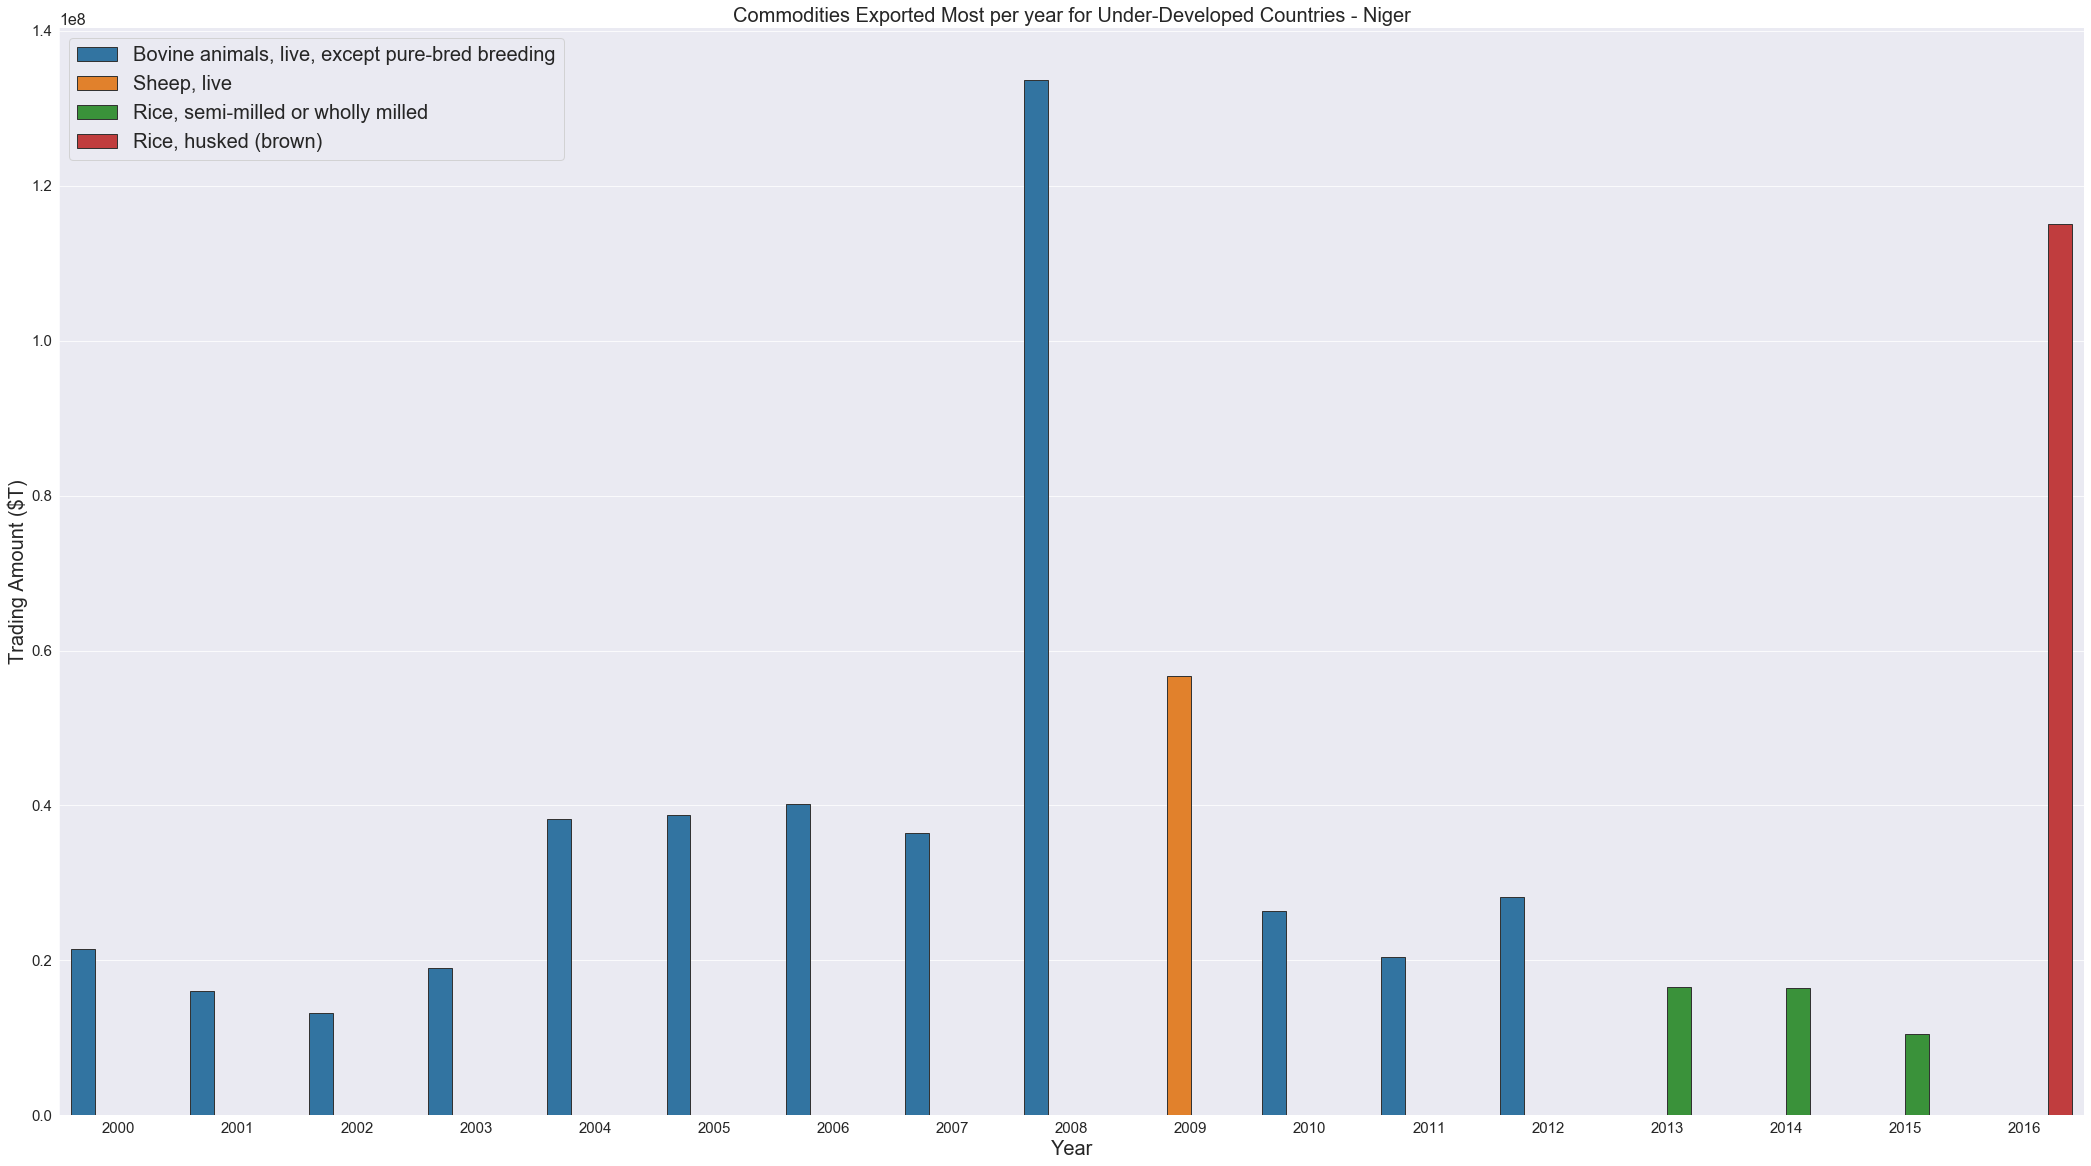

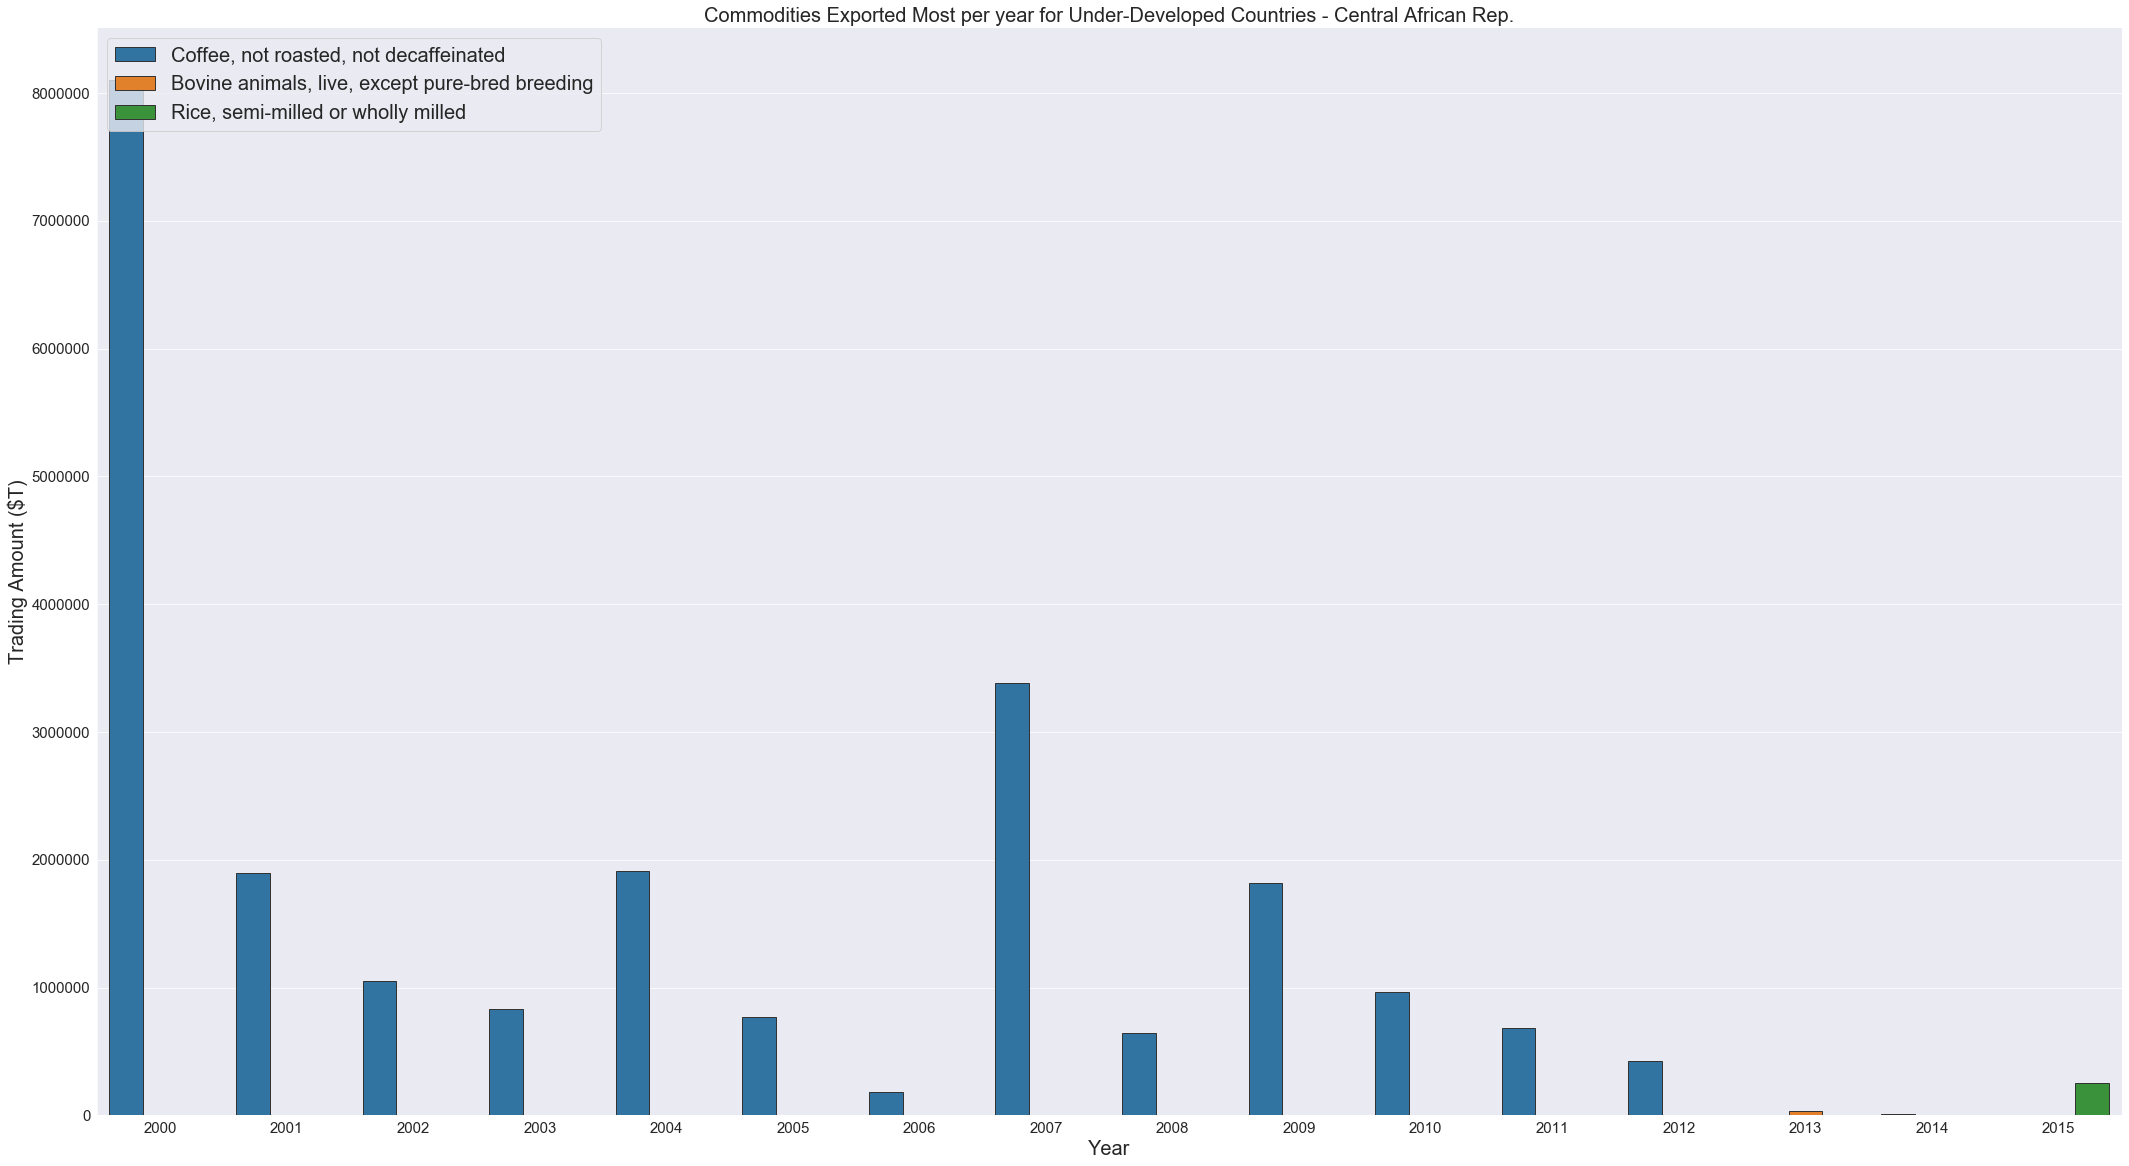

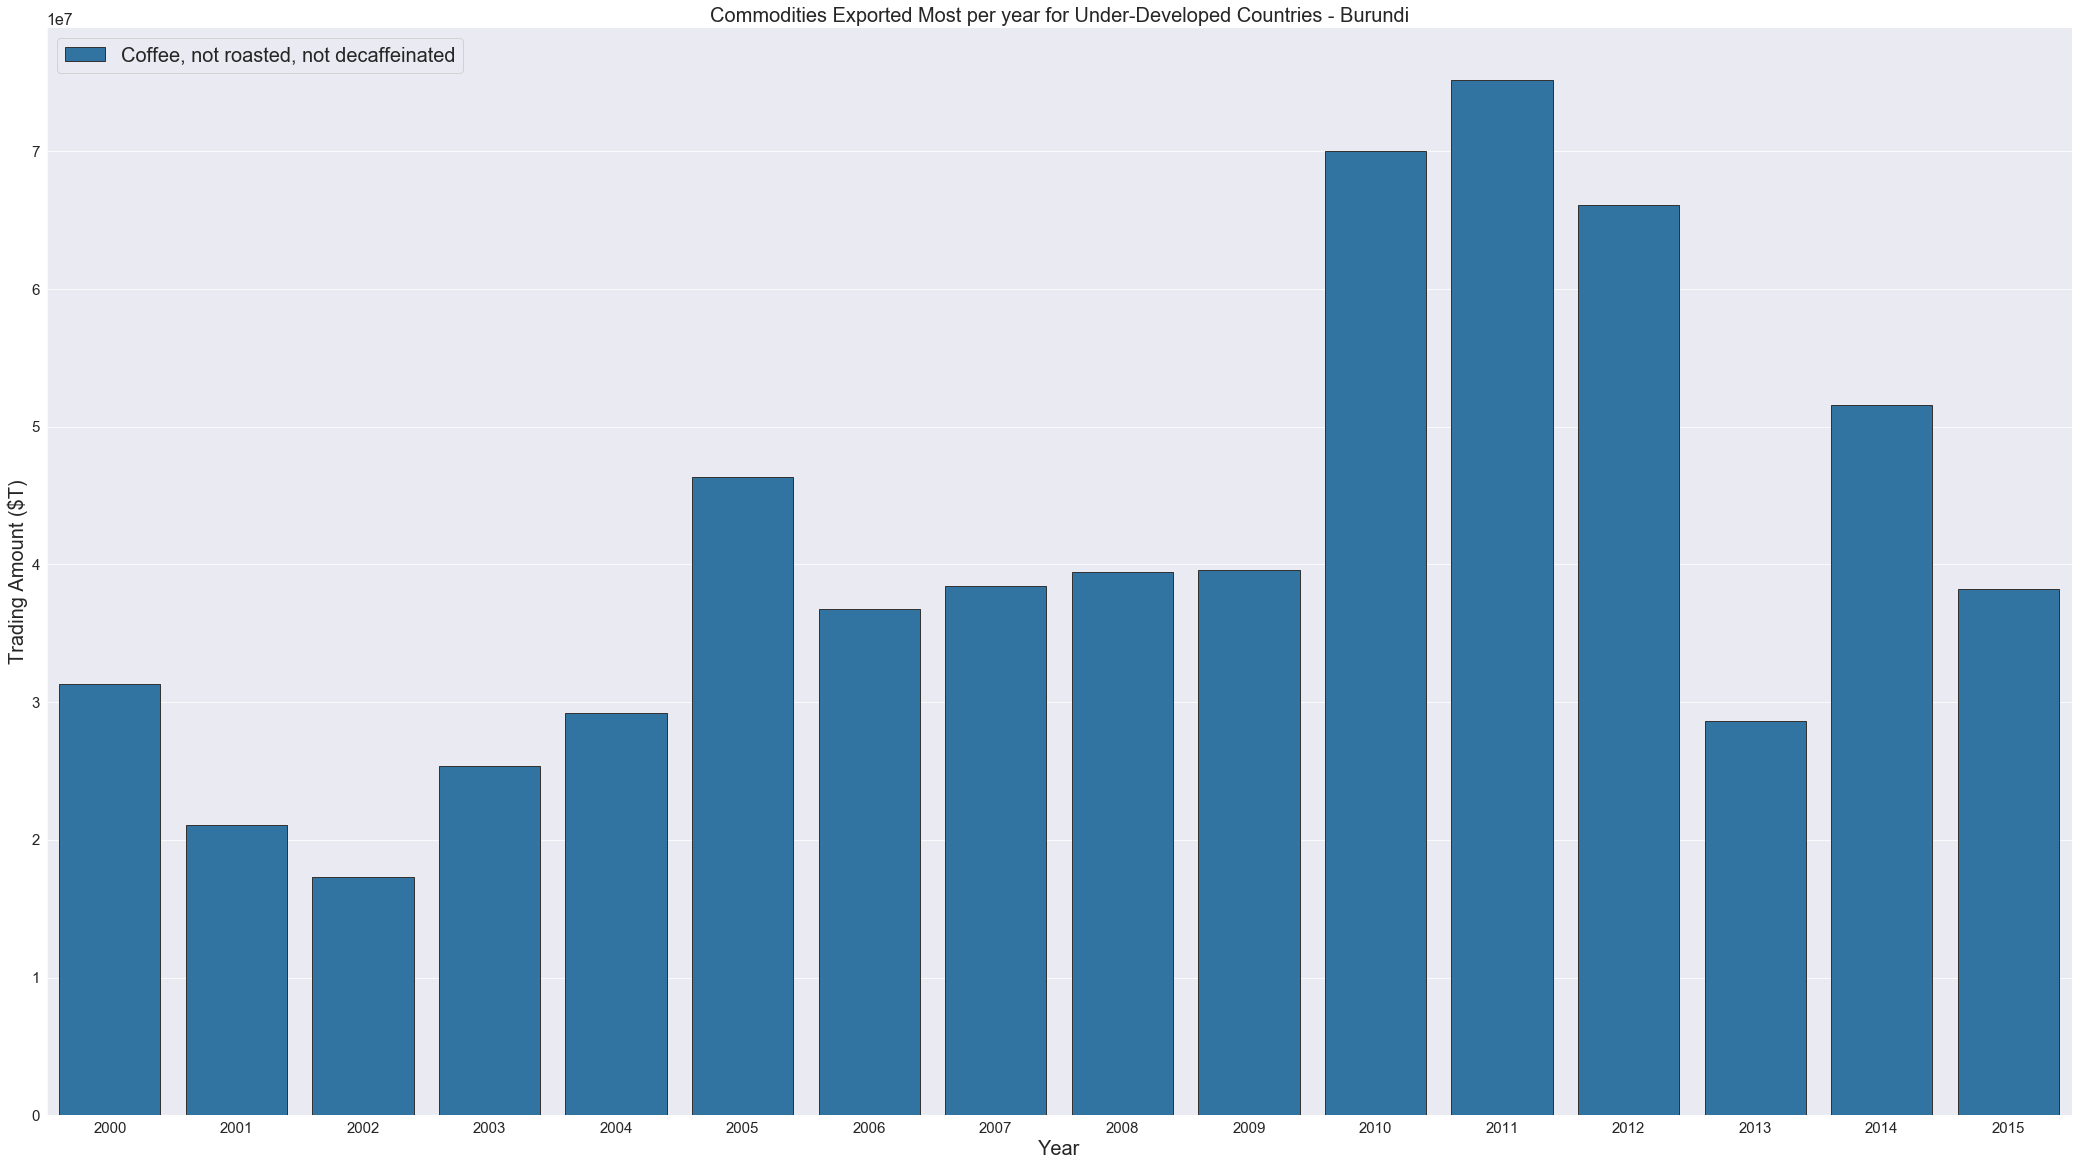

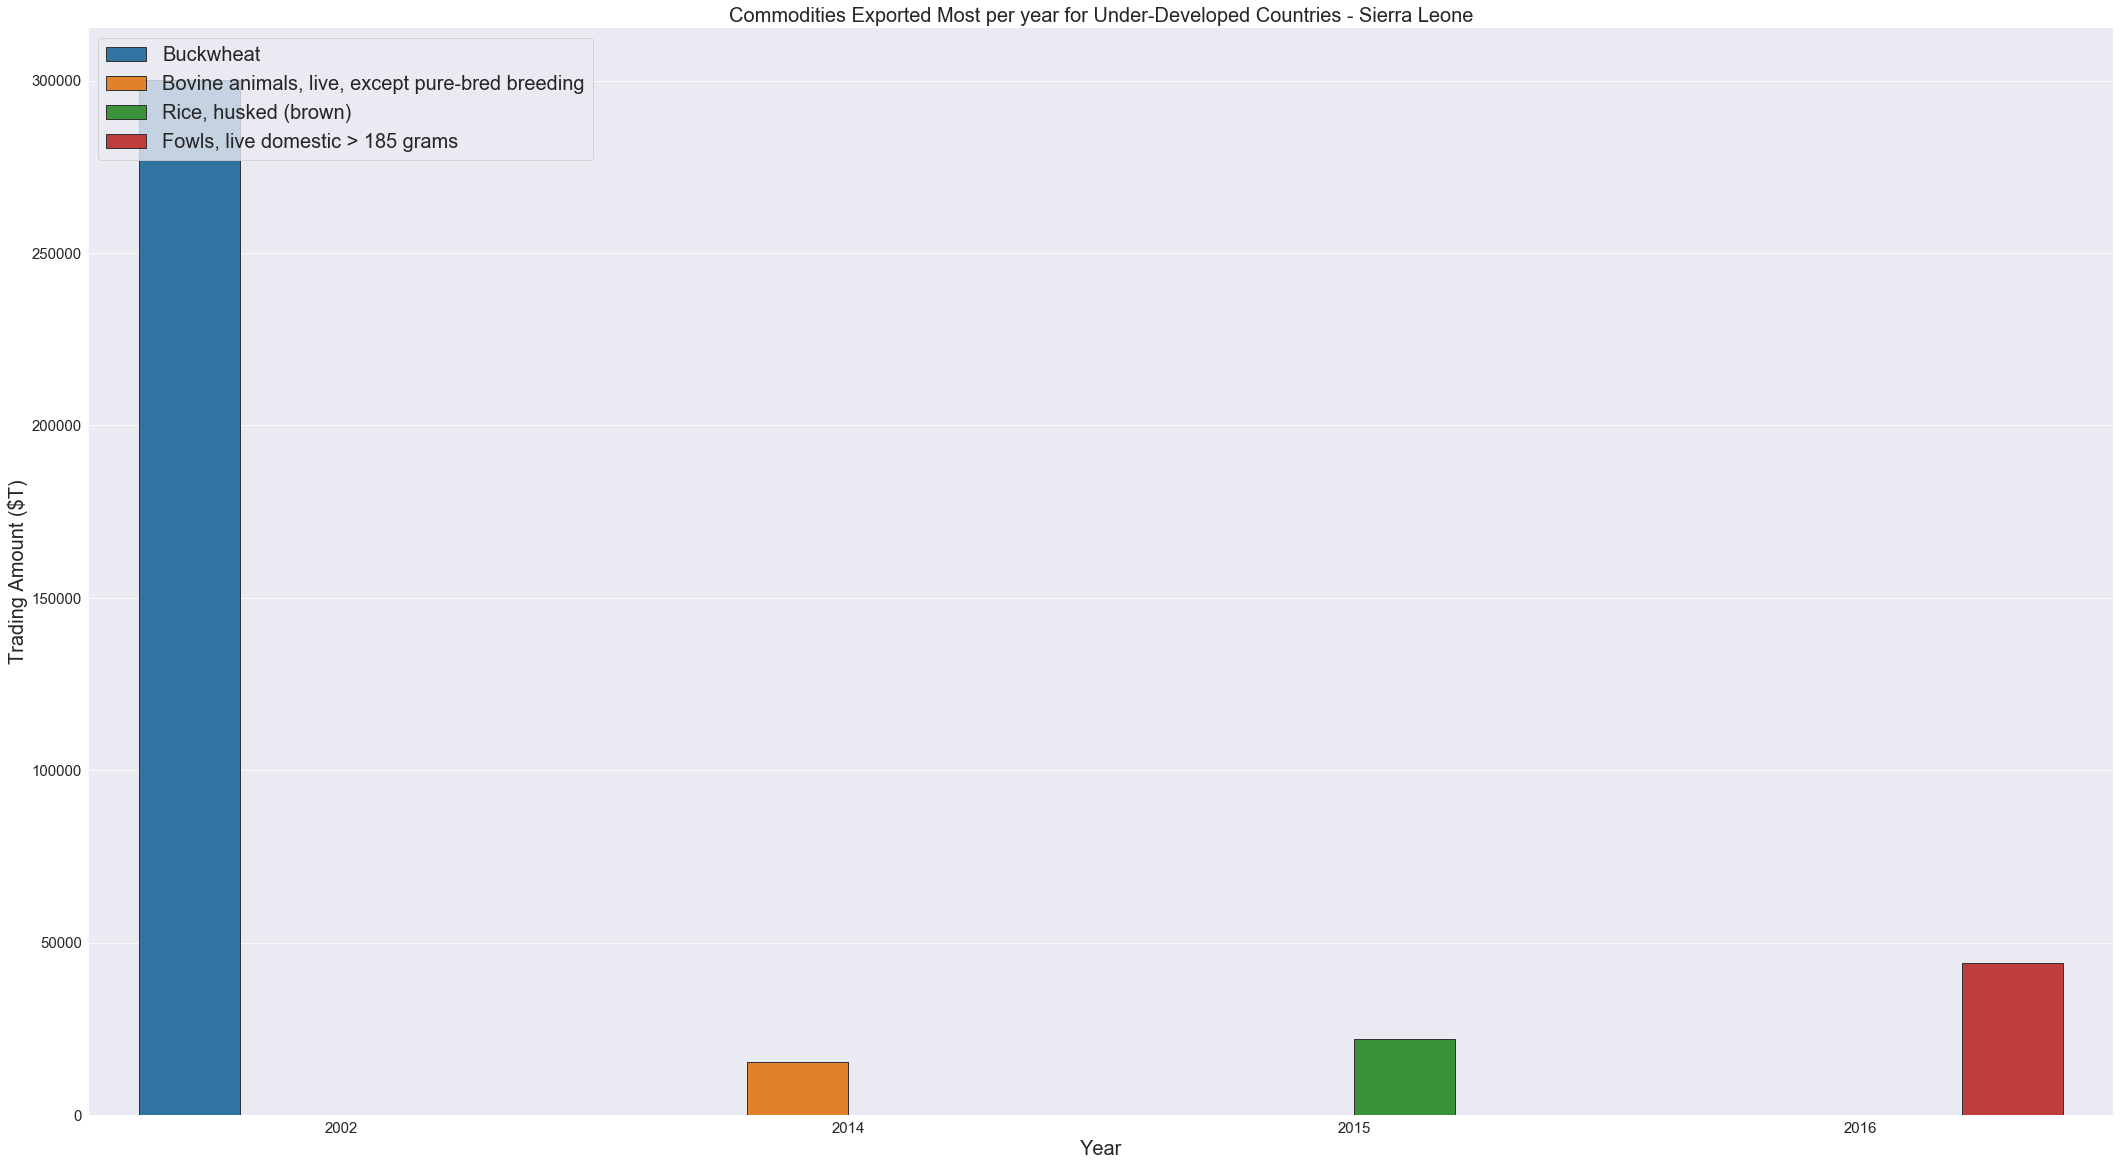

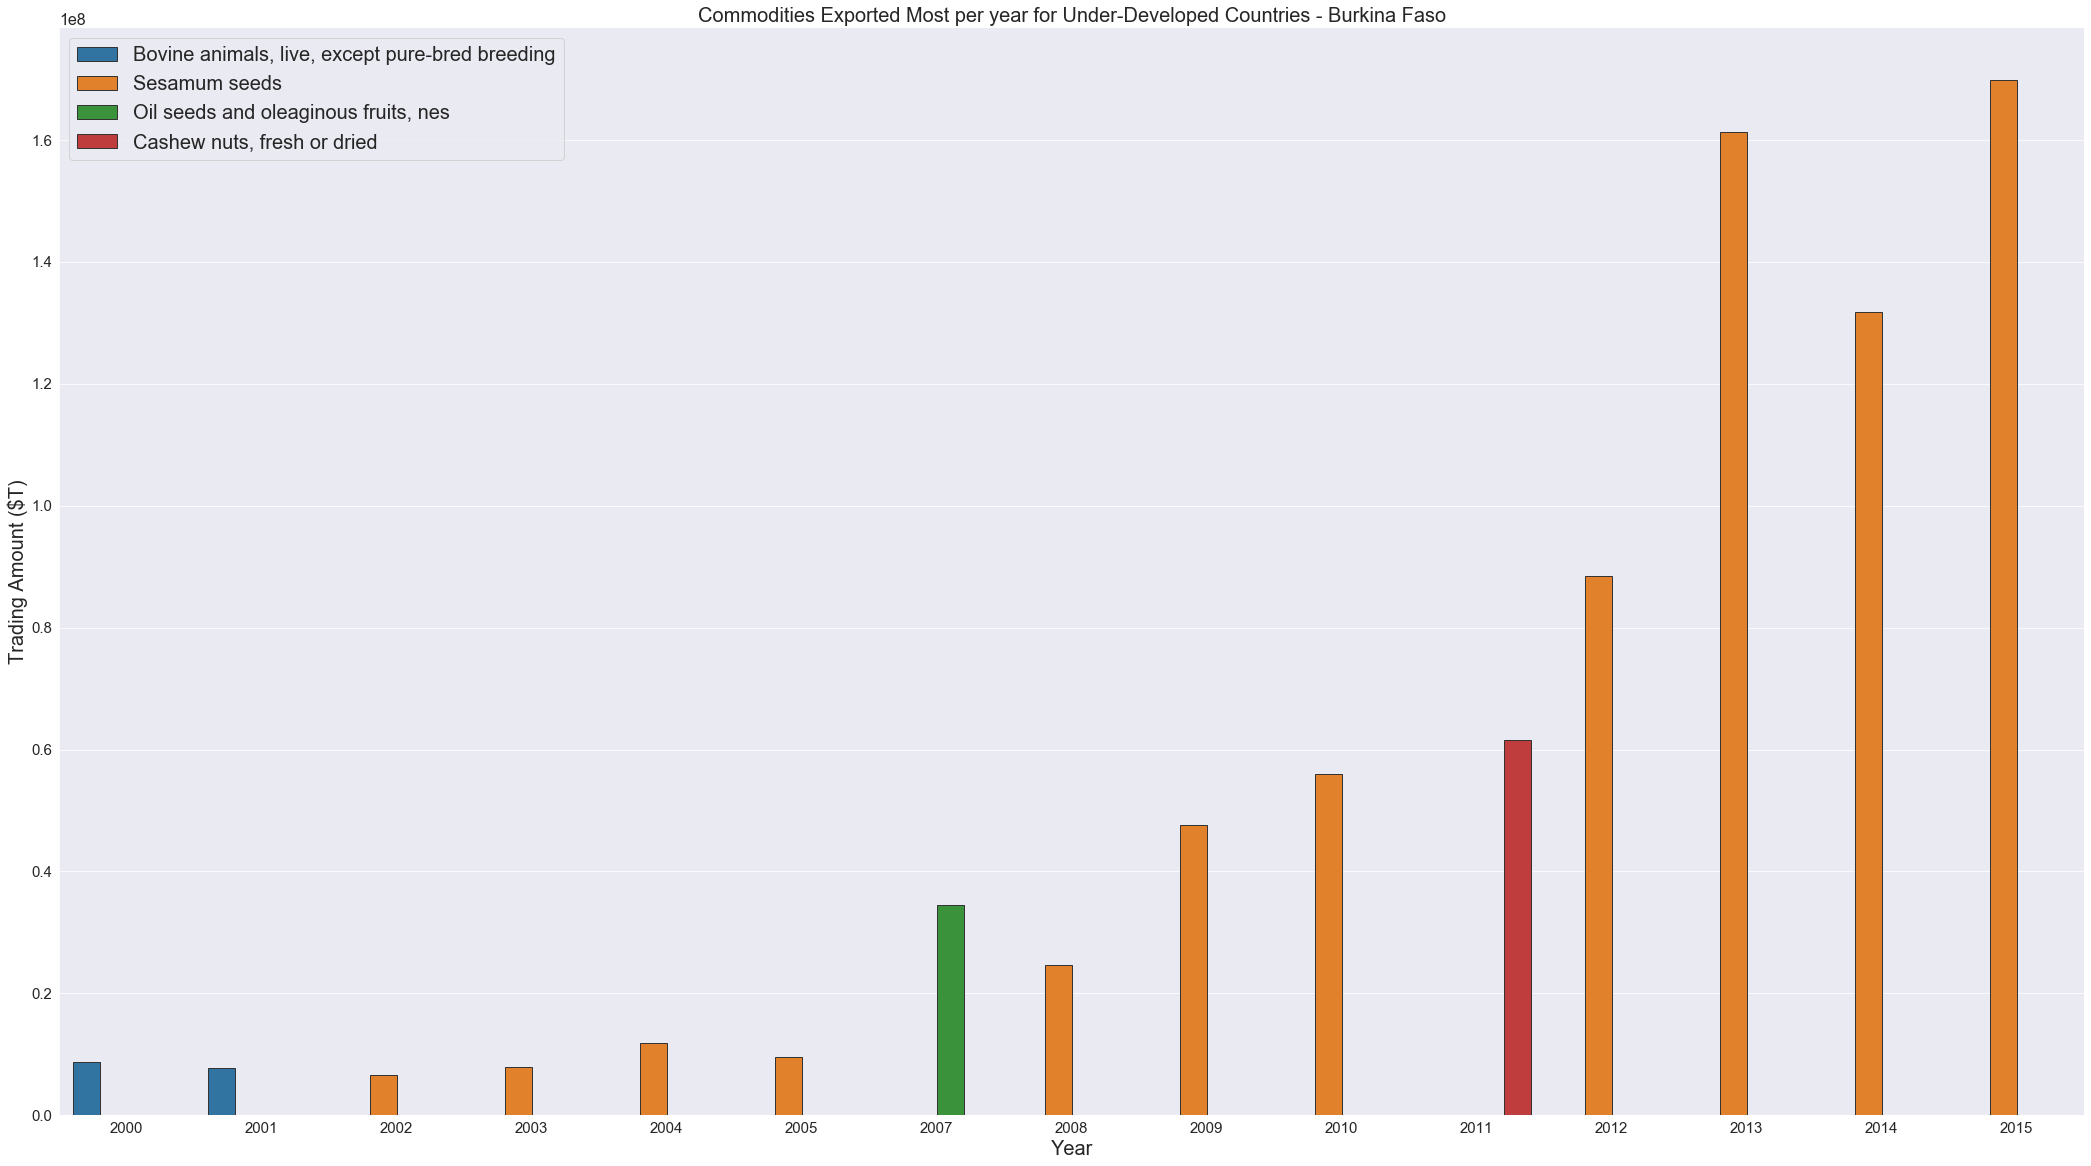

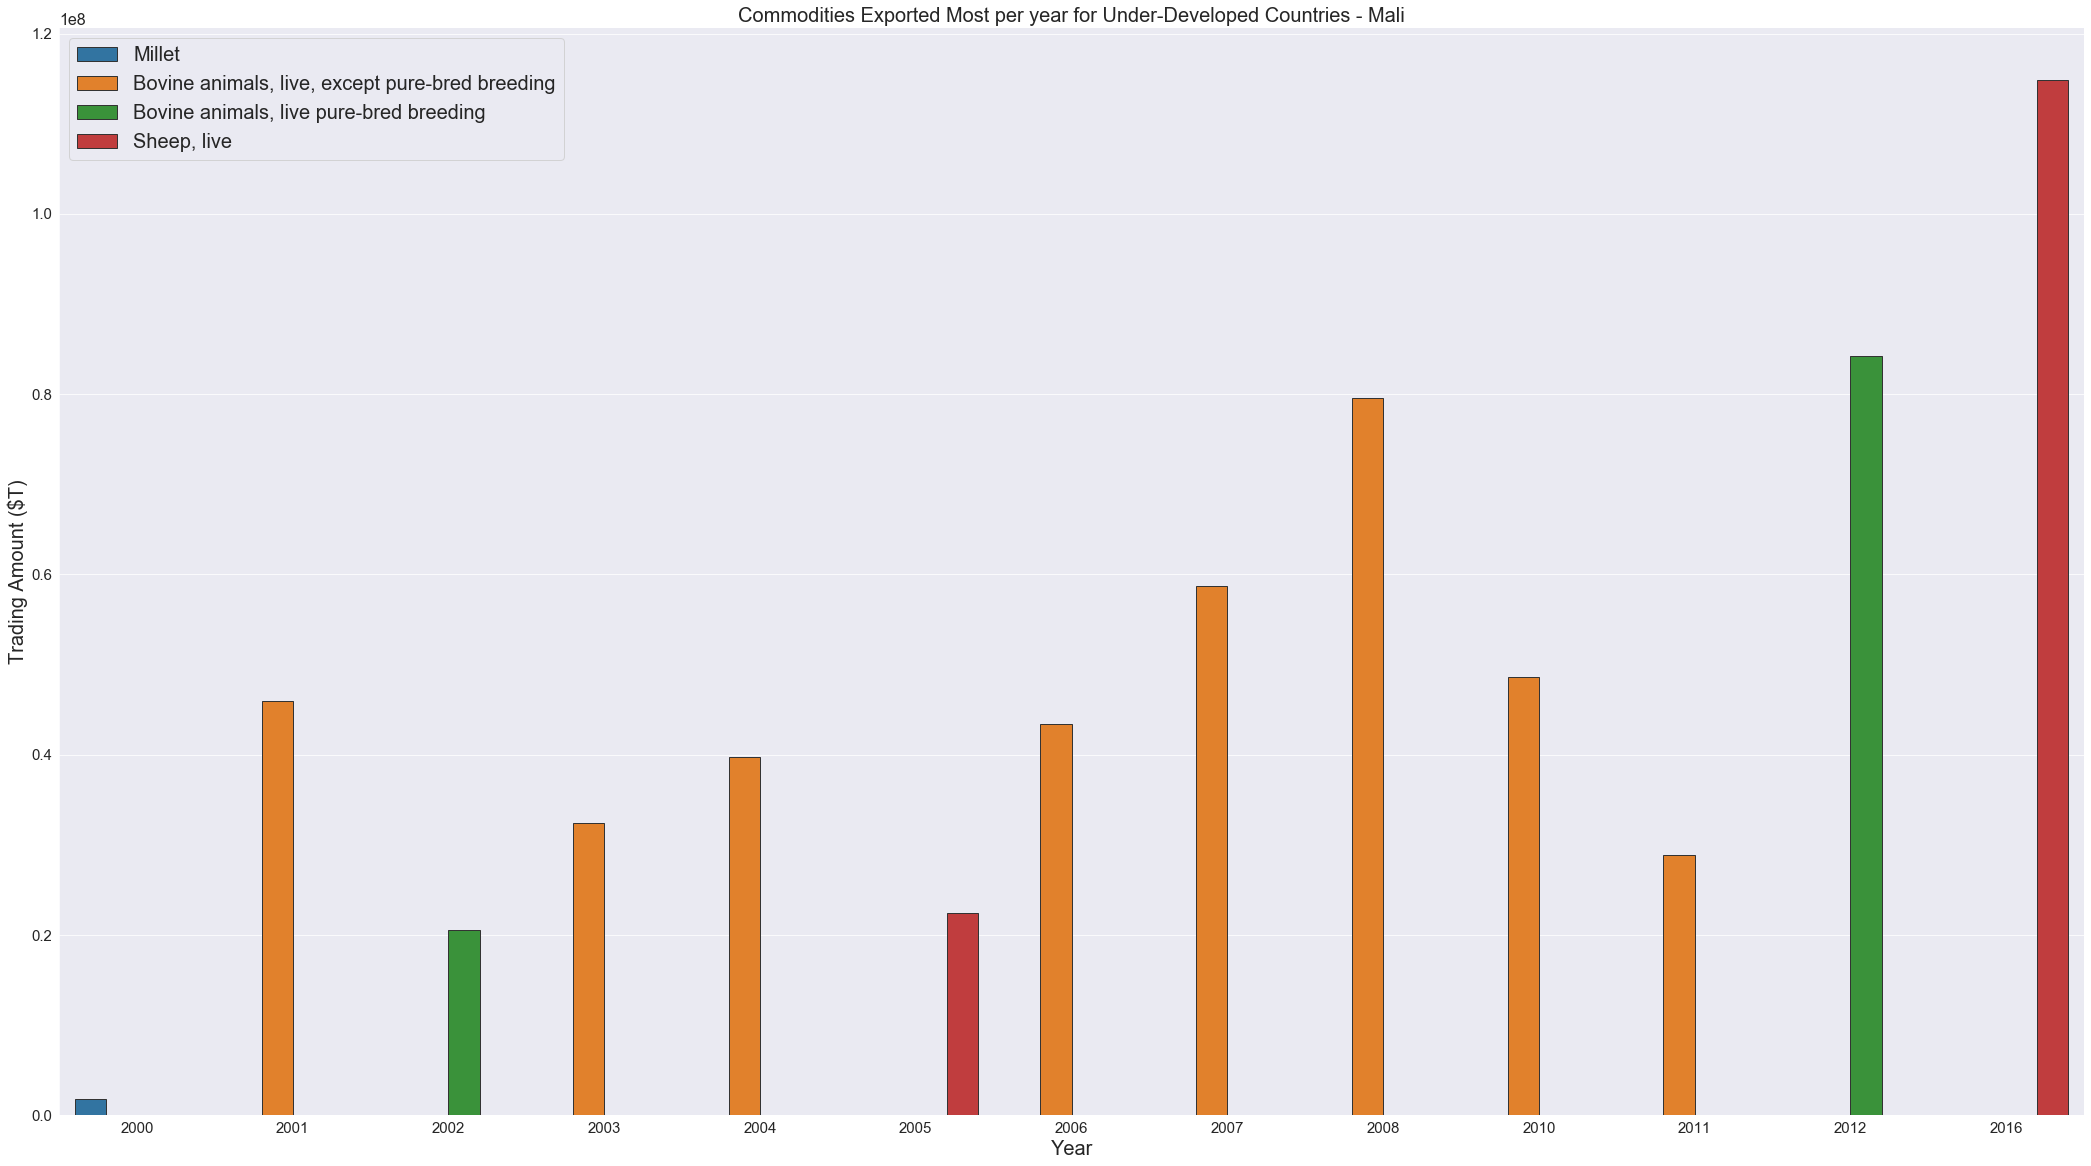

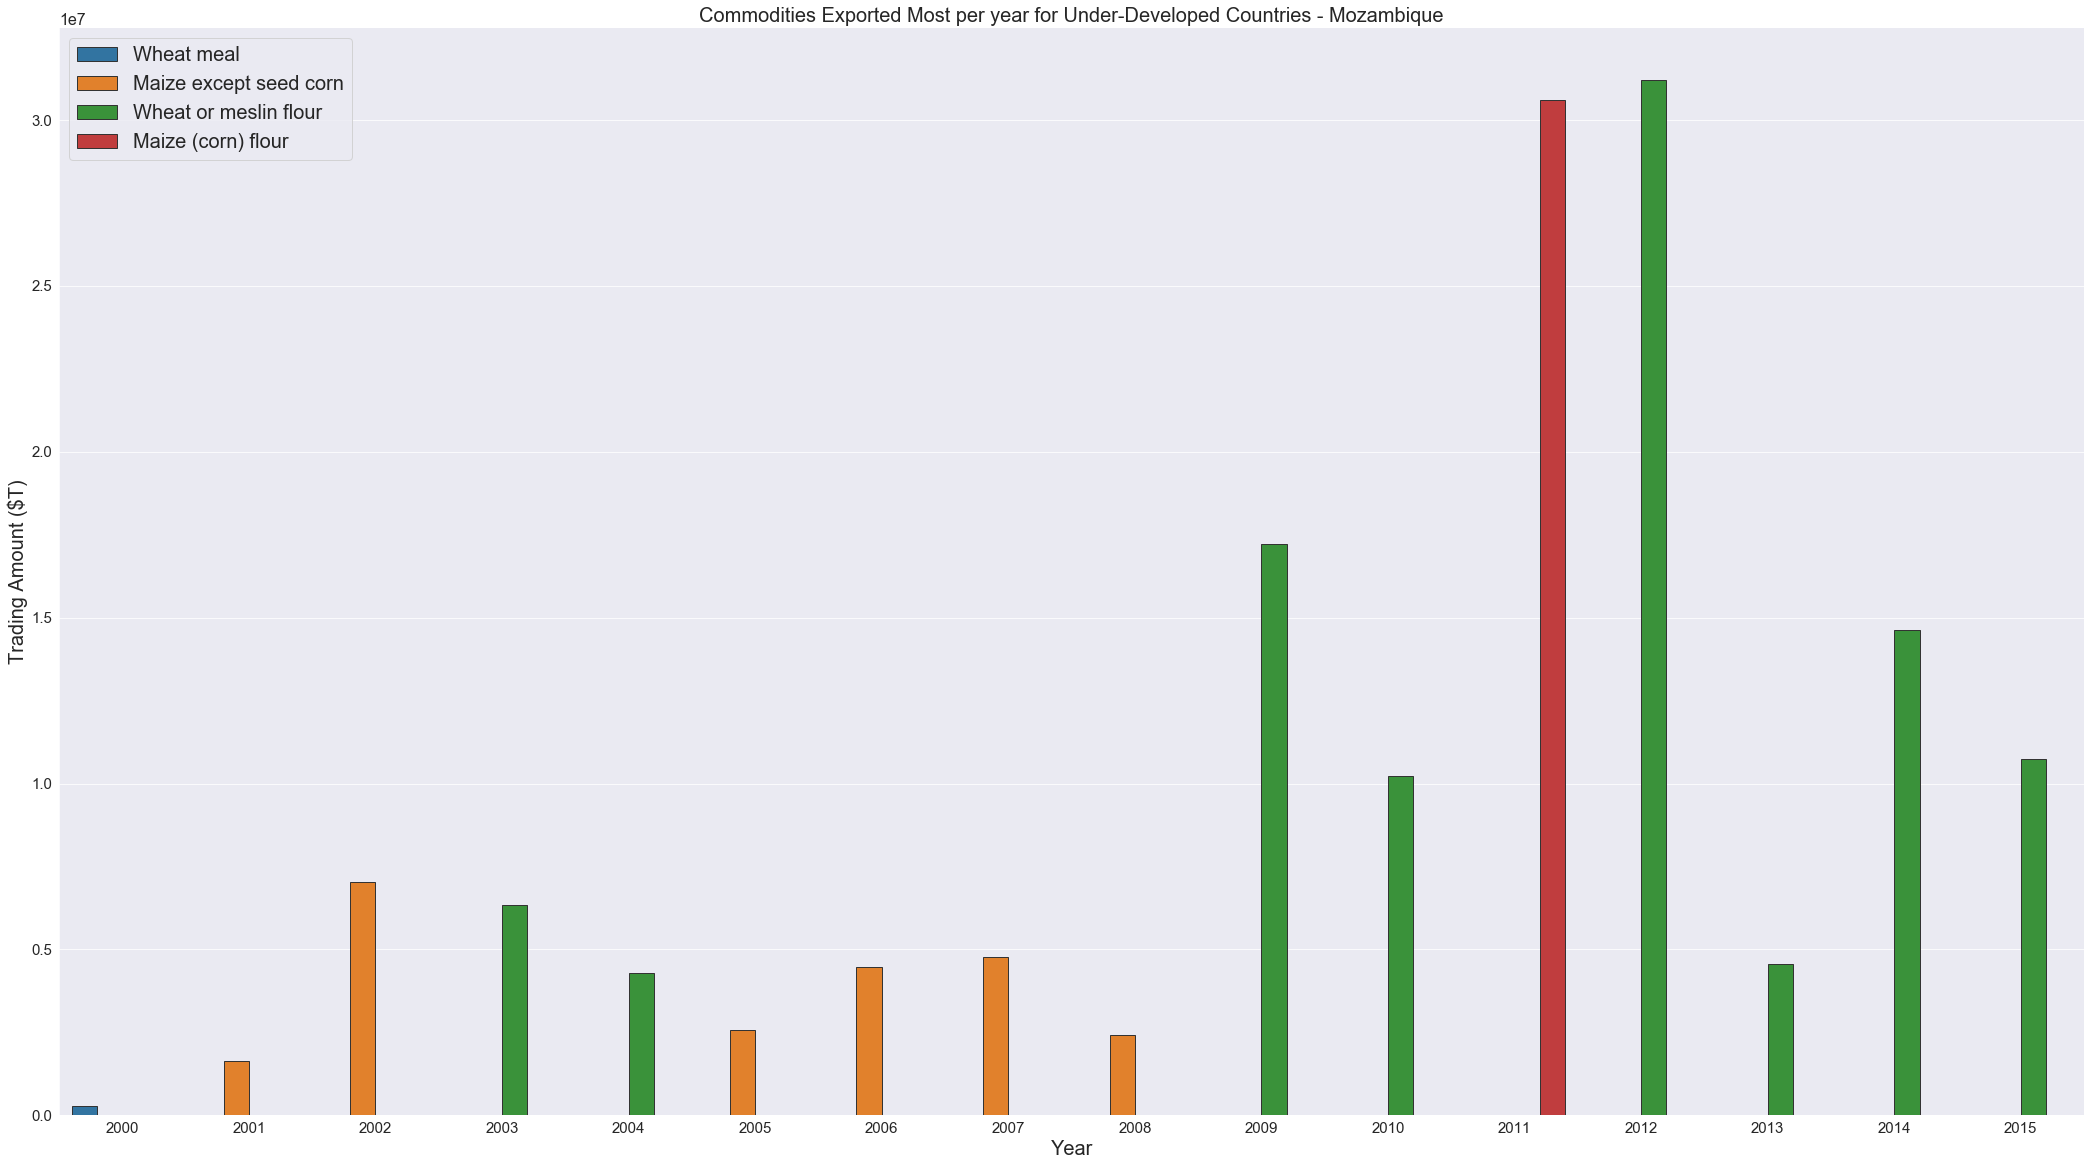

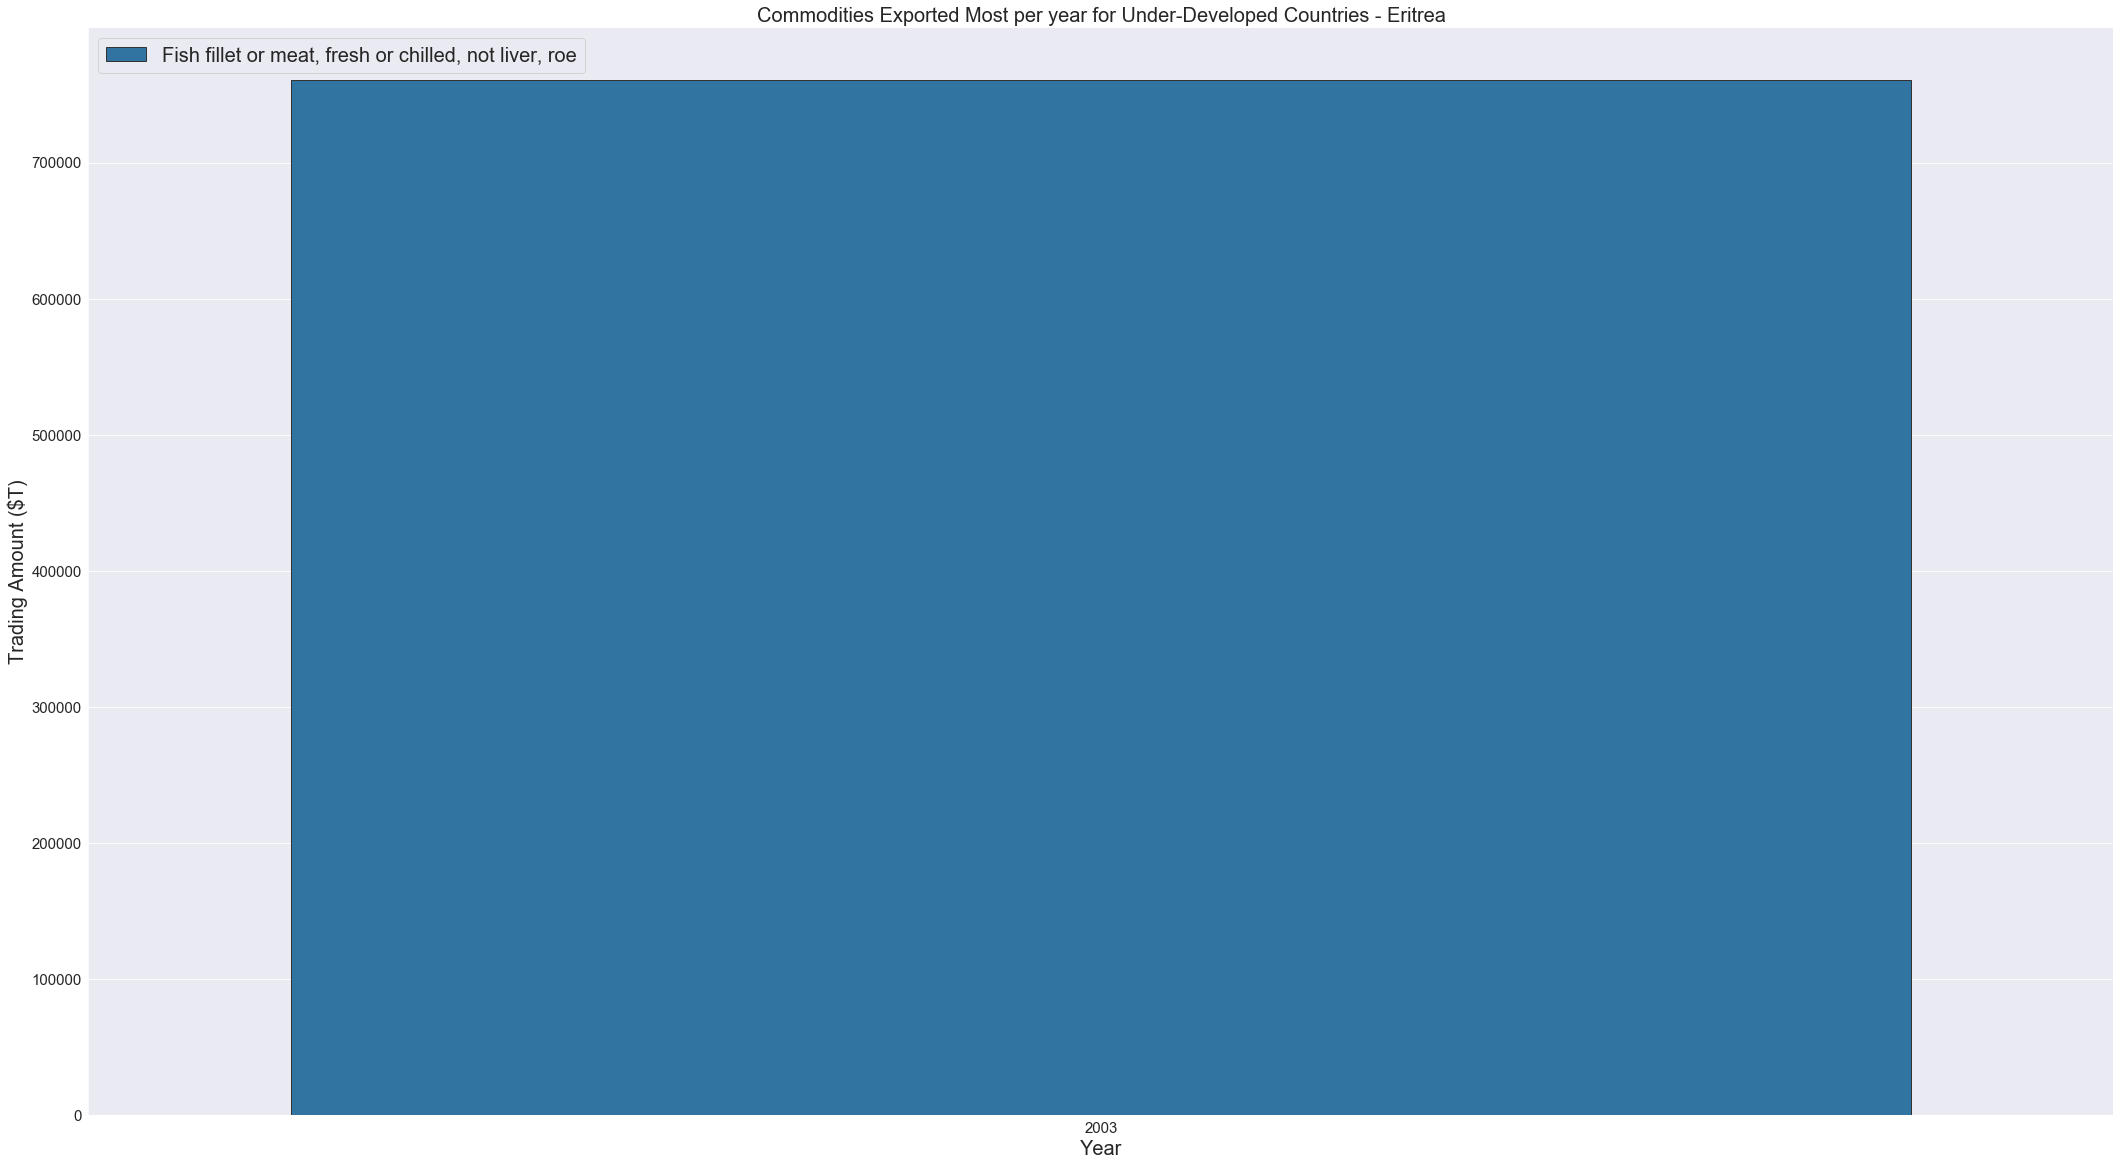

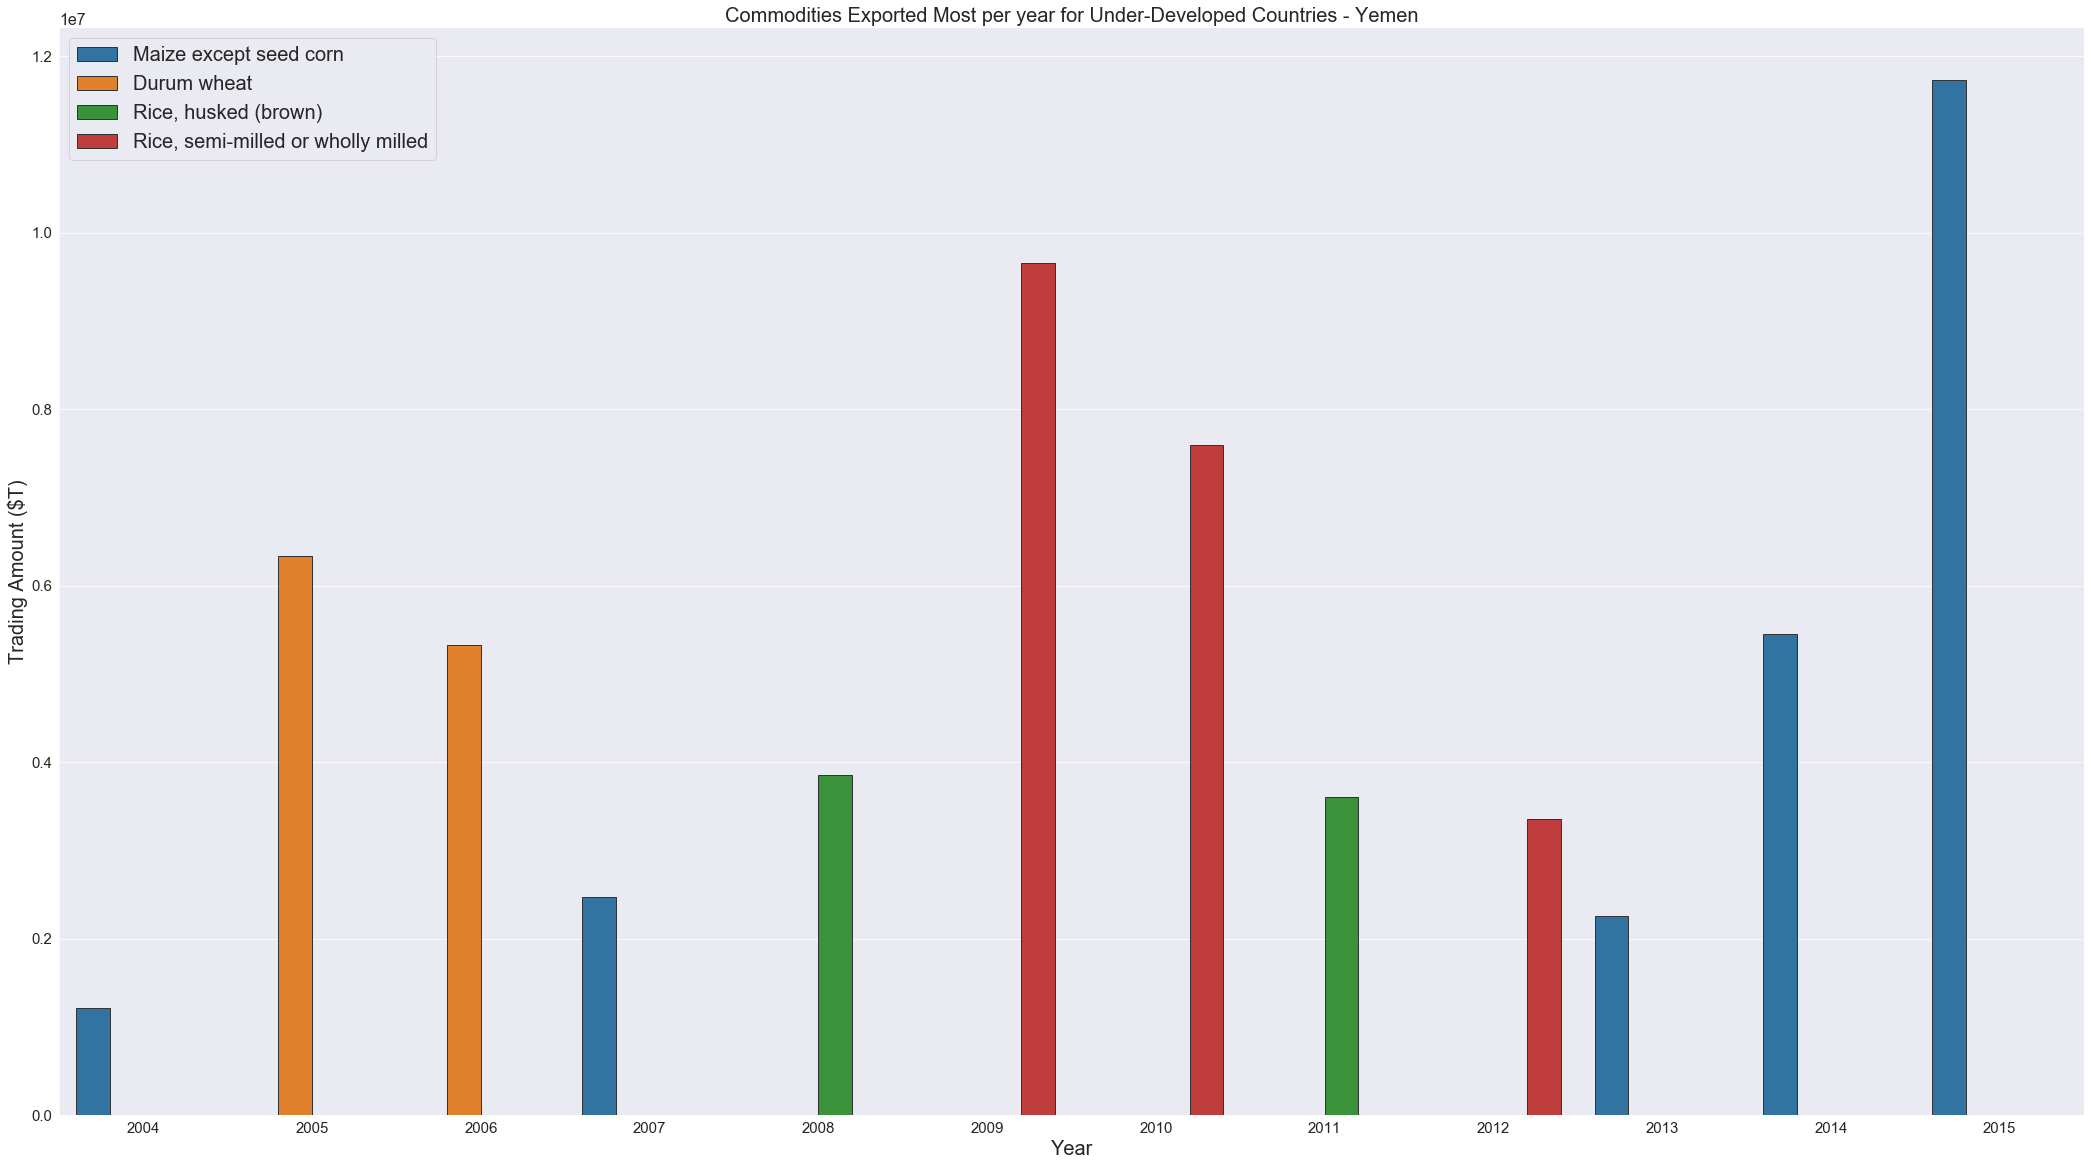

In [103]:
# 31. Commodities Exported Most per year for Least Developed Countries

df_dataundeveloped=df_underdeveloped_countries_exports.groupby(['country_or_area','year','commodity'])['trade_usd'].sum().reset_index().sort_values(by='trade_usd',ascending=False)
#print(underdeveloped_countries)
#print(df_dataundeveloped) 
df_underdevelopedexp_countries_idxmax=df_dataundeveloped.loc[df_dataundeveloped.groupby(['country_or_area','year'])['trade_usd'].idxmax()]


for l in underdeveloped_countries:
    df_underdevelopedctry=df_underdevelopedexp_countries_idxmax[df_underdevelopedexp_countries_idxmax['country_or_area']==l]
    
    f,ax=plt.subplots(figsize=(15,20))
    #print(df_underdevelopedctry)
    sns.barplot(x='year', y='trade_usd',hue='commodity',data=df_underdevelopedctry, ax=ax, edgecolor=".2")
    ax.set_title('Commodities Exported Most per year for Under-Developed Countries' + " - " + l ,fontsize=20)
    
    kwargs = {'length' :3, 'width':1, 'color': 'black', 'labelsize': 15}
    ax.tick_params(**kwargs)
    x_axis=ax.axes.get_xaxis().set_visible(True)
    plt.xlabel('Year',fontsize=20)
    plt.ylabel('Trading Amount ($T)',fontsize=20)
    kg={'length':3, 'width':100, 'color':'black','labelsize':20}
    sns.despine(bottom=True)
    f.subplots_adjust(wspace=0.22,right=2,hspace=0.4)
    plt.legend(loc='upper left',fontsize=20)
    

Analysis:
The analysis shows the commodity highly exported each year for each of the top 10 under-developed countries in the world. The commodities in high trading demand for under-developed countries are:

Rice
Bovine animals
Maize
Coffee

In [ ]:
# 32. Commodity Category Increasing/Decreasing Year to Year for Export Trading

df_exptrading = df_exportsnew.groupby(['year','category']).sum().reset_index()
category_list=['01_live_animals','02_meat_and_edible_meat_offal','03_fish_crustaceans_molluscs_aquatic_invertebrates_ne','04_dairy_products_eggs_honey_edible_animal_product_nes','05_products_of_animal_origin_nes','06_live_trees_plants_bulbs_roots_cut_flowers_etc','07_edible_vegetables_and_certain_roots_and_tubers','08_edible_fruit_nuts_peel_of_citrus_fruit_melons','09_coffee_tea_mate_and_spices','10_cereals','11_milling_products_malt_starches_inulin_wheat_glute','12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne']
df_exptrading=df_exptrading[df_exptrading['category'].isin(category_list)]
f,ax=plt.subplots(figsize=(20,10))
for i in range(len(category_list)):
    df_exptrading[df_exptrading.category==category_list[i]].plot(kind='line',x='year',y='trade_usd',marker='o',label=category_list[i],ax=ax)
ax.axvline(x=2009,color='darkred',linestyle='-',linewidth=3)
kwargs={'fontsize':15,'color':'black'}
plt.xlabel('Year',**kwargs)
plt.ylabel('Trading Amount ($T)',**kwargs)
kg={'length':3,'width':1,'color':'black','labelsize':15}
ax.tick_params(**kg)
plt.title("Commodity Category Increasing/Decreasing Year to Year for Export Trading",fontsize=15)
plt.legend(loc='upper left',fontsize=15)
plt.show()

Analysis:
This is a very interesting analysis! The commodity categories that have experienced an increase across the years 2000-2016 in Export Trading USD. 
The commodity category that has reported highest increase in export is "Cereal" which comproses of Wheat, Barley, Rice, Oats, Maize, Millets, Seeds.
The second following commodity category exported is "Dairy Products" which comprises of Milk Powder, Milk and Cream, Buttermilk, Cheese, Honey, Yogurt, Egg, Whey, Edible animal products.
The commodities trade has seen a rapid downfall during the great recession period from 2008 to 2009 and 2016

In [ ]:
# 33. Commodity Category Increasing/Descreasing Year to Year for Import Trading

df_imptrading = df_importsnew.groupby(['year','category']).sum().reset_index()
category_list=['01_live_animals','02_meat_and_edible_meat_offal','03_fish_crustaceans_molluscs_aquatic_invertebrates_ne','04_dairy_products_eggs_honey_edible_animal_product_nes','05_products_of_animal_origin_nes','06_live_trees_plants_bulbs_roots_cut_flowers_etc','07_edible_vegetables_and_certain_roots_and_tubers','08_edible_fruit_nuts_peel_of_citrus_fruit_melons','09_coffee_tea_mate_and_spices','10_cereals','11_milling_products_malt_starches_inulin_wheat_glute','12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne']
df_imptrading=df_imptrading[df_imptrading['category'].isin(category_list)]
#print(df_imptrading)
f,ax=plt.subplots(figsize=(20,10))
for i in range(len(category_list)):
    df_imptrading[df_imptrading.category==category_list[i]].plot(kind='line',x='year',y='trade_usd',marker='o',label=category_list[i],ax=ax)
ax.axvline(x=2009,color='darkred',linestyle='-',linewidth=3)
kwargs={'fontsize':15,'color':'black'}
plt.xlabel('Year',**kwargs)
plt.ylabel('Trading Amount ($T)',**kwargs)
kg={'length':3,'width':1,'color':'black','labelsize':15}
ax.tick_params(**kg)
plt.title("Commodity Category Increasing/Decreasing Year to Year for Import Trading",fontsize=15)
plt.legend(loc='upper left',fontsize=15)
plt.show()

Analysis:
The commodity categories that have experienced an increase across the years 2000-2016 in Import Trading USD. 
The commodity category that has reported highest increase in Import is "Cereal" which comproses of Wheat, Barley, Rice, Oats, Maize, Millets, Seeds.
The second following commodity category imported is "Dairy Products" which comprises of Milk Powder, Milk and Cream, Buttermilk, Cheese, Honey, Yogurt, Egg, Whey, Edible animal products.
The commodities trade has seen a rapid downfall during the great recession period from 2008 to 2009 and 2016

In [ ]:
# 34. Countries that participate in Import trading of top 10 commodities

df_topcomm = df_importsnew.groupby(['country_or_area','commodity'])['trade_usd'].sum().sort_values(ascending=False).reset_index()
#print(df_topcomm)
imp_comm_list=["Soya beans","Wheat except durum wheat, and meslin","Maize except seed corn","Coffee, not roasted, not decaffeinated","Bovine cuts boneless, frozen","Swine cuts, frozen nes","Milk and cream powder unsweetened < 1.5% fat","Cut flowers and flower buds for bouquets, etc., fresh","Bovine cuts boneless, fresh or chilled","Plants, live (including their roots),nes"]

for t in imp_comm_list:
    df_topcomm_ctry=df_topcomm[df_topcomm['commodity']==t]
    #print(test5)
    f,ax=plt.subplots(figsize=(70,40))
    sns.barplot(x='country_or_area',y='trade_usd',data=df_topcomm_ctry,label="Trading USD")
    plt.xticks(rotation=90)
    kwargs={'fontsize':20,'color':'black'}
    plt.xlabel('Year',**kwargs)
    plt.ylabel('Trading Amount ($T)',**kwargs)
    kg={'length':3,'width':1,'color':'black','labelsize':20}
    ax.tick_params(**kg)
    plt.title("Countries that Contribute in Import Trading " + "- " + t,fontsize=20)
    plt.legend(loc='upper left',fontsize=15)
    plt.show()


In [ ]:
# 35. Countries that participate in Export trading of top 10 commodities

df_topcommexp = df_exportsnew.groupby(['country_or_area','commodity'])['trade_usd'].sum().sort_values(ascending=False).reset_index()
#print(df_topcommexp)
exp_comm_list=["Wheat except durum wheat, and meslin","Maize except seed corn","Soya beans","Coffee, not roasted, not decaffeinated","Cheese except fresh, grated, processed or blue-veined","Rice, semi-milled or wholly milled","Coffee, not roasted, not decaffeinated","Bovine cuts boneless, frozen","Swine cuts, frozen nes","Milk and cream powder unsweetened < 1.5% fat","Cut flowers and flower buds for bouquets, etc., fresh"]

for t in imp_comm_list:
    df_topcommexp_ctry=df_topcommexp[df_topcommexp['commodity']==t]
    #print(test5)
    f,ax=plt.subplots(figsize=(70,40))
    sns.barplot(x='country_or_area',y='trade_usd',data=df_topcommexp_ctry,label="Trading USD")
    plt.xticks(rotation=90)
    kwargs={'fontsize':20,'color':'black'}
    plt.xlabel('Year',**kwargs)
    plt.ylabel('Trading Amount ($T)',**kwargs)
    kg={'length':3,'width':1,'color':'black','labelsize':20}
    ax.tick_params(**kg)
    plt.title("Countries that Contribute in Import Trading " + "- " + t,fontsize=20)
    plt.legend(loc='upper left',fontsize=15)
    plt.show()


In [ ]:
INFERENTIAL ANALYSIS

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


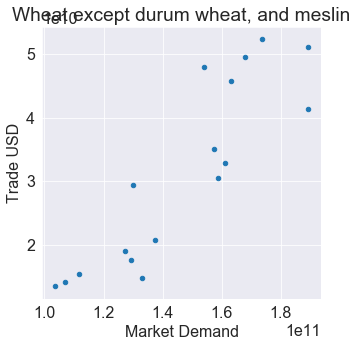

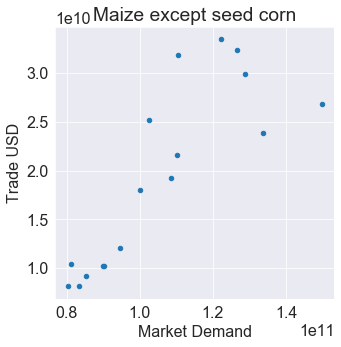

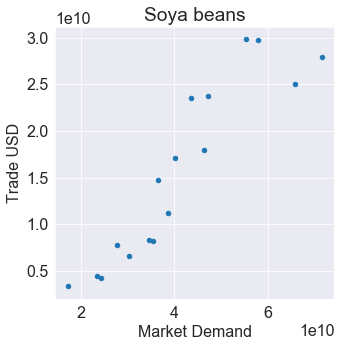

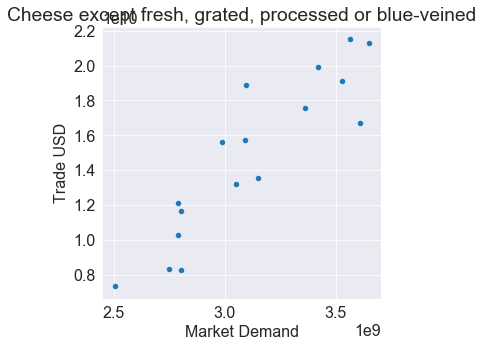

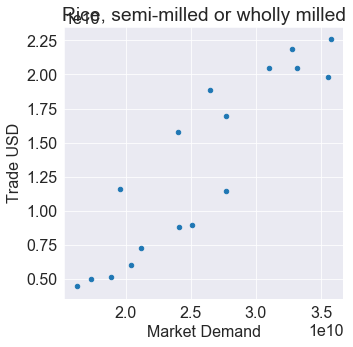

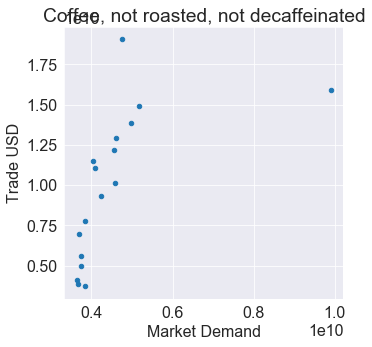

In [110]:
# Elasticity of Trade_usd with Demand of Category of Commodities

from sklearn import linear_model
quant_tradeusd_cat_yr = df_exportsnew.groupby(['category','year'])['quantity','trade_usd'].sum().reset_index()
quant_tradeusd_cat_yr

category_list=['01_live_animals','02_meat_and_edible_meat_offal','03_fish_crustaceans_molluscs_aquatic_invertebrates_ne','04_dairy_products_eggs_honey_edible_animal_product_nes','05_products_of_animal_origin_nes','06_live_trees_plants_bulbs_roots_cut_flowers_etc','07_edible_vegetables_and_certain_roots_and_tubers','08_edible_fruit_nuts_peel_of_citrus_fruit_melons','09_coffee_tea_mate_and_spices','10_cereals','11_milling_products_malt_starches_inulin_wheat_glute','12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne']
commodity_list=["Wheat except durum wheat, and meslin" ,"Maize except seed corn" ,"Soya beans", "Cheese except fresh, grated, processed or blue-veined","Rice, semi-milled or wholly milled","Coffee, not roasted, not decaffeinated"]
#quant_tradeusd_cat = quant_tradeusd_cat_yr = df_exportsnew.groupby(['category','year'])['quantity','trade_usd'].sum().reset_index()
#quant_tradeusd_cat_01 = quant_tradeusd_cat.loc[quant_tradeusd_cat['category']=='01_live_animals']
#quant_tradeusd_cat_01.plot(kind='scatter',x='quantity',y='trade_usd')
quant_tradeusd_comm_yr = df_exportsnew.groupby(['commodity','year'])['quantity','trade_usd'].sum().reset_index()
for i in commodity_list:
    f,ax=plt.subplots(figsize=(5,5))
    quant_tradeusd_comm_yr_i = quant_tradeusd_comm_yr.loc[quant_tradeusd_comm_yr['commodity']==i]
    quant_tradeusd_comm_yr_i.plot(kind='scatter',x='quantity',y='trade_usd', ax=ax)
    plt.xlabel("Market Demand")
    plt.ylabel("Trade USD")
    plt.title(i)
    plt.show()


Analysis:
The plot is between Demand and Trade_USD for the top 5 commodities in order to understand the market elasticity.
Wheat except durum wheat and meslin: Unit Elasticity
Maize except seed corn: Unit Elasticity
Soya beans: Unit Elasticity
Cheese except fresh, grated, processed or blue-veined: Unit Elasticity
Rice, semi-milled or wholly milled: Unit Elasticity
Coffee, not roasted, not decaffeinated: Relatively Elastic

C:\Users\jency\anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\jency\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     52.01
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           3.01e-06
Time:                        11:42:21   Log-Likelihood:                -419.10
No. Observations:                  17   AIC:                             842.2
Df Residuals:                      15   BIC:                             843.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.567e+10   7.76e+09     12.334      0.0

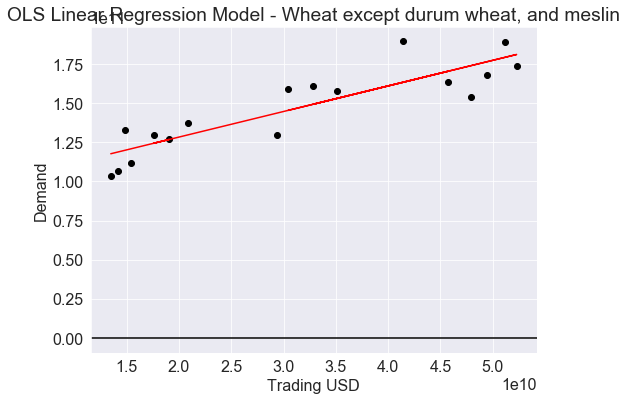

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     34.15
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           3.23e-05
Time:                        11:42:21   Log-Likelihood:                -417.29
No. Observations:                  17   AIC:                             838.6
Df Residuals:                      15   BIC:                             840.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.002e+10   6.75e+09     10.372      0.0

C:\Users\jency\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


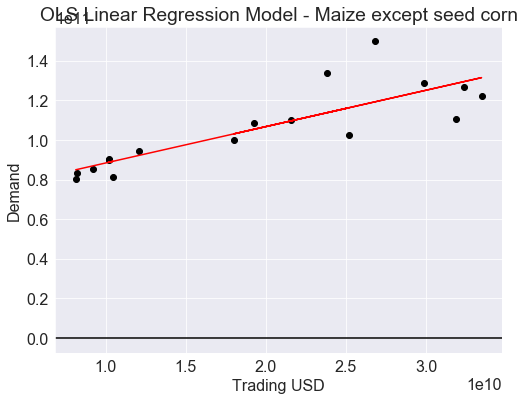

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     79.71
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           2.17e-07
Time:                        11:42:21   Log-Likelihood:                -406.47
No. Observations:                  17   AIC:                             816.9
Df Residuals:                      15   BIC:                             818.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.825e+10   2.96e+09      6.167      0.0

C:\Users\jency\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


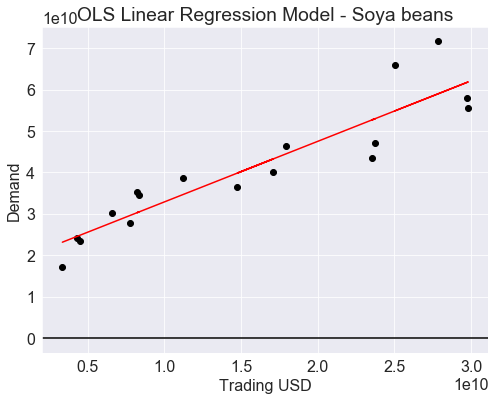

C:\Users\jency\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     65.71
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           7.32e-07
Time:                        11:42:21   Log-Likelihood:                -343.88
No. Observations:                  17   AIC:                             691.8
Df Residuals:                      15   BIC:                             693.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.097e+09   1.31e+08     15.987      0.0

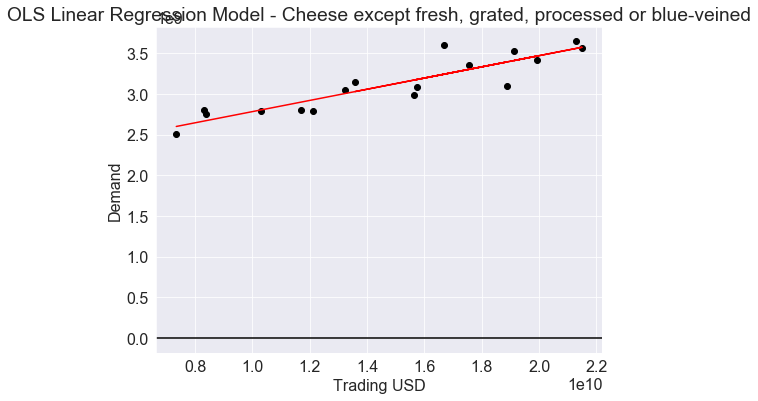

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     70.15
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           4.87e-07
Time:                        11:42:22   Log-Likelihood:                -392.43
No. Observations:                  17   AIC:                             788.9
Df Residuals:                      15   BIC:                             790.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.428e+10   1.52e+09      9.417      0.0

C:\Users\jency\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


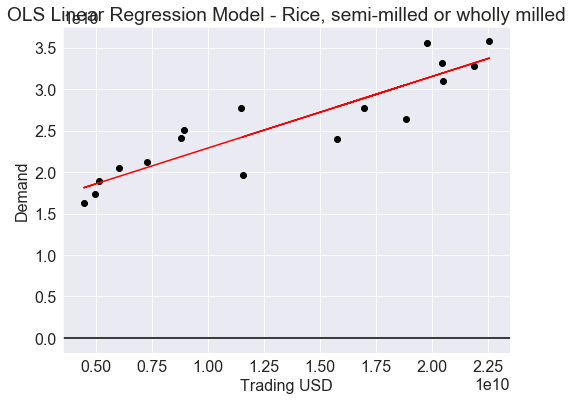

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     8.033
Date:                Thu, 24 Jun 2021   Prob (F-statistic):             0.0126
Time:                        11:42:22   Log-Likelihood:                -378.77
No. Observations:                  17   AIC:                             761.5
Df Residuals:                      15   BIC:                             763.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.686e+09   7.15e+08      3.756      0.0

C:\Users\jency\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\jency\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


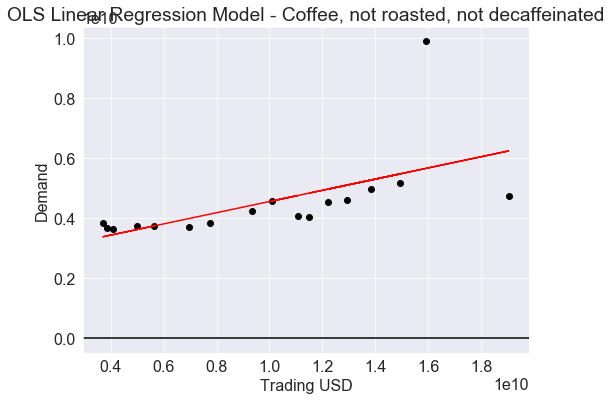

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def model(x, a0,a1):
    ym=a0 + a1*x
    return ym

def plot_data(x,y):
    font_options = {'family':'Arial', 'size':16}
    plt.rc('font', **font_options)
    fig,axis = plt.subplots(figsize=(8,6))
    axis.plot(x,y,color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
   # axis.xaxis.set_major_locator(MultipleLocator(5.0))
   # axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    #axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    #axis.yaxis.set_minor_locator(MultipleLOcator(1.0*50))
    return fig


def compute_rss_and_plot_fit(a0,a1):
    #xd,yd=load_data()
    #ym=model(x,a0,a1)
    residuals=y-ym
    #print(residuals)
    rss=np.sum(np.square(residuals))
    summary=("Parameters a0={}, a1={} yield RSS={}".format(a0, a1, rss))
    fig=plot_data_with_model(x,y,ym)
    plt.show()
    return rss, summary


def plot_data_with_model(x,y,ym):
    #residuals=ym-y
    #rss=np.sum(np.square(residuals))
    #print(rss)
    fig=plot_data(x,y)
    fig.axes[0].plot(x,ym,color='red')
    plt.title("OLS Linear Regression Model - " + j)
    plt.xlabel("Trading USD")
    plt.ylabel("Demand")
    #summary=("OLS Linear Regression Model - a0={},a1={}, RSS={:0.2f}".format(a0,a1,rss))
    #fig.axes[0].set_title(summary)
    plt.show()
    return fig

#Linear Regression

category_list=['01_live_animals','02_meat_and_edible_meat_offal','03_fish_crustaceans_molluscs_aquatic_invertebrates_ne','04_dairy_products_eggs_honey_edible_animal_product_nes','05_products_of_animal_origin_nes','06_live_trees_plants_bulbs_roots_cut_flowers_etc','07_edible_vegetables_and_certain_roots_and_tubers','08_edible_fruit_nuts_peel_of_citrus_fruit_melons','09_coffee_tea_mate_and_spices','10_cereals','11_milling_products_malt_starches_inulin_wheat_glute','12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne']
commodity_list=["Wheat except durum wheat, and meslin" ,"Maize except seed corn" ,"Soya beans", "Cheese except fresh, grated, processed or blue-veined","Rice, semi-milled or wholly milled","Coffee, not roasted, not decaffeinated"]
quant_tradeusd_comm_yr = df_exportsnew.groupby(['commodity','year'])['quantity','trade_usd'].sum().reset_index()
for j in commodity_list:
    quant_tradeusd_comm_yr_j = quant_tradeusd_comm_yr.loc[quant_tradeusd_comm_yr['commodity']==j]
    #print(quant_tradeusd_comm_yr_j)
    model_fit = ols("quantity~trade_usd",data=quant_tradeusd_comm_yr_j).fit()
    print(model_fit.summary())
    ym = model_fit.predict(quant_tradeusd_comm_yr_j)
    #print(ym)
    x = pd.DataFrame(quant_tradeusd_comm_yr_j['trade_usd'])
    #print(x)
    y = pd.DataFrame(quant_tradeusd_comm_yr_j['quantity'])
    #print(y)
    #fig = plot_data_with_model(x,y,ym)
    a0 = model_fit.params['Intercept']
    a1 = model_fit.params['trade_usd']
    fig = compute_rss_and_plot_fit(a0,a1)
    
    #print(a0)
    #print(a1)

Analysis:
The linear regression model is built for the below top 5 commodities preferred for exports. The model for these commodities has a good fit. Hence these commodities can be considered as reliable with a stable market demand and price and can be recommended to Least Developed Countries
1. Wheat except durum wheat and meslin
2. Maize except seed corn: Unit Elasticity
3. Soya beans: Unit Elasticity
4. Cheese except fresh, grated, processed or blue-veined: Unit Elasticity
5. Rice, semi-milled or wholly milled: Unit Elasticity
6. Coffee, not roasted, not decaffeinated: Relatively Elastic

Analysis:
The top countries that export the top 10 commodities are all among the top developed countries in the world.
The under-developed countries might not be producing these commodities

Overall Analysis:
1. Change in imports and exports are close to same since one countries imports are another countries exports
2. Exports for a country are the key factor for the country's economy growth. The top countries that contributes to high exports will be part of the countries that top the list of world's developed list of countries
3. EU-28, Brazil, France are the top exporters on food products and they are part of the chart top in developed list of countries
4. Soya Beans is the highest import trading commodity and "Wheat except durum wheat, and meslin" is the highest export trading commodity
5. Cereals are the highest in import and export trading USD. The second highest that follows is Dairy Products. Hence countries that exports Creals (especially  Soya beans and "Wheat except durum wheat, and meslin") and Dairy Products might improved a countries economy greatly
6. The top 10 commodities that hold the highest trading value are all produced and exported by countries that are in the top list of developed countries in the world. The countries that are identified as under-developed are not producing these commodities.
7. Producing and exporting the commodities that are in top demand would contribute to the economy of the under-developed countries
